To start, we import items then read in the data. 


In [189]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer, MissingIndicator
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, Normalizer, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from scipy.special import boxcox1p
import csv

train_data = pd.read_csv(
    "/Users/thomas/Onedrive-SNHU/25SPDAY/CS411/house-prices-advanced-regression-techniques/train.csv"
)
test_data = pd.read_csv(
    "/Users/thomas/Onedrive-SNHU/25SPDAY/CS411/house-prices-advanced-regression-techniques/test.csv"
)
train_data["BuildAge"] = 2025-train_data["YearBuilt"]
train_data["RemodAge"] = 2025-train_data["YearRemodAdd"]
things_to_drop = ["Id", "Street", "Utilities", "Condition2", "YearBuilt", "EnclosedPorch", "YearRemodAdd", "RoofMatl", "BsmtCond", "BsmtFinSF2", "Heating", "LowQualFinSF", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]
train_data = train_data.drop(things_to_drop, axis=1)

Let's next look closer at the feature we're targeting...

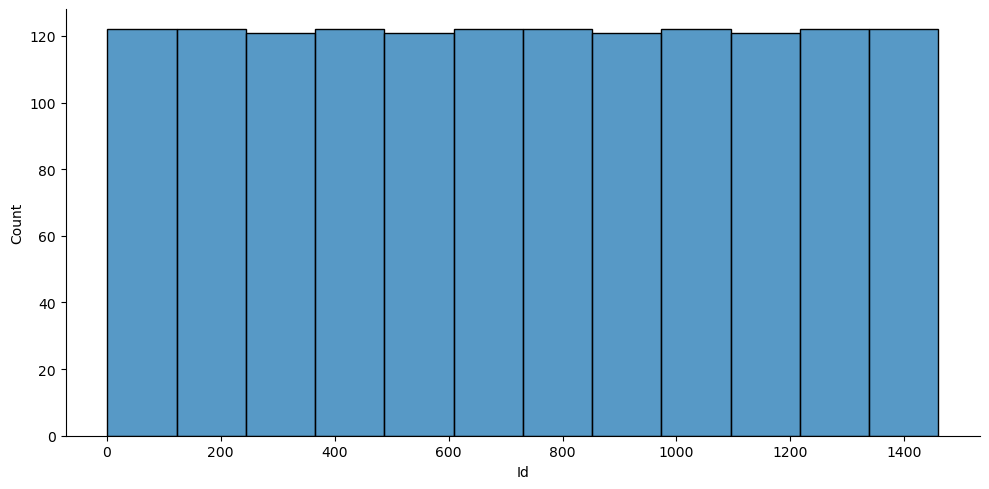

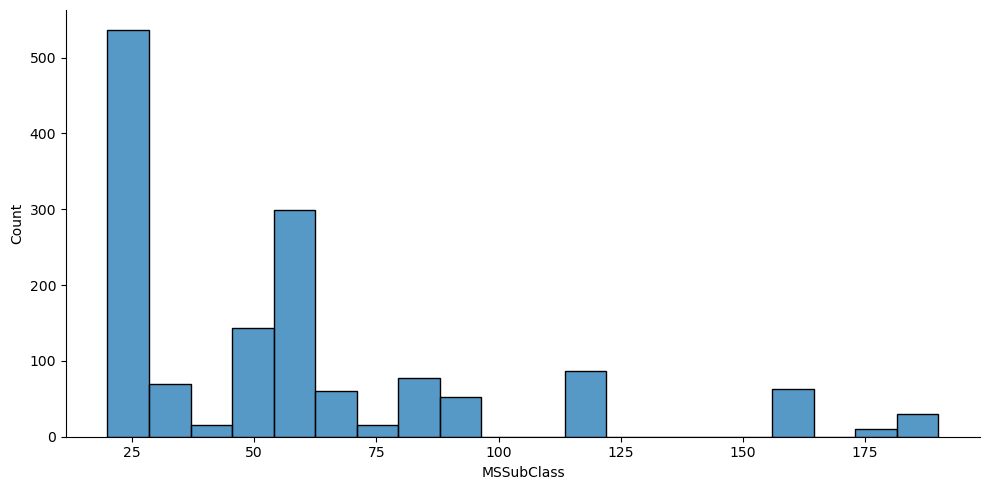

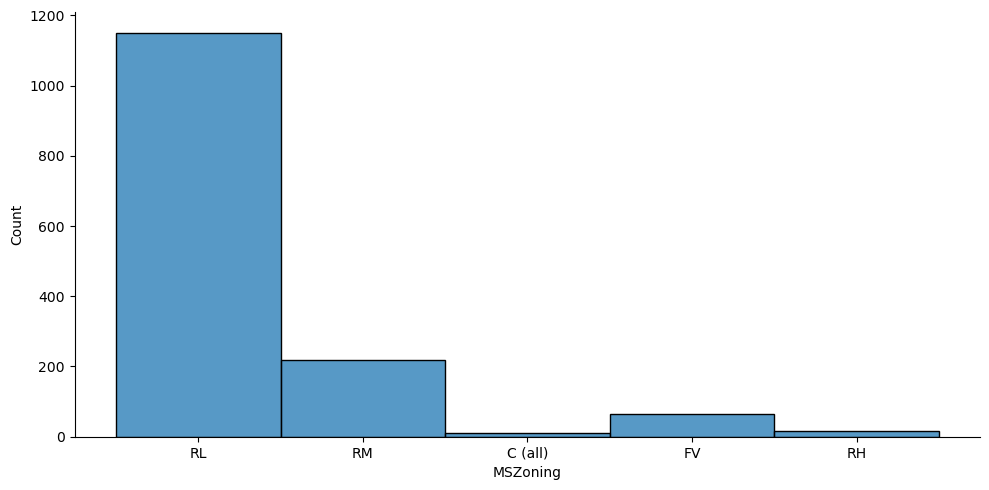

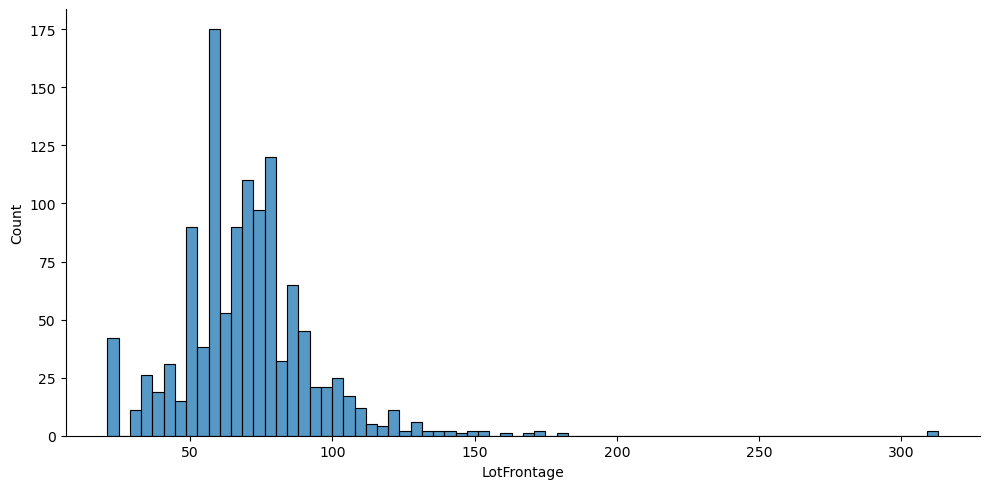

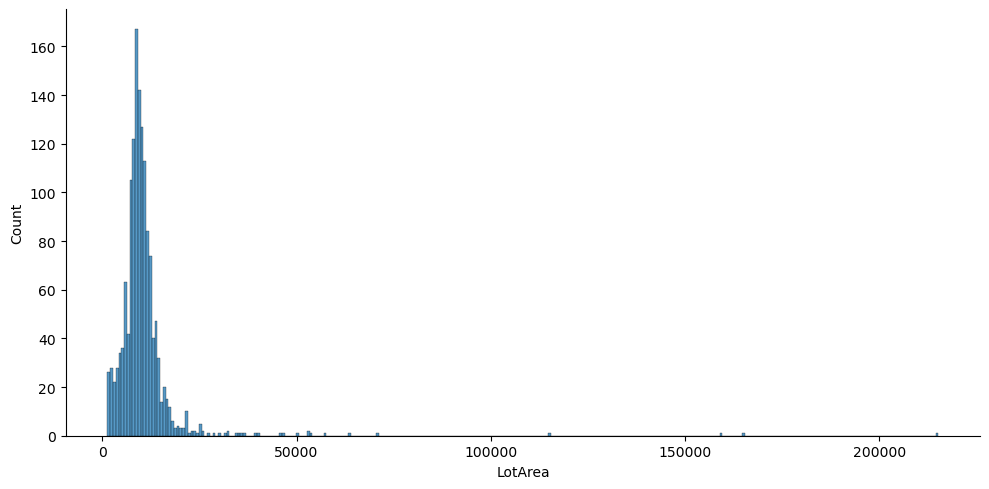

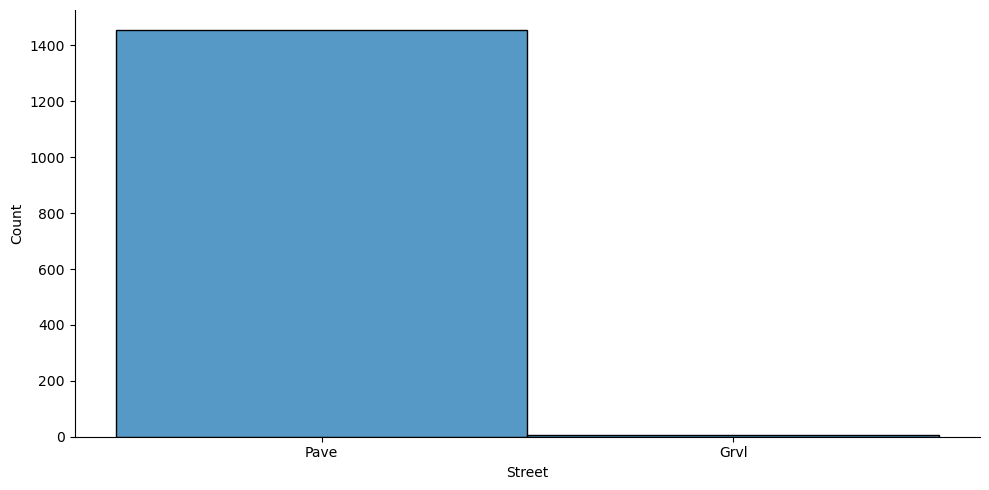

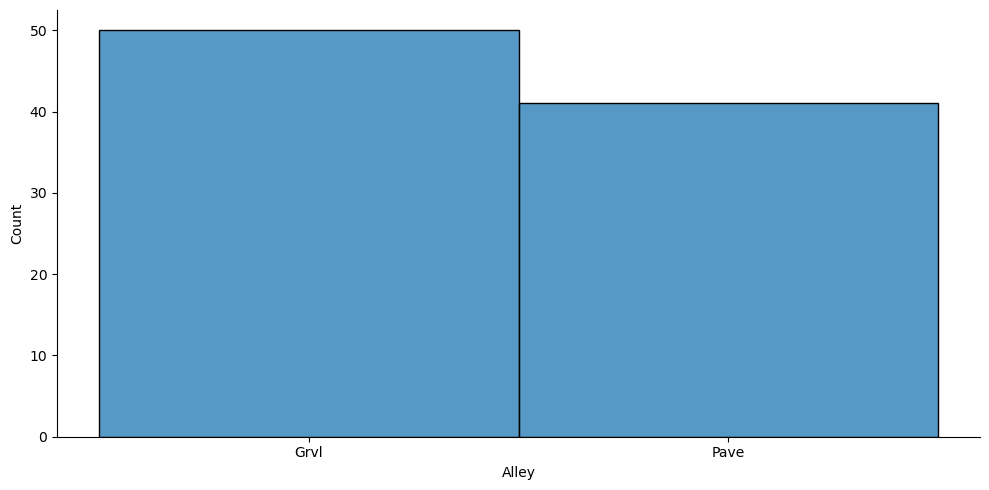

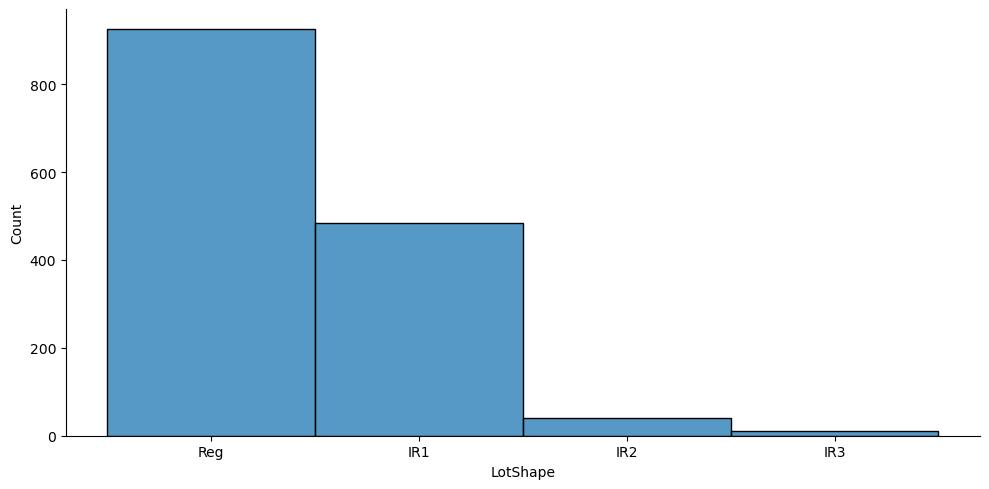

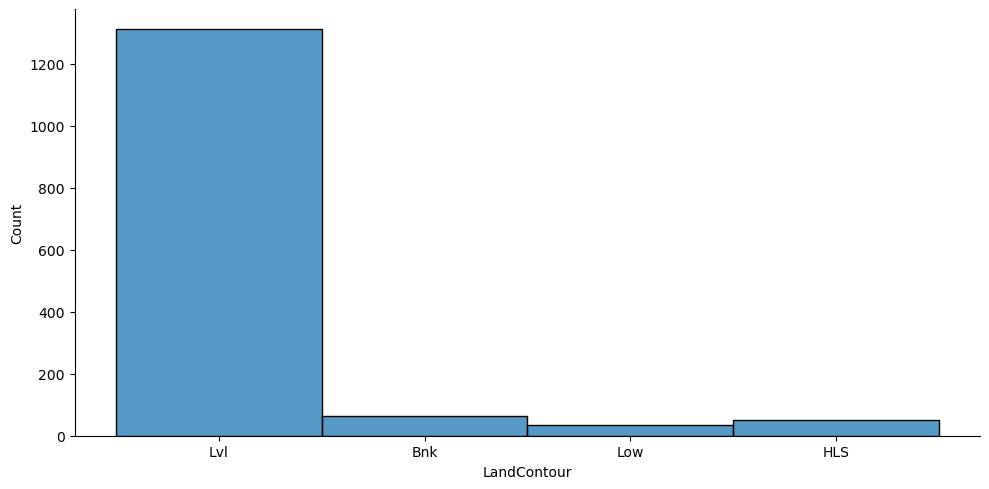

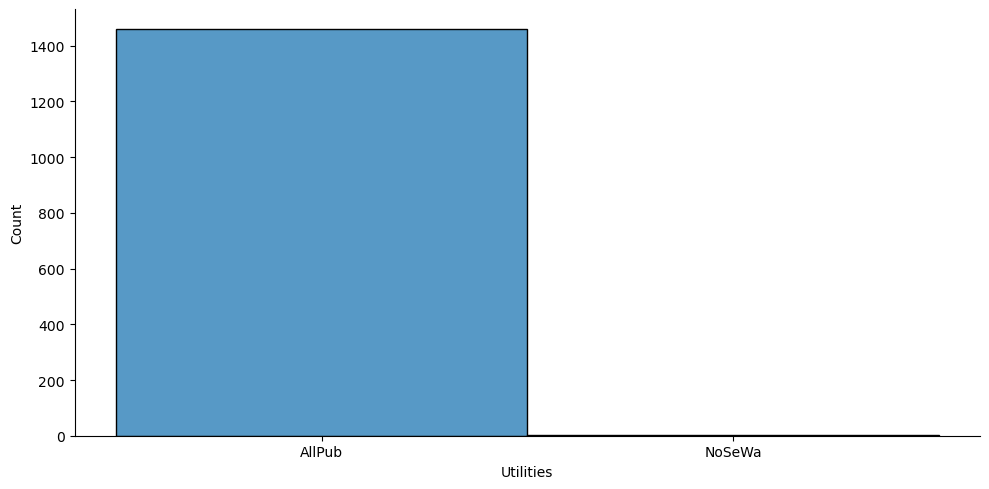

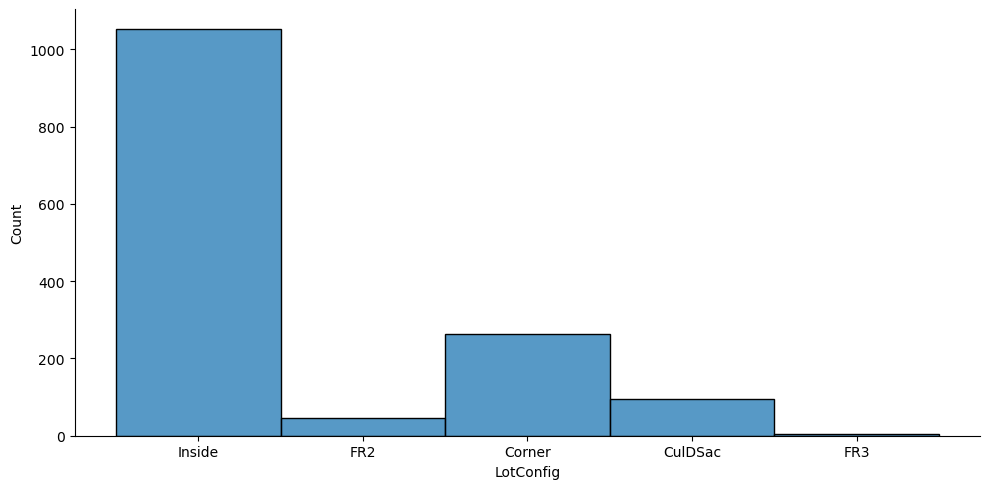

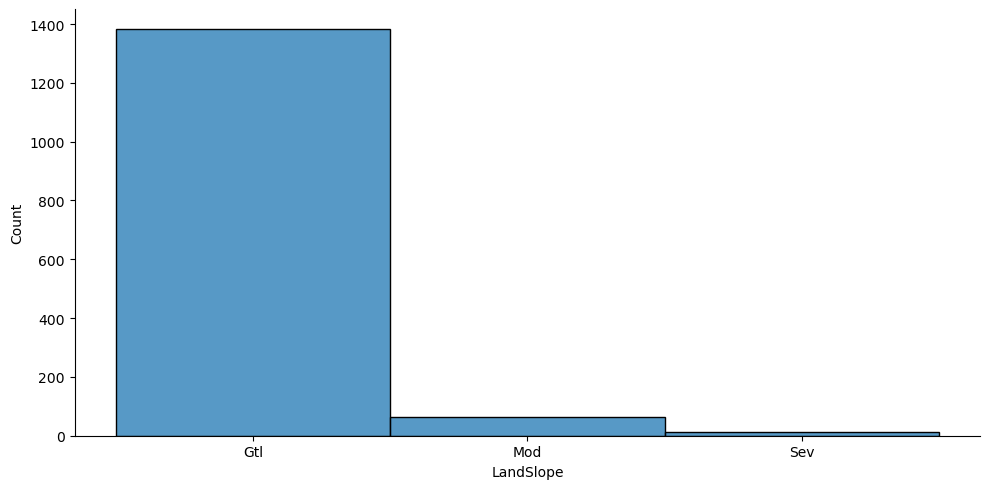

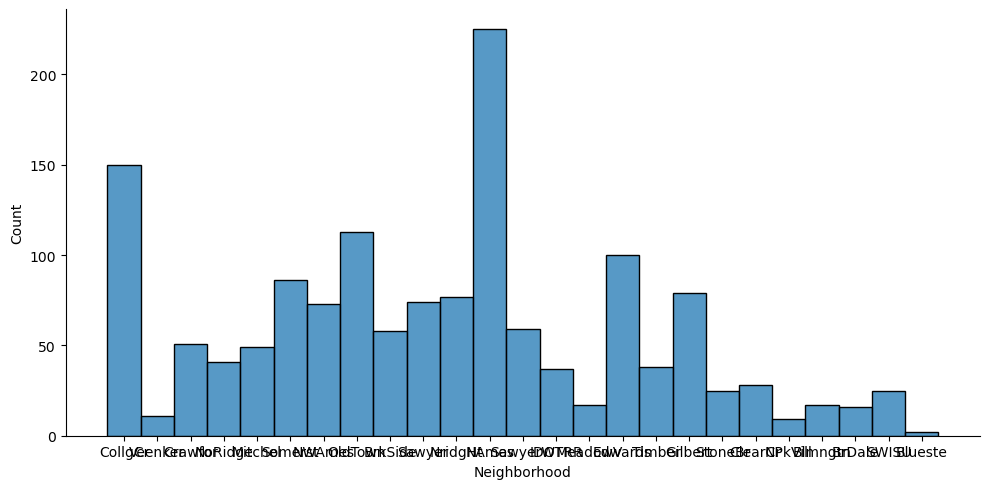

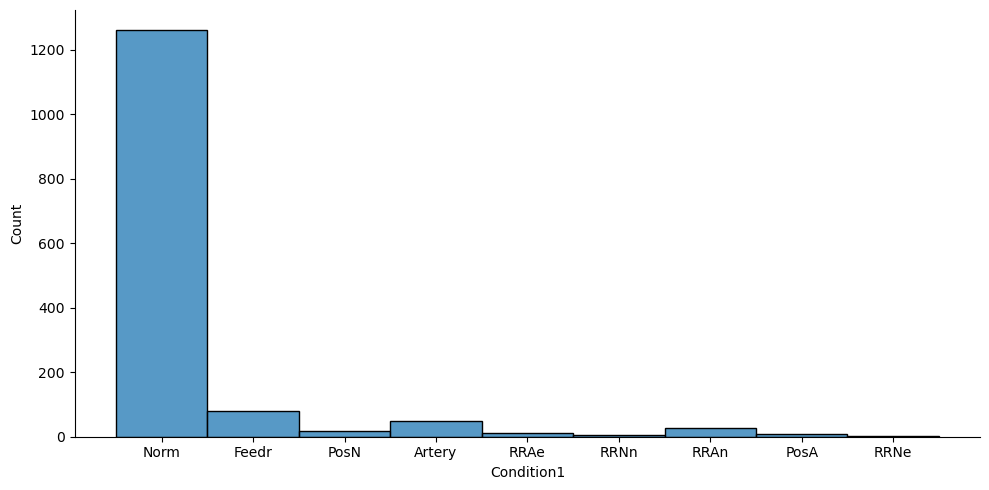

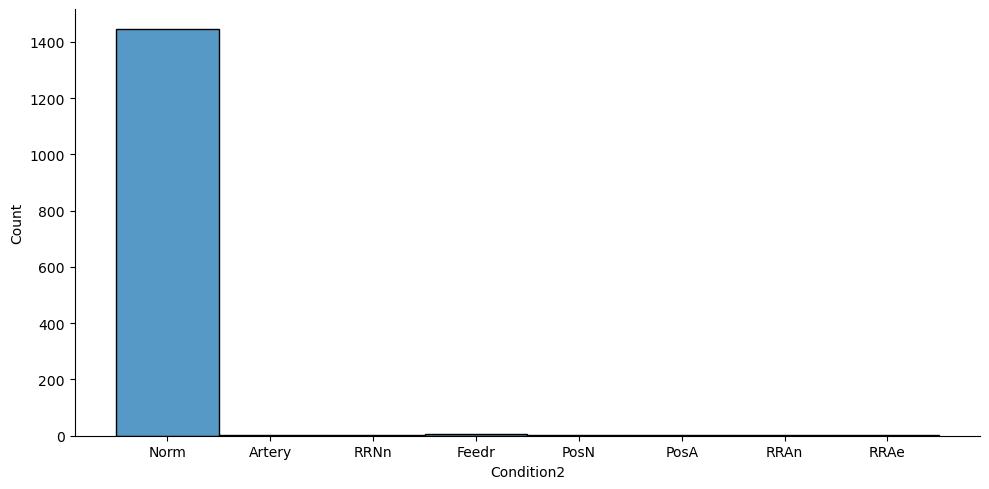

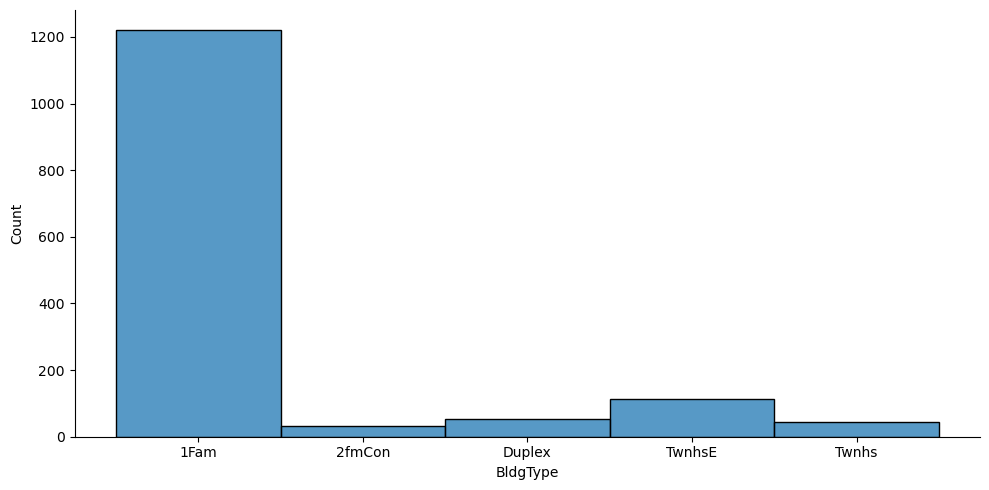

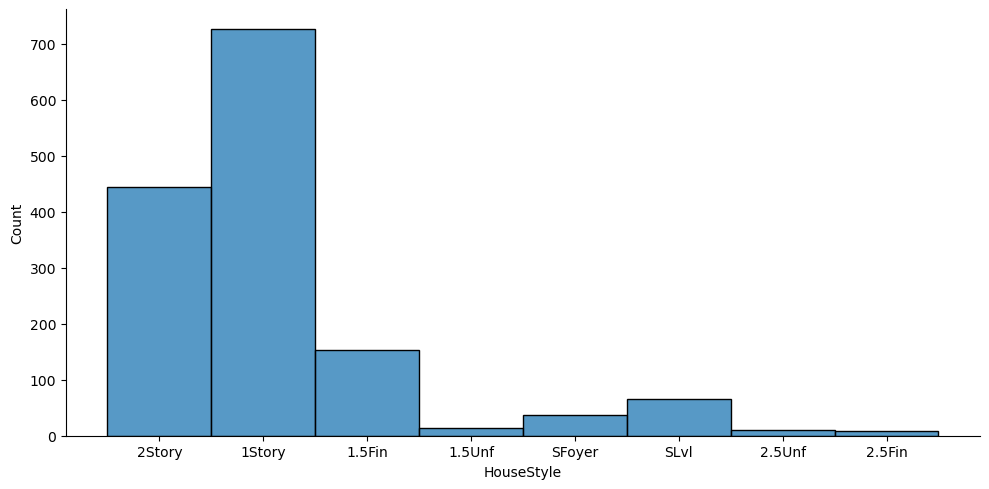

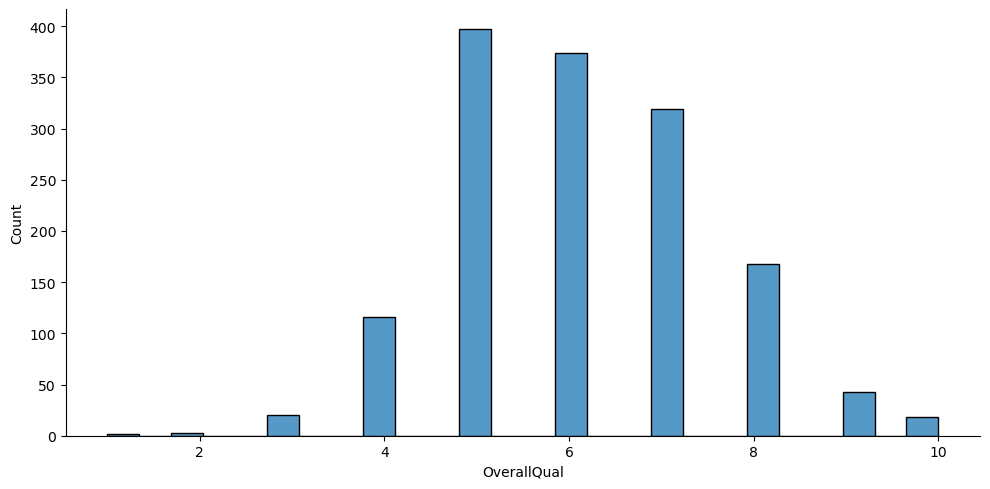

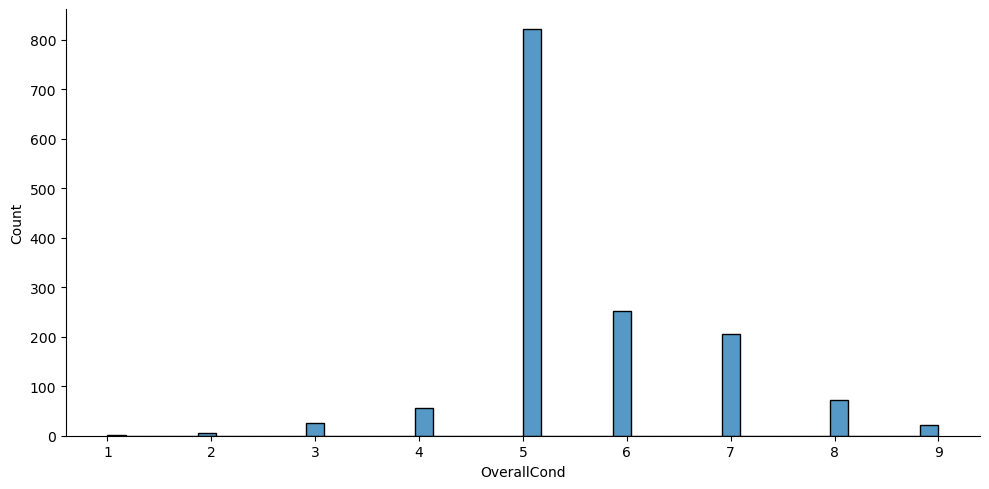

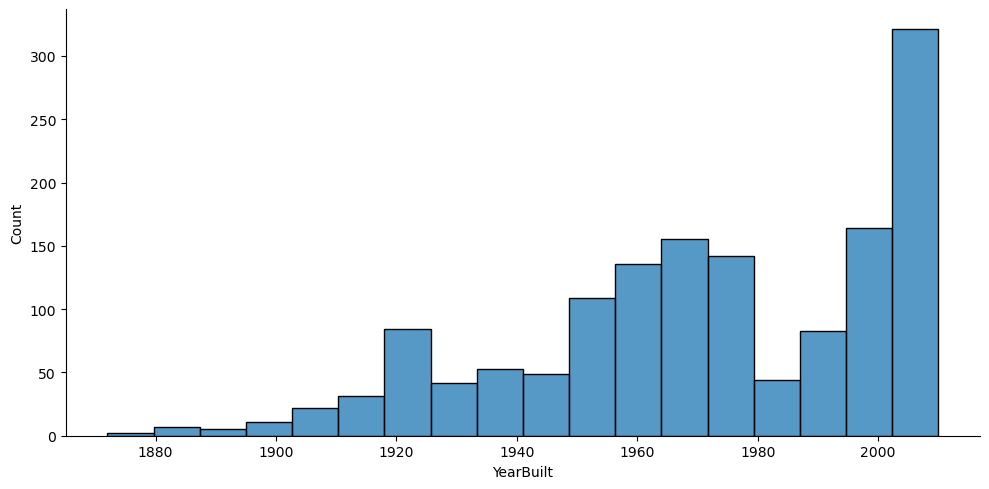

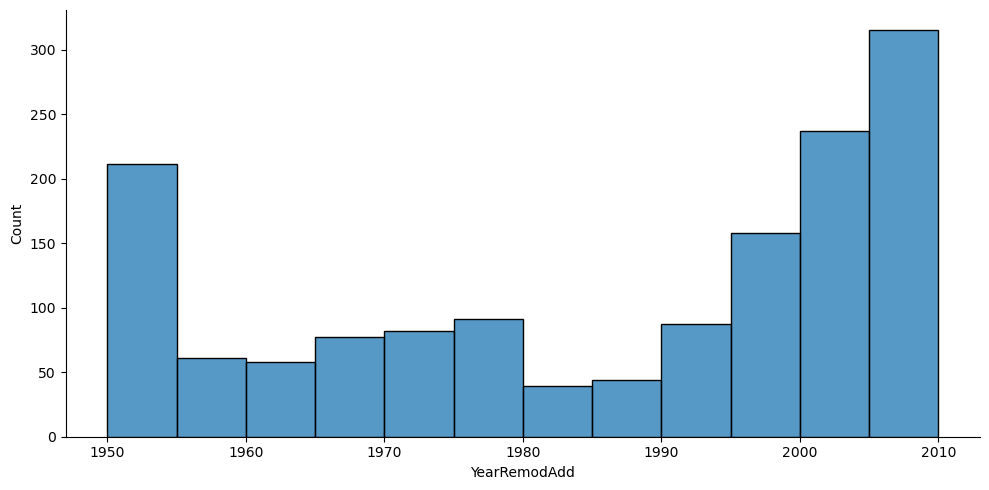

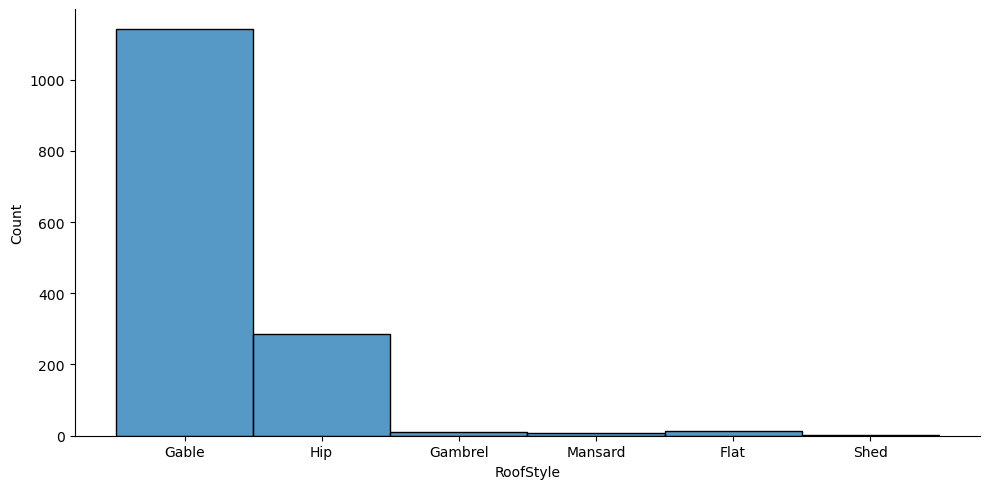

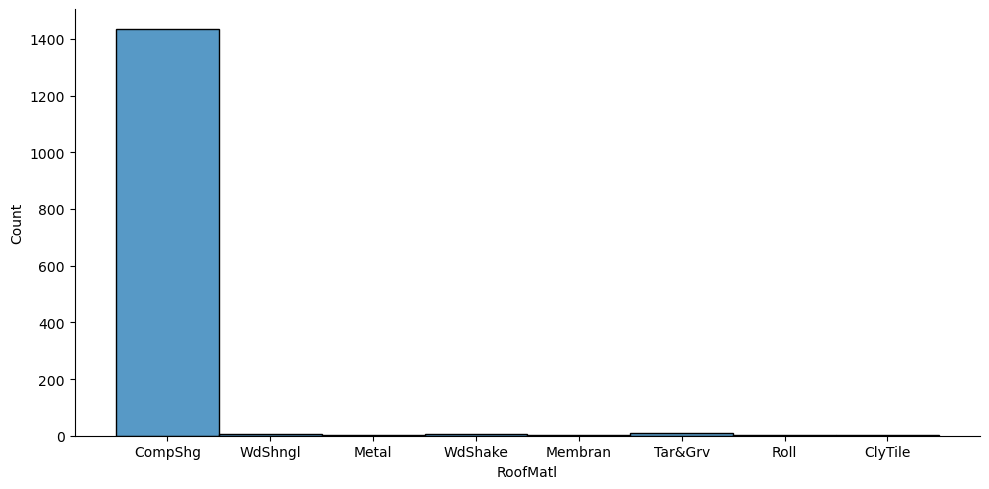

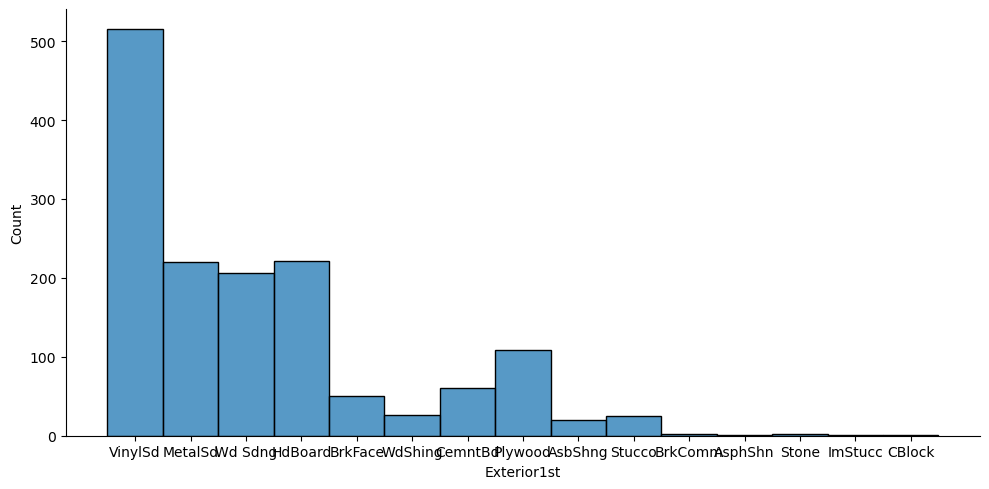

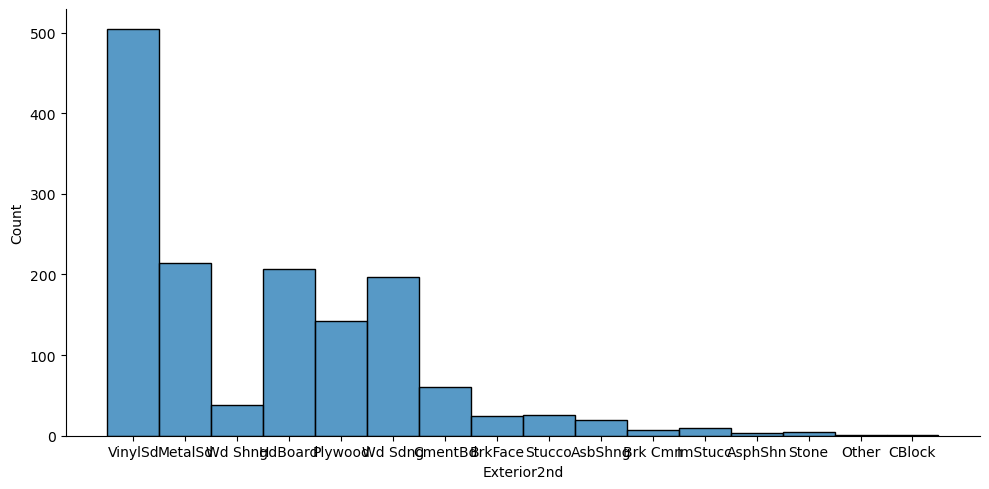

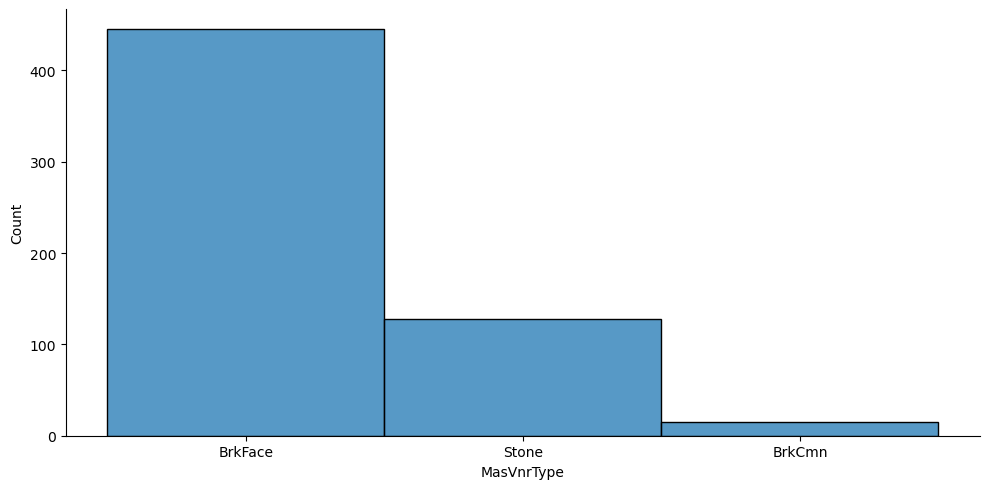

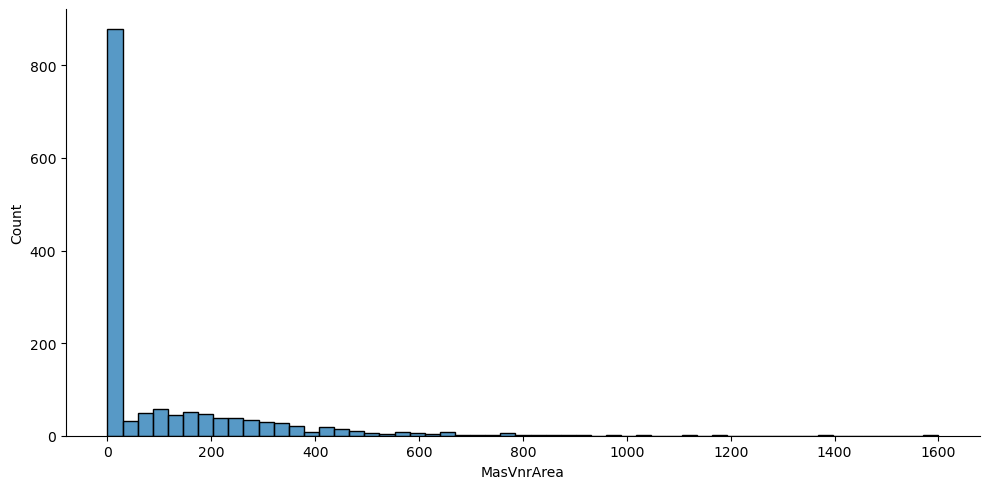

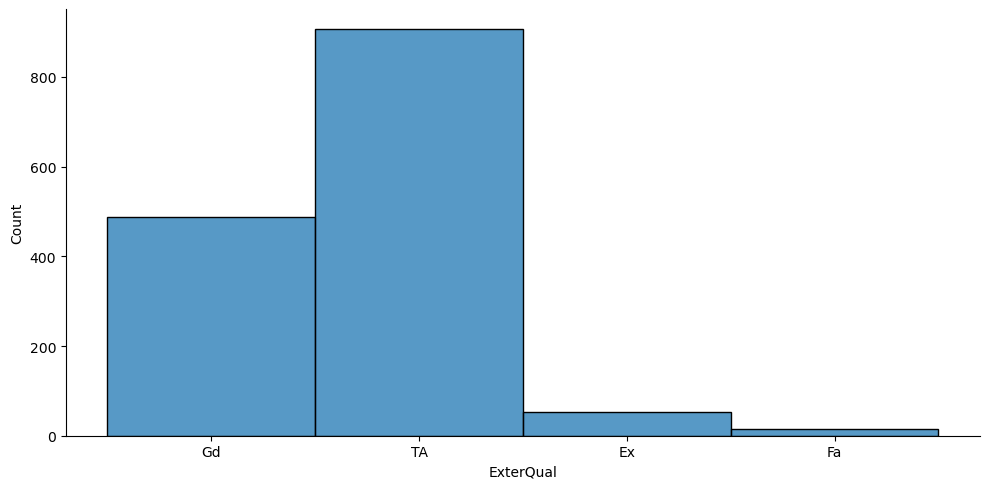

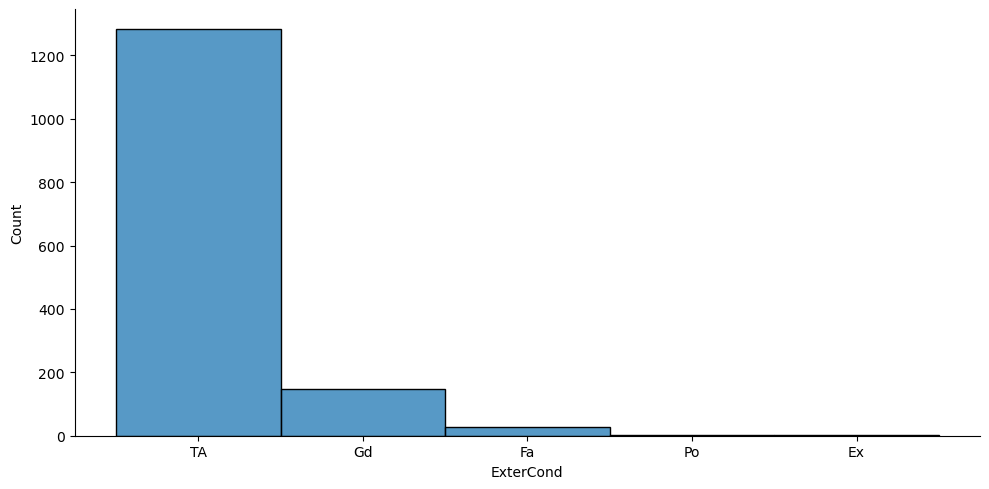

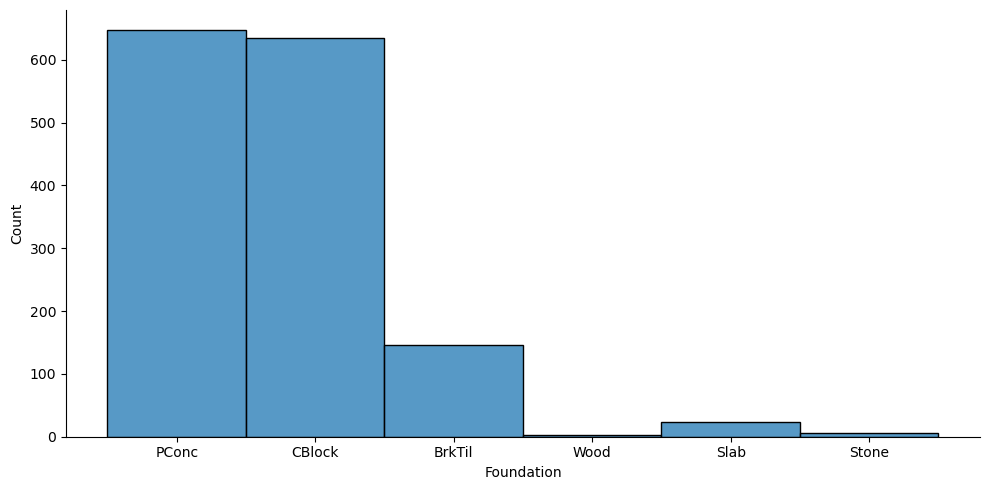

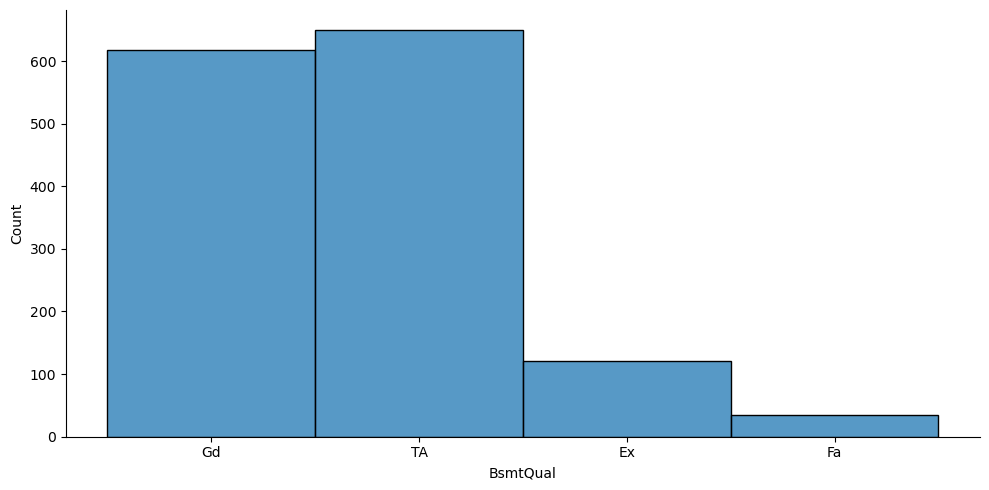

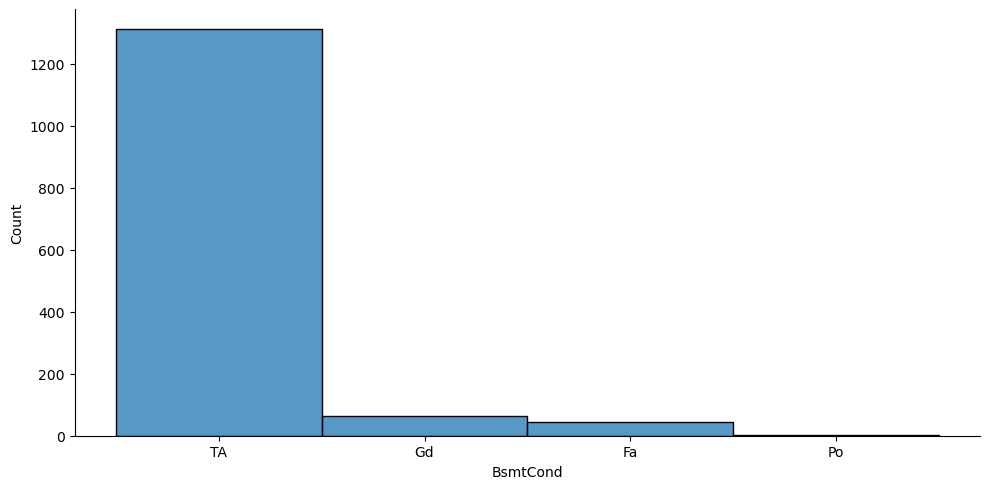

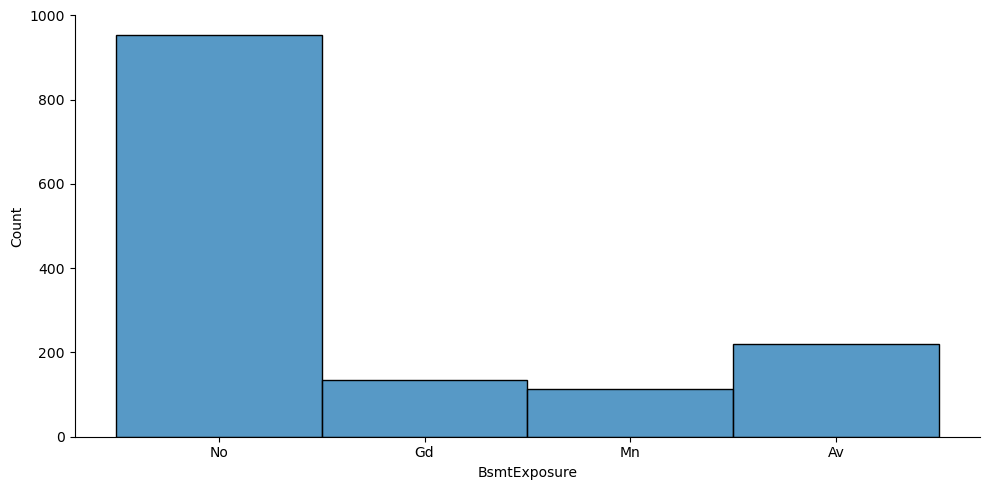

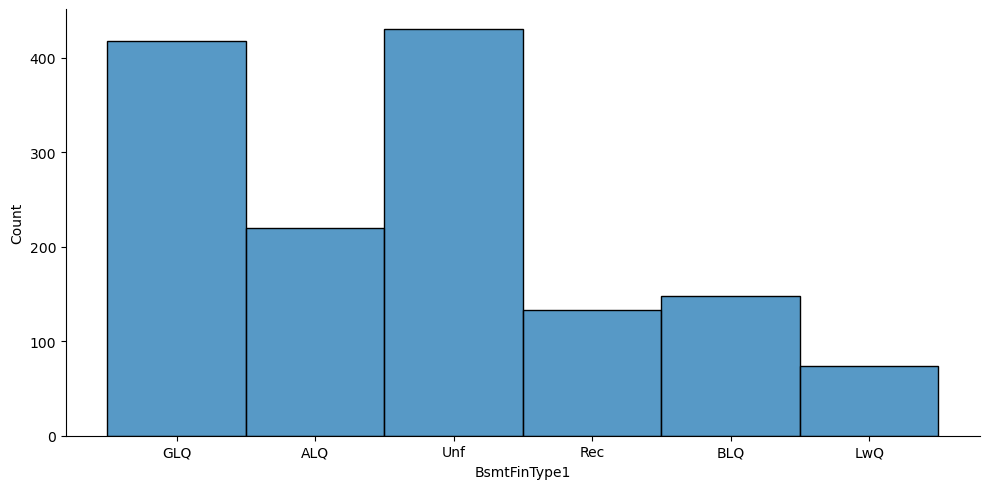

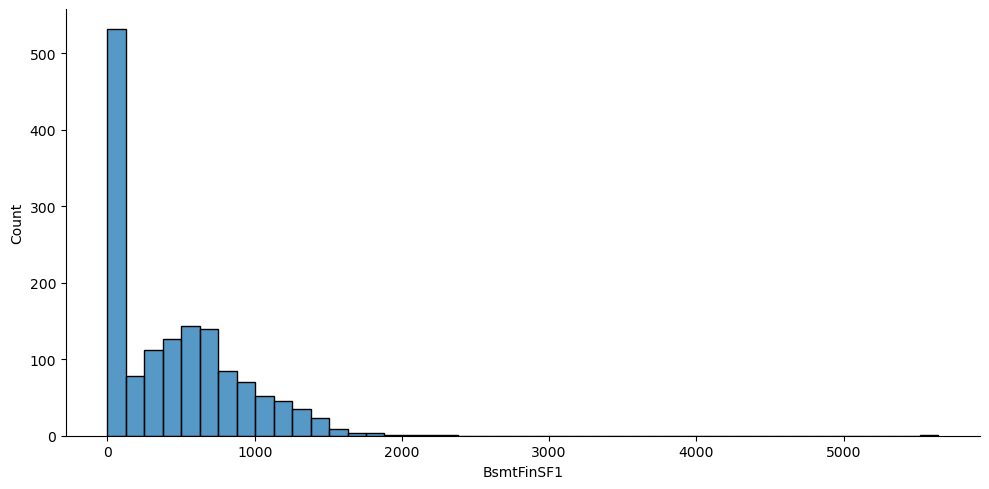

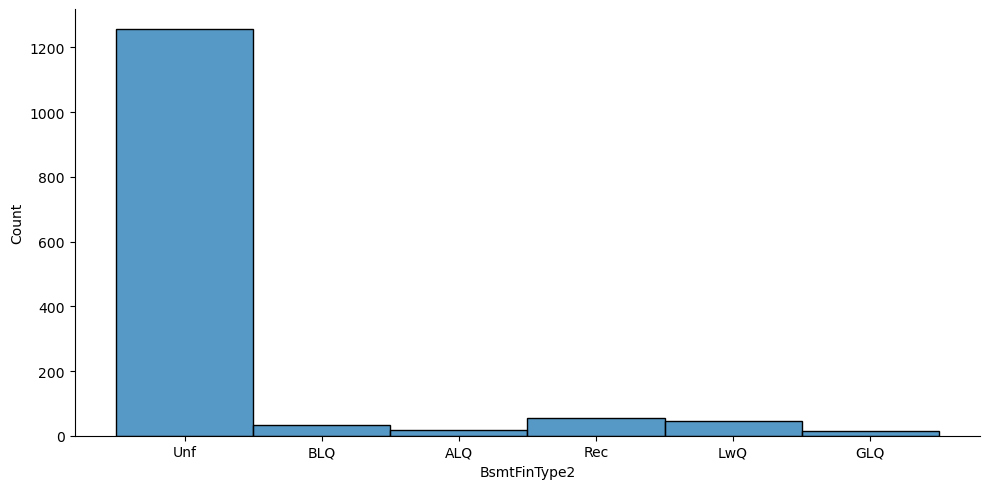

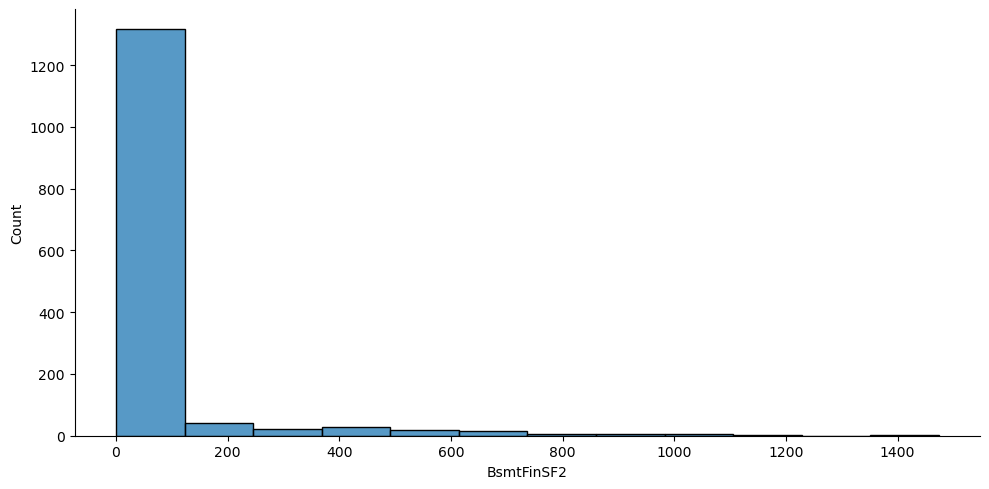

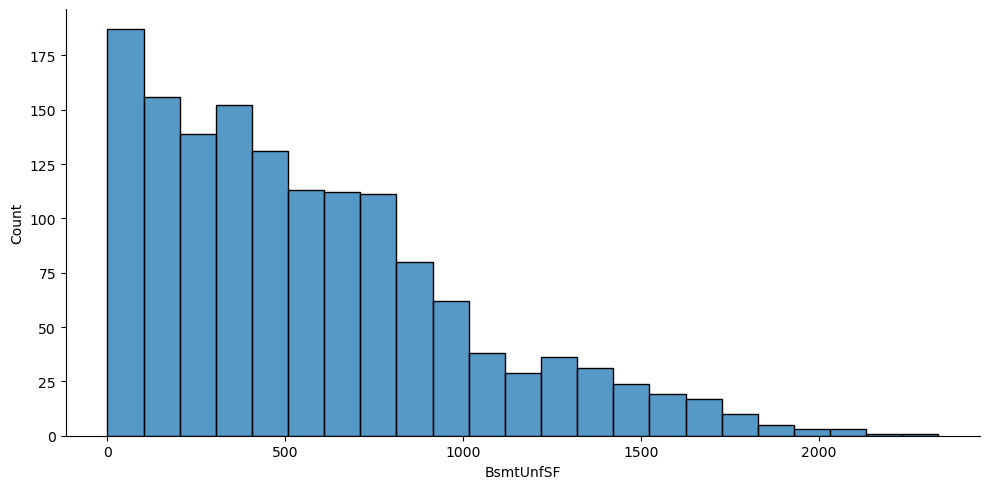

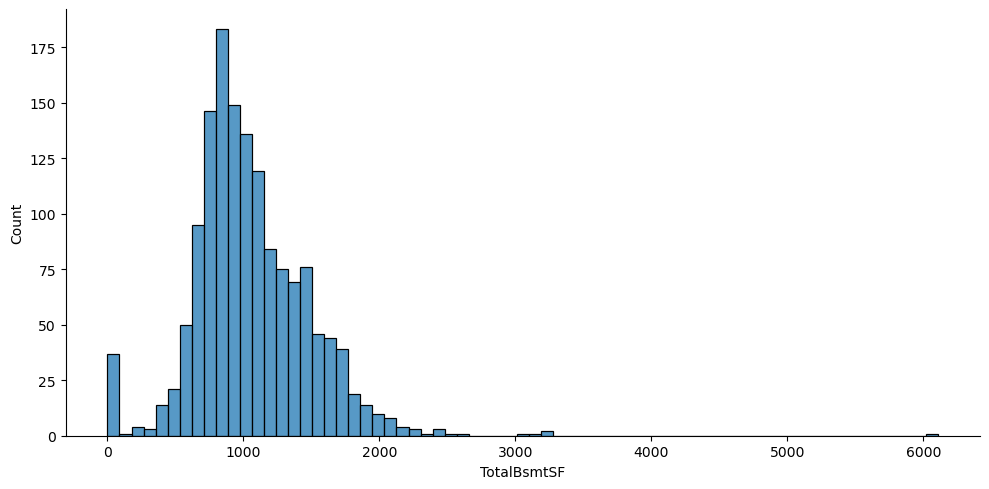

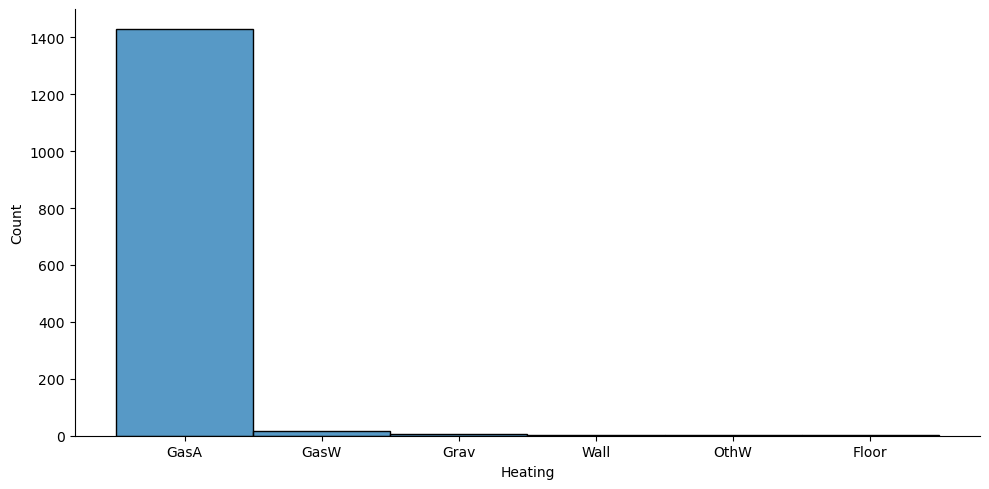

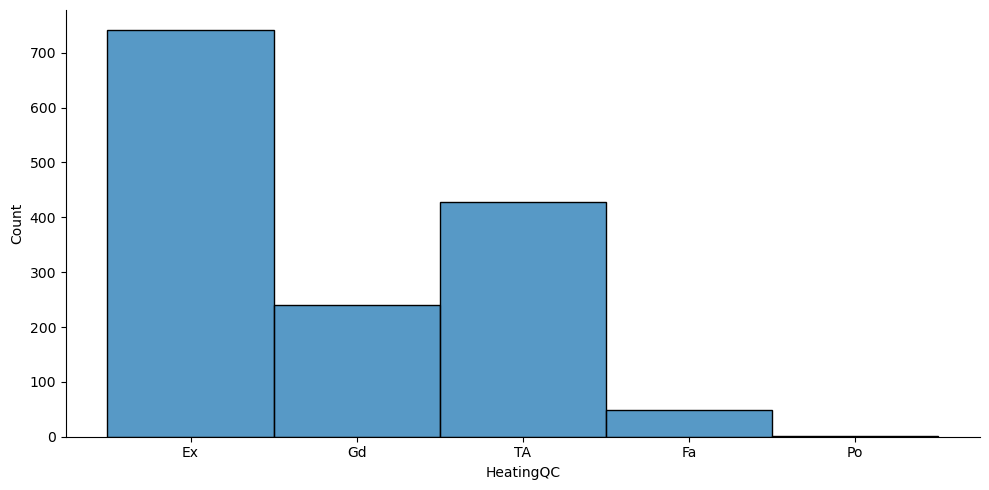

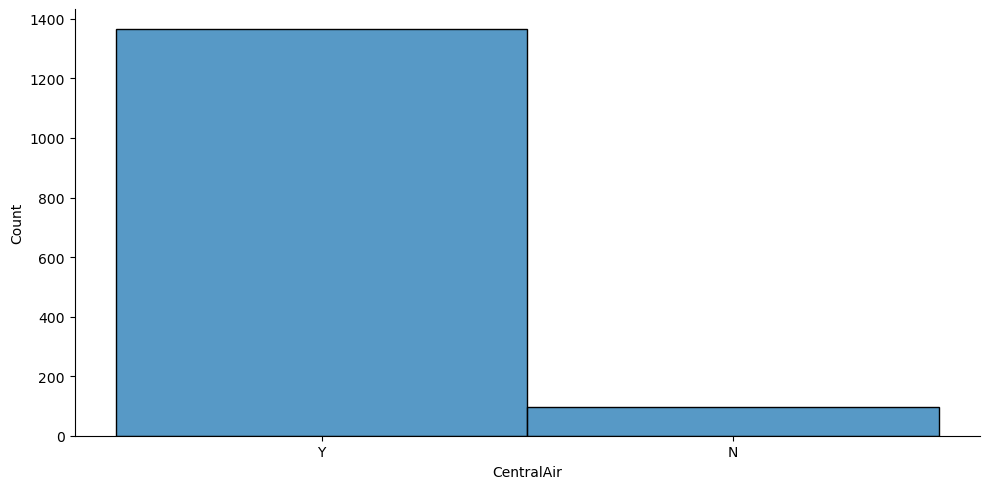

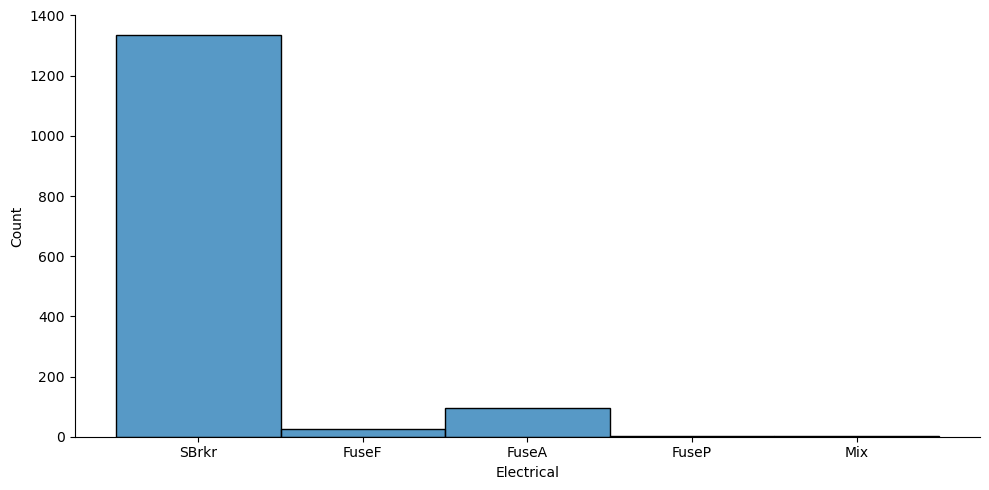

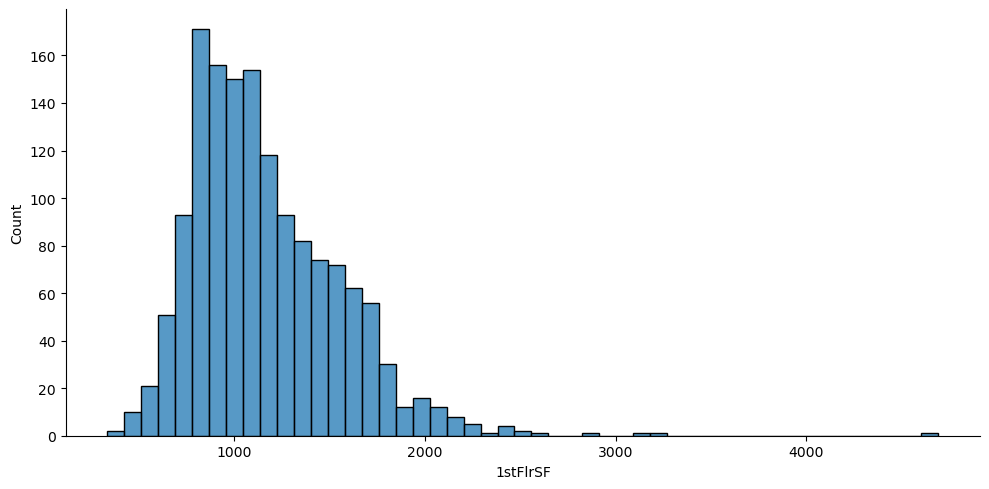

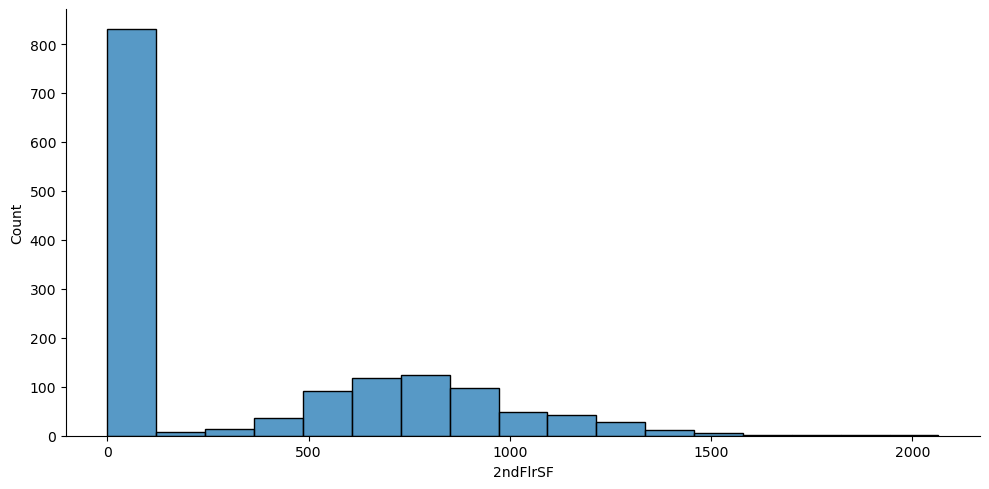

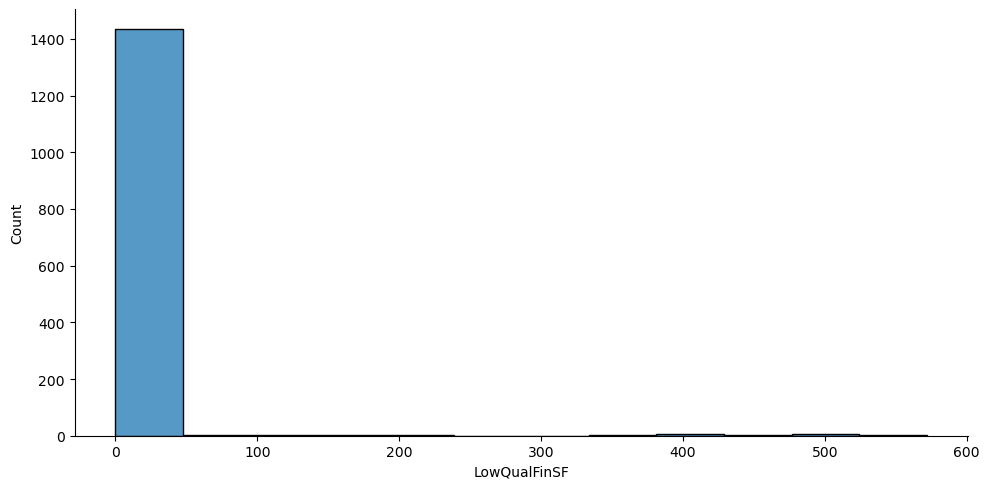

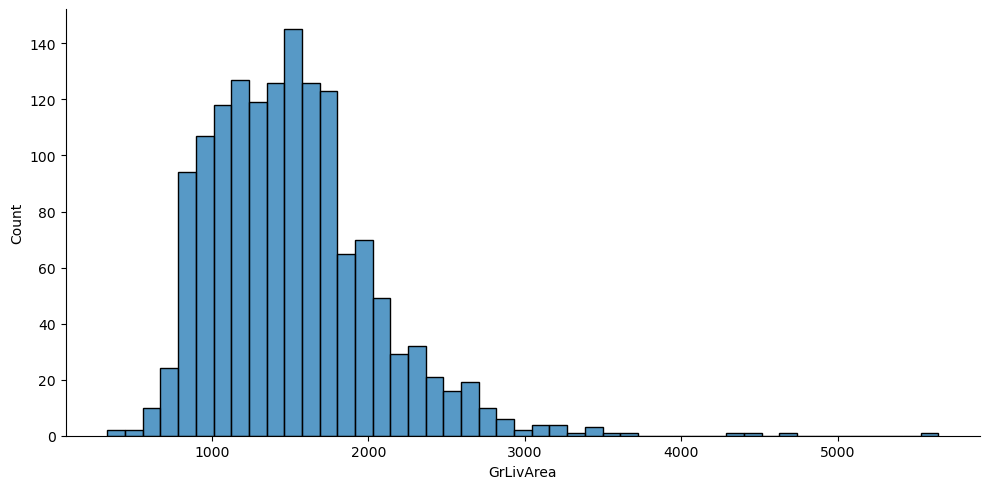

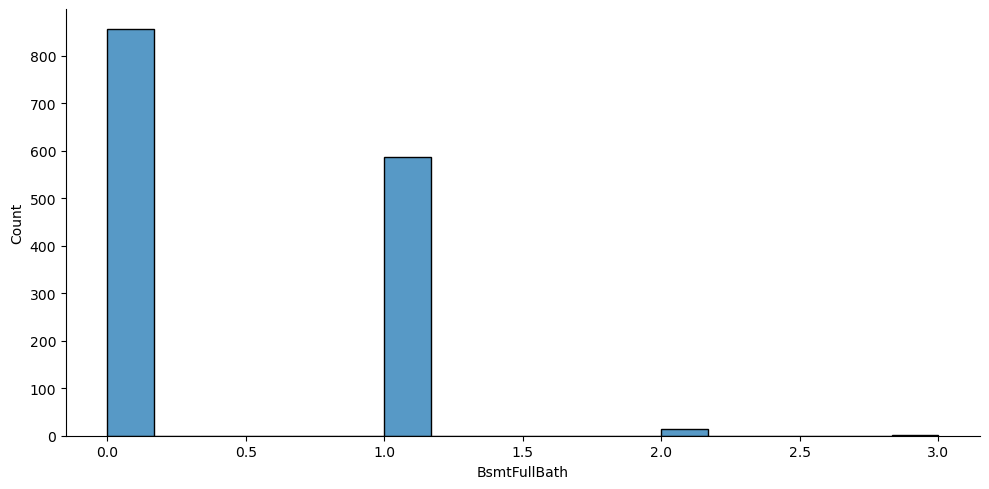

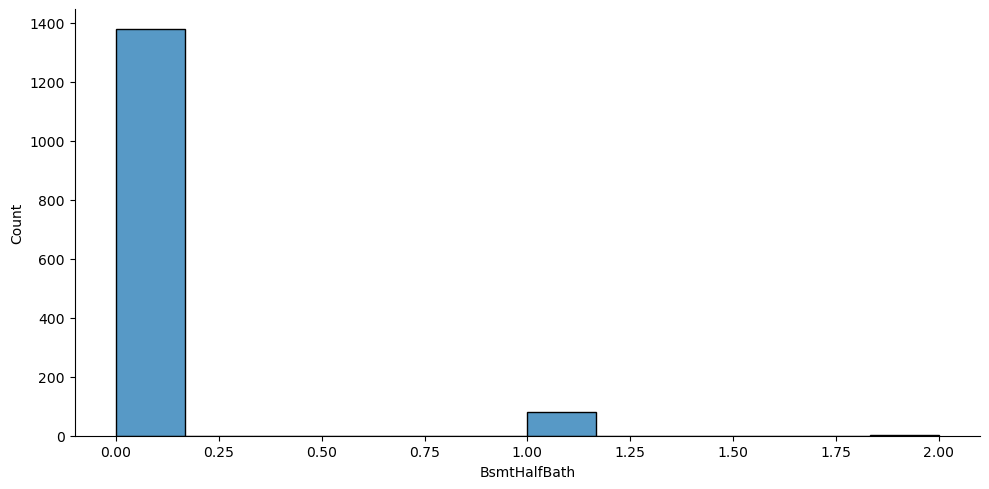

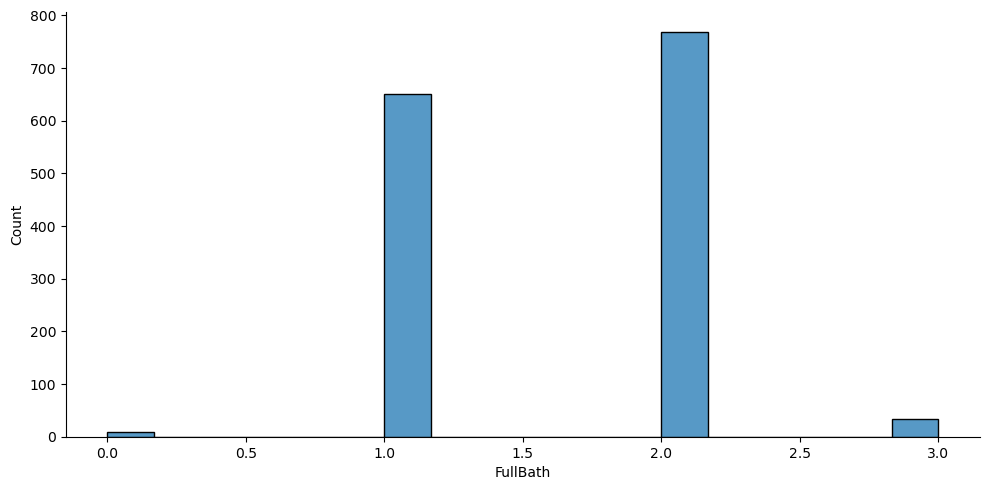

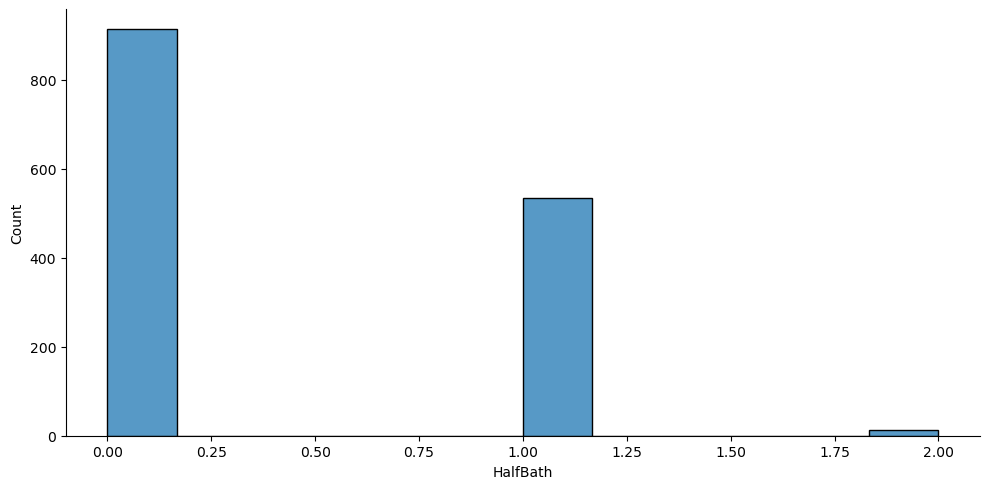

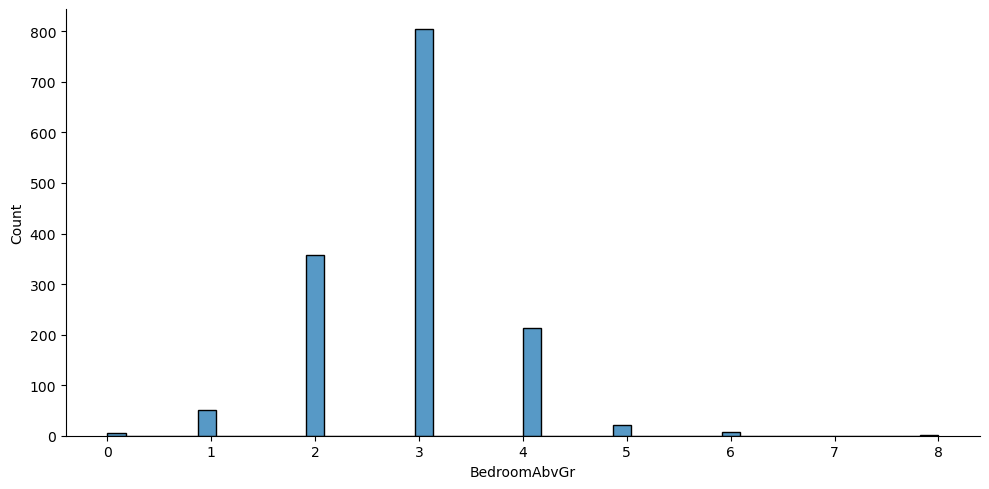

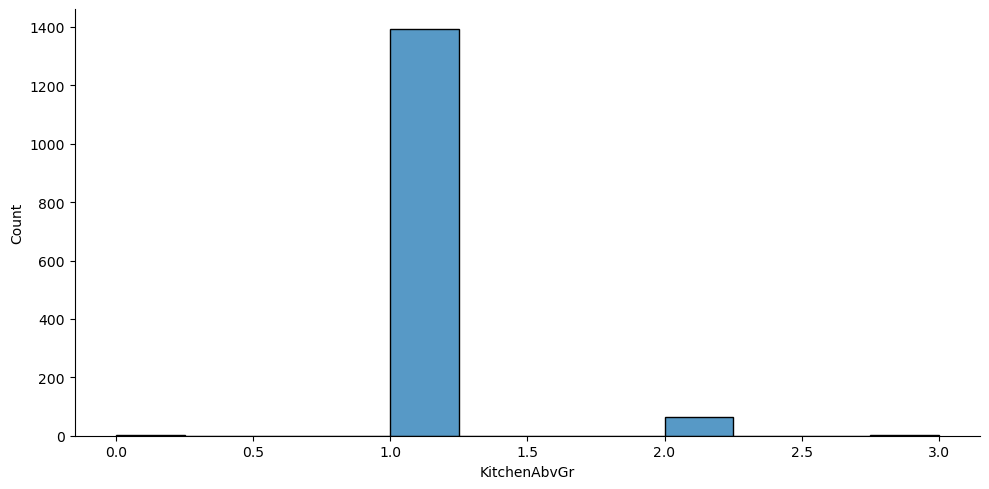

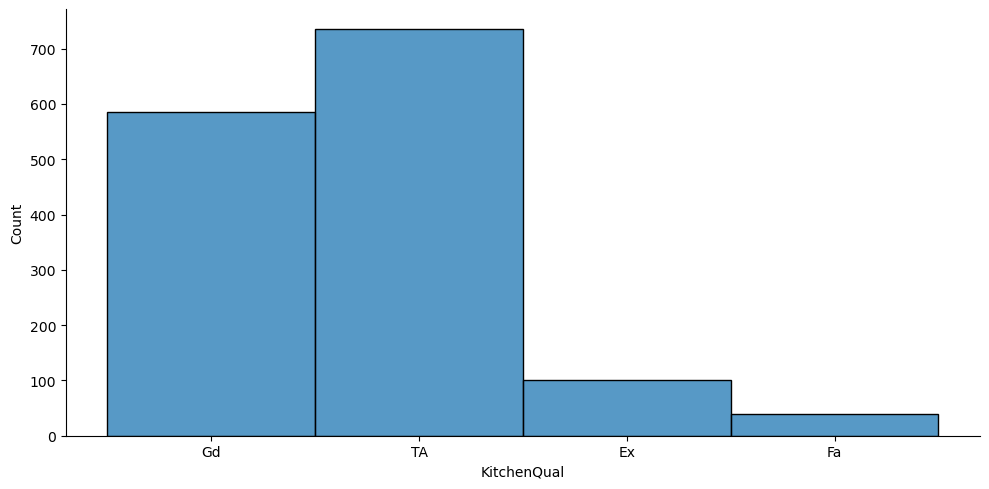

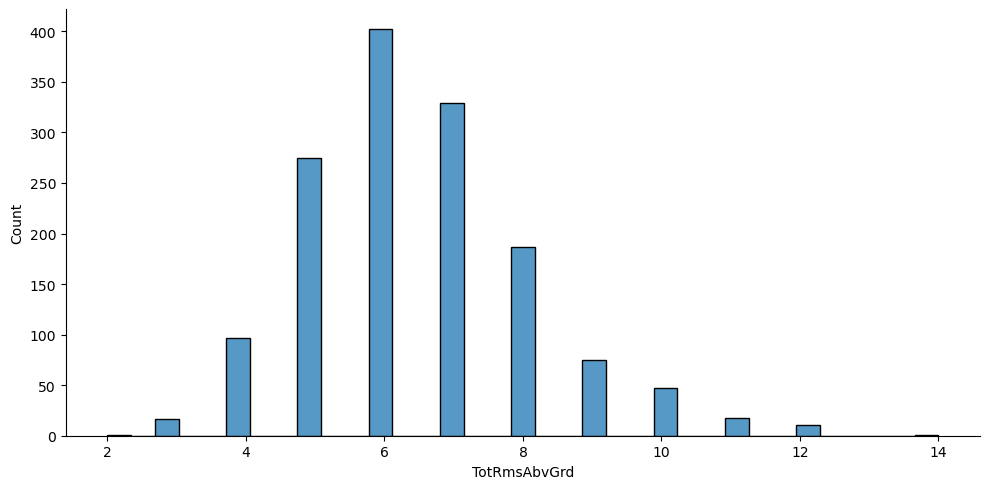

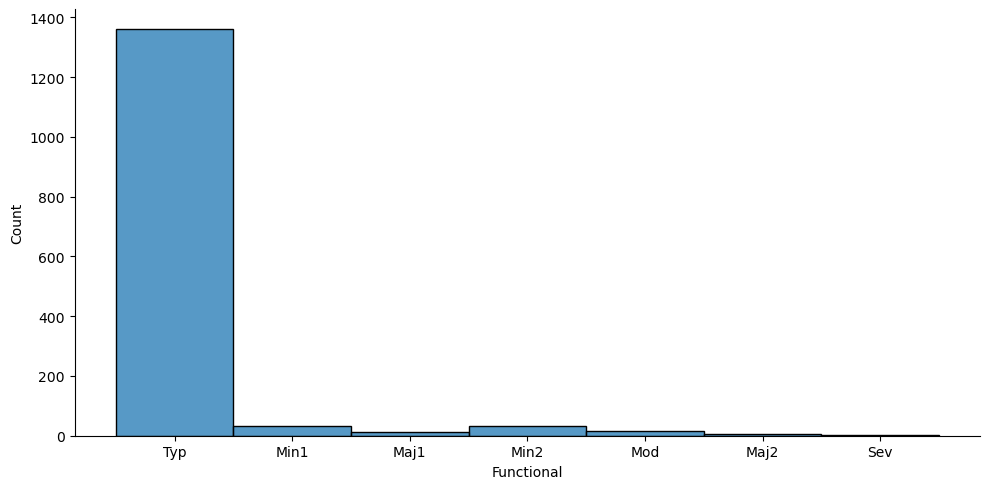

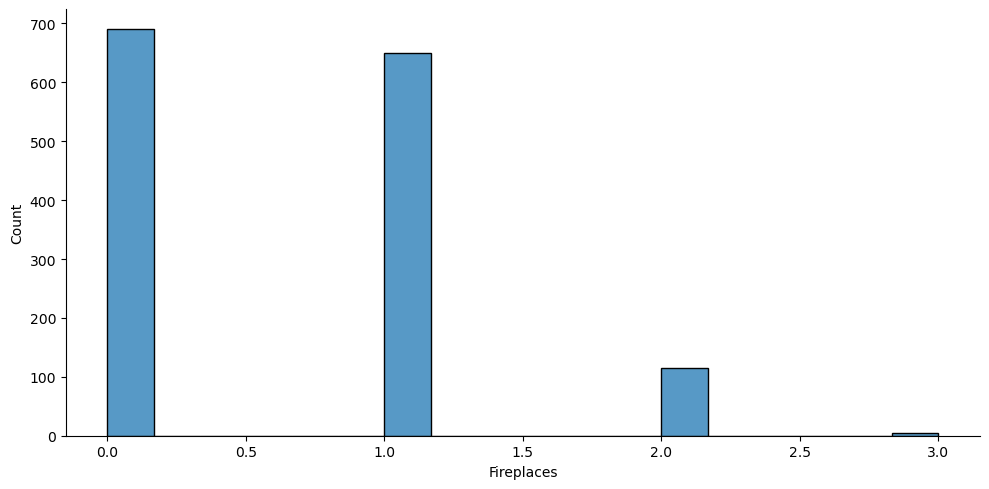

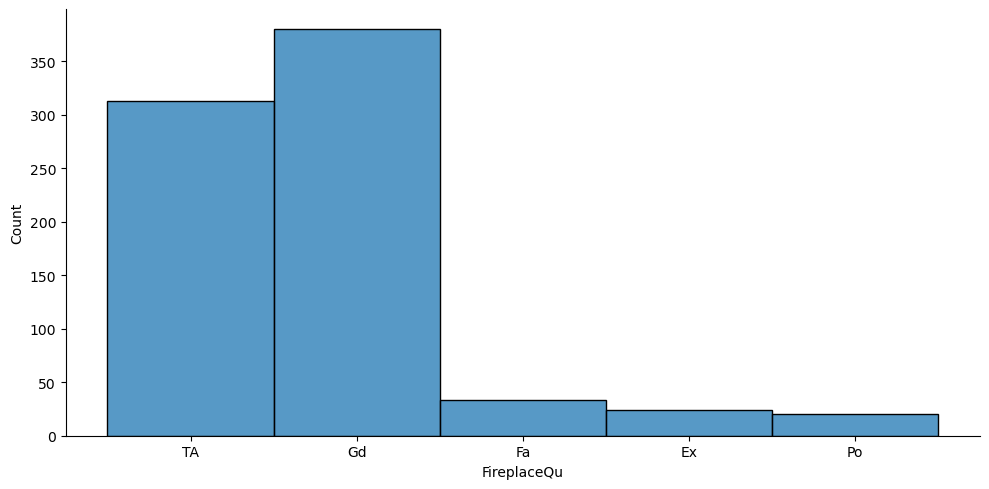

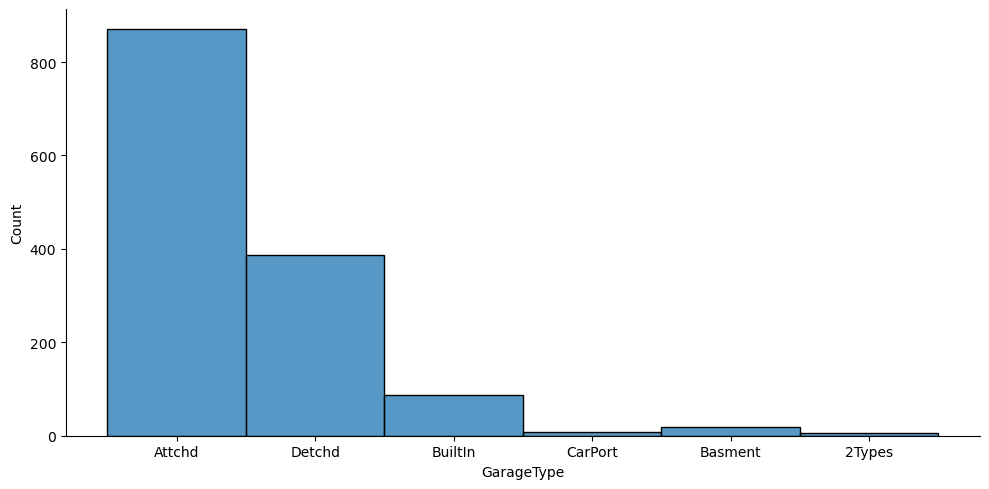

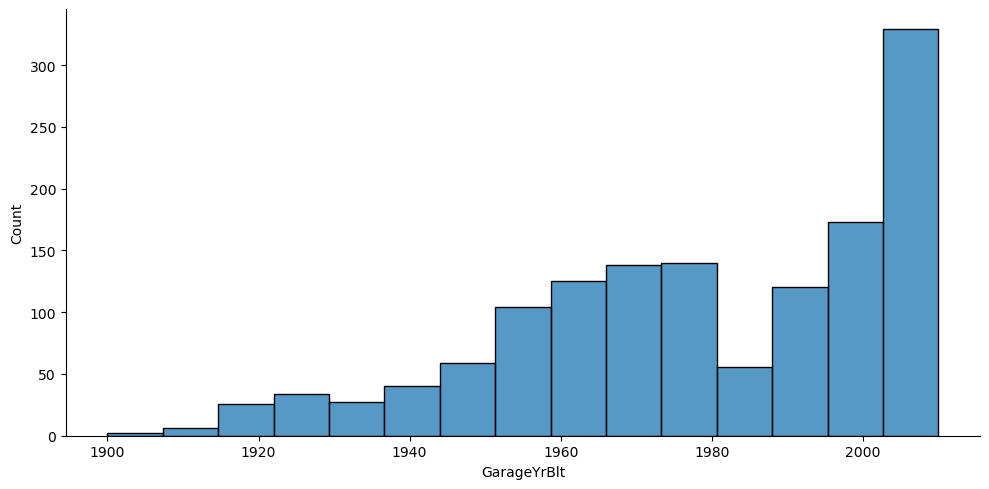

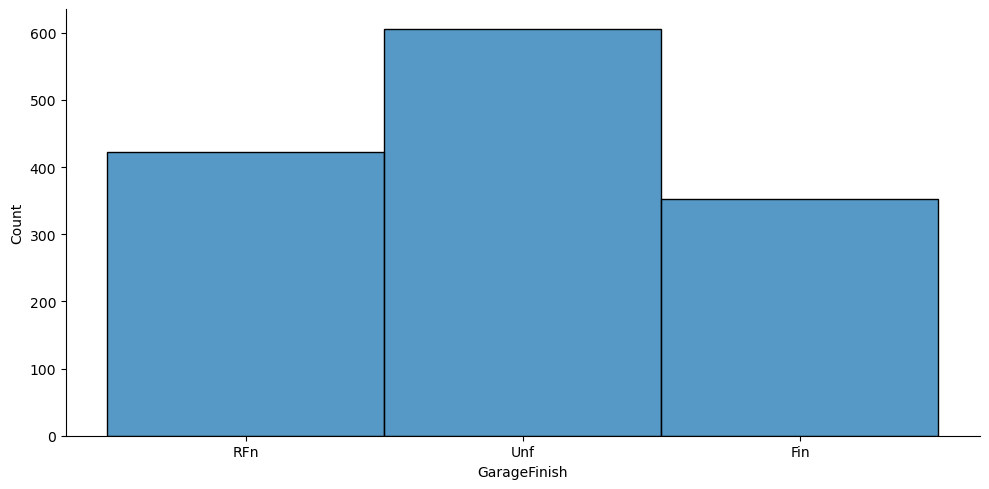

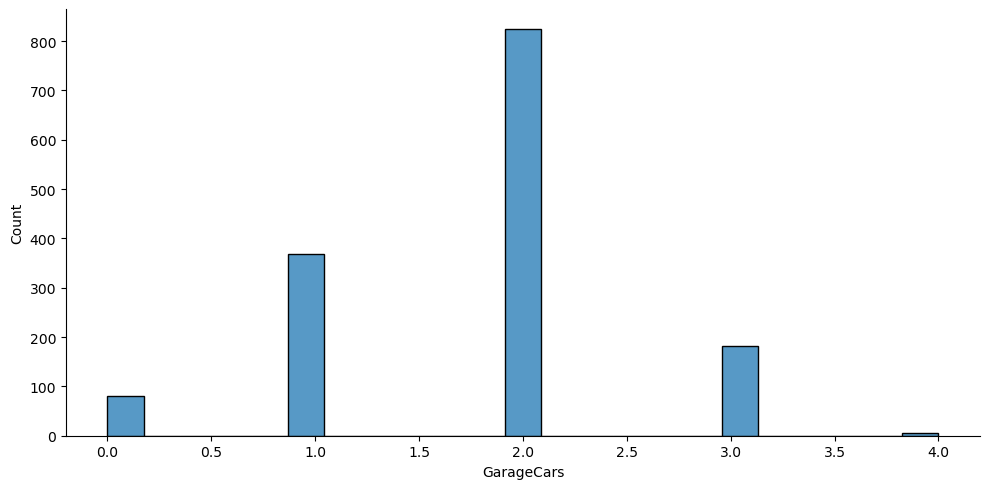

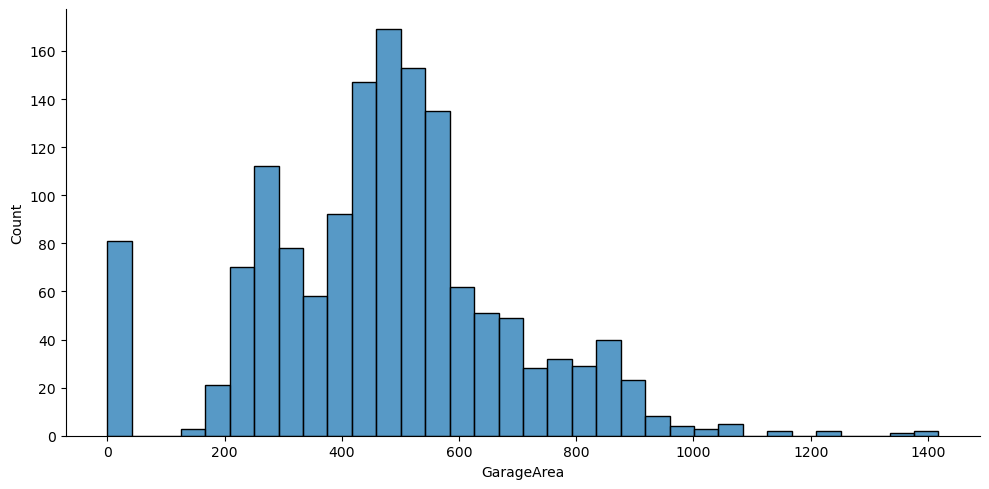

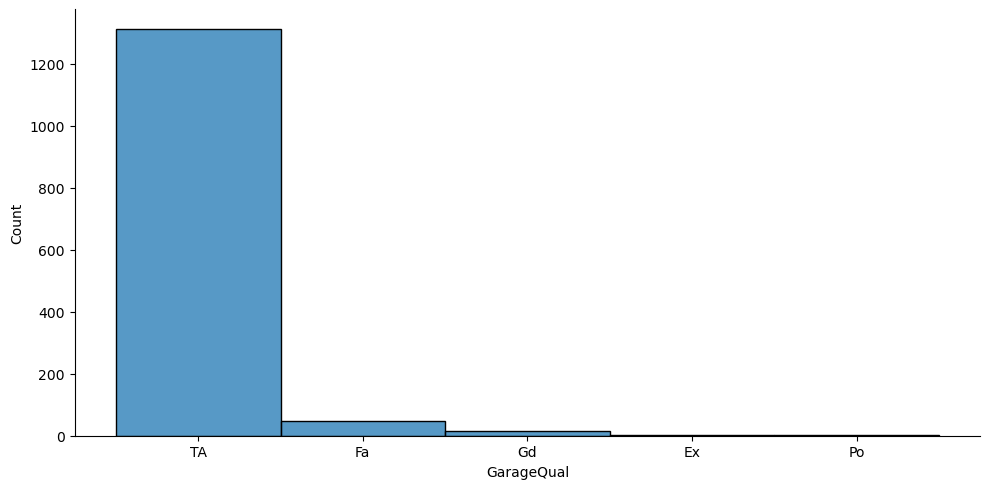

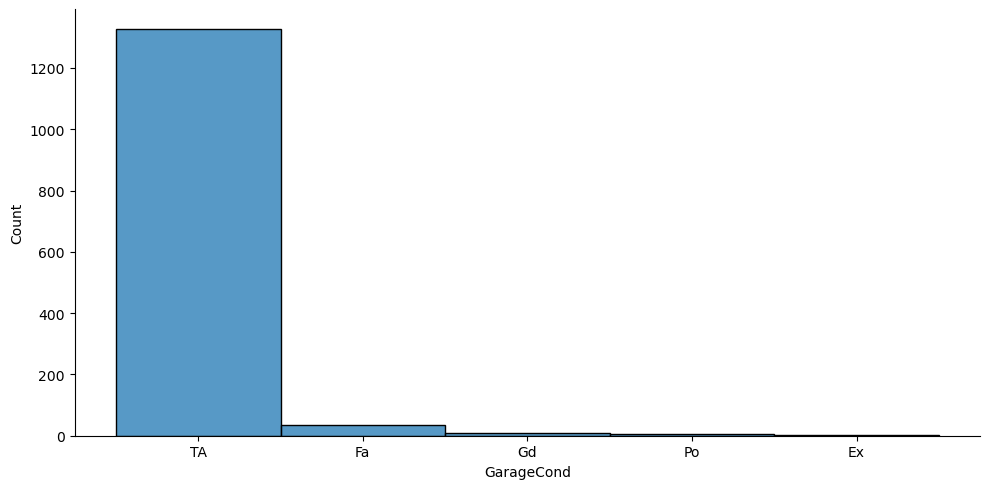

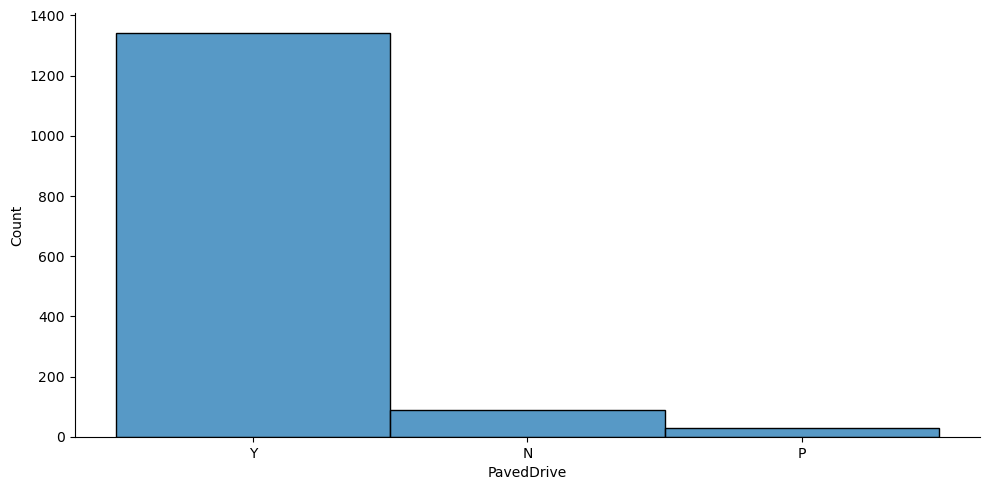

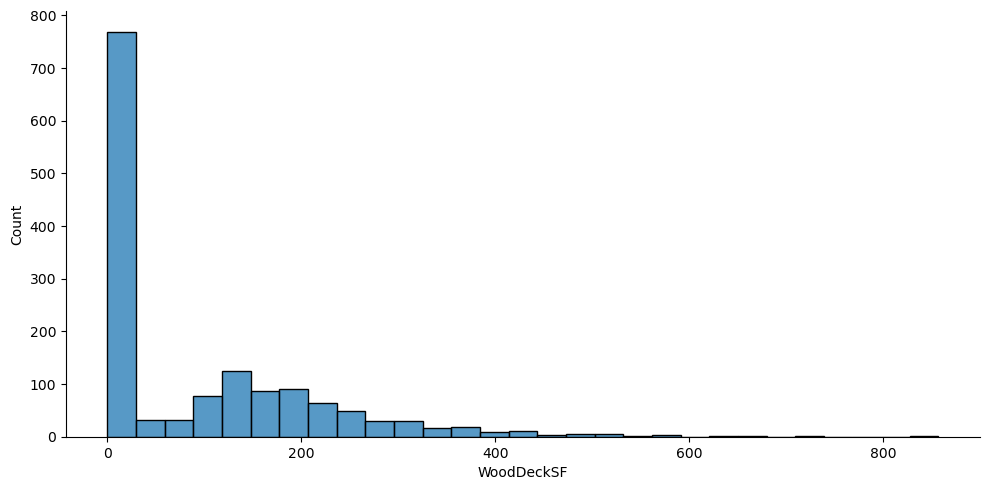

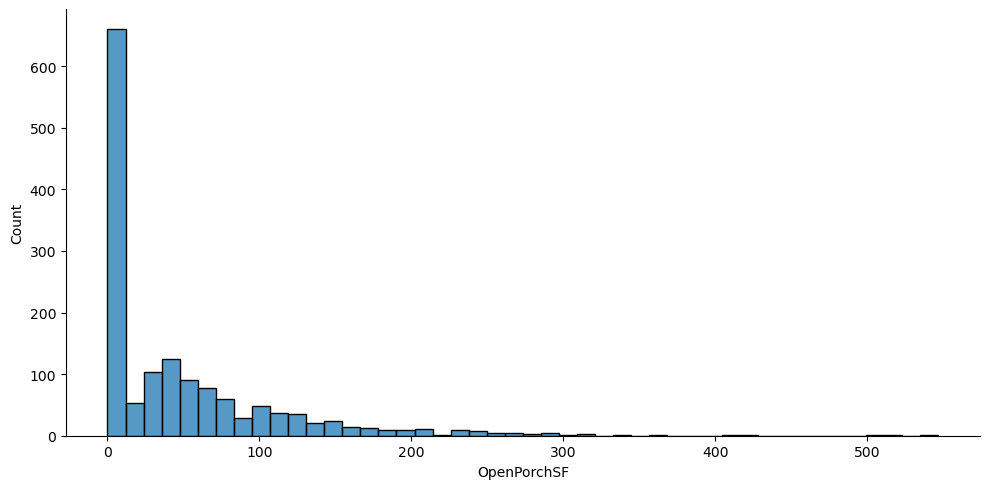

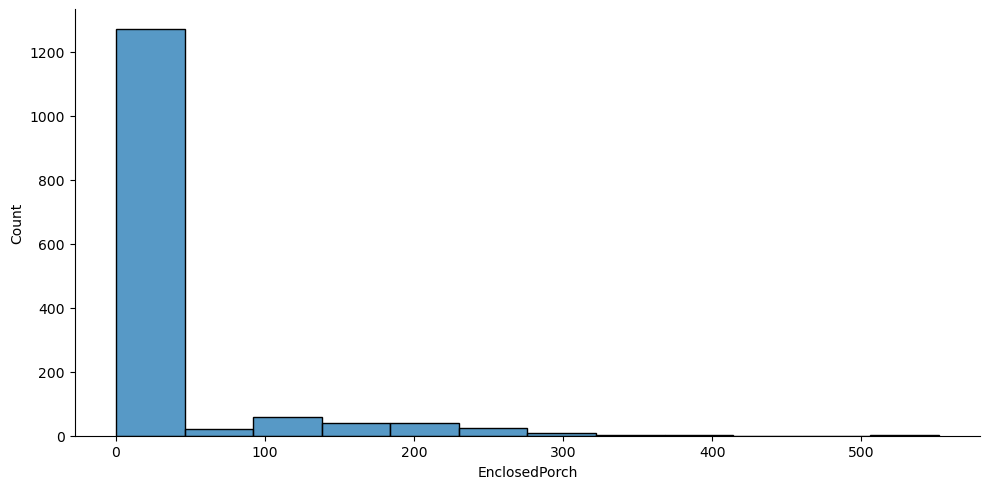

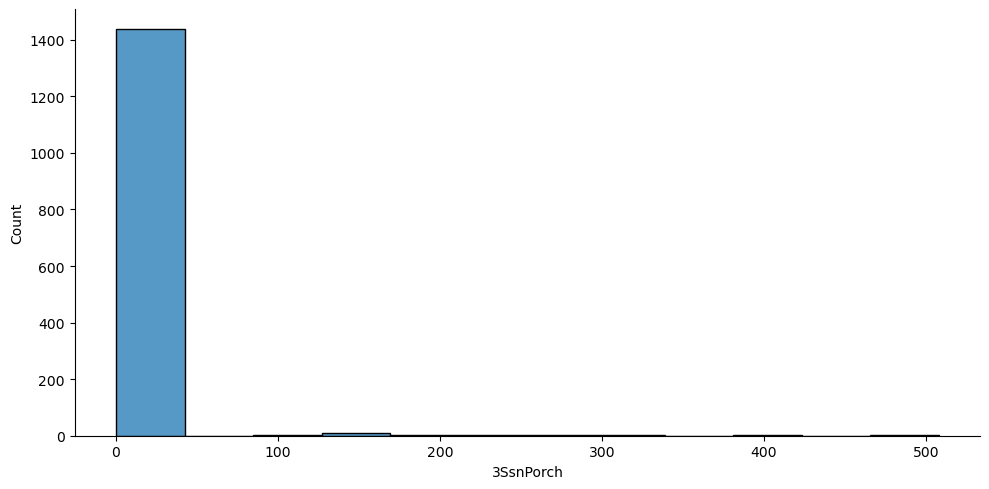

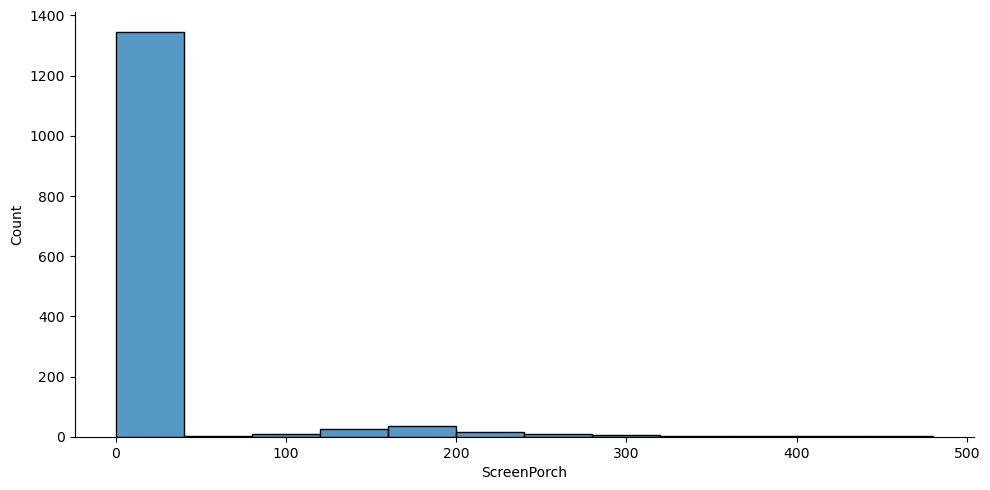

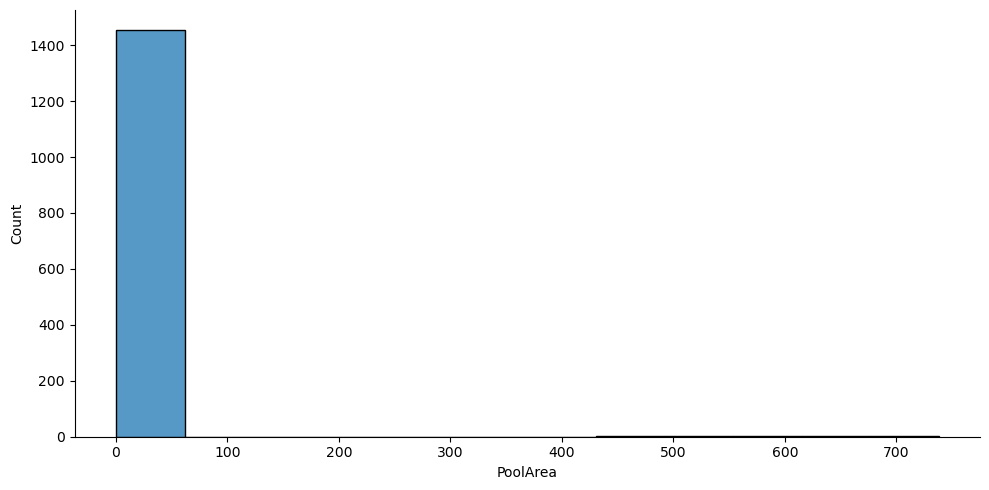

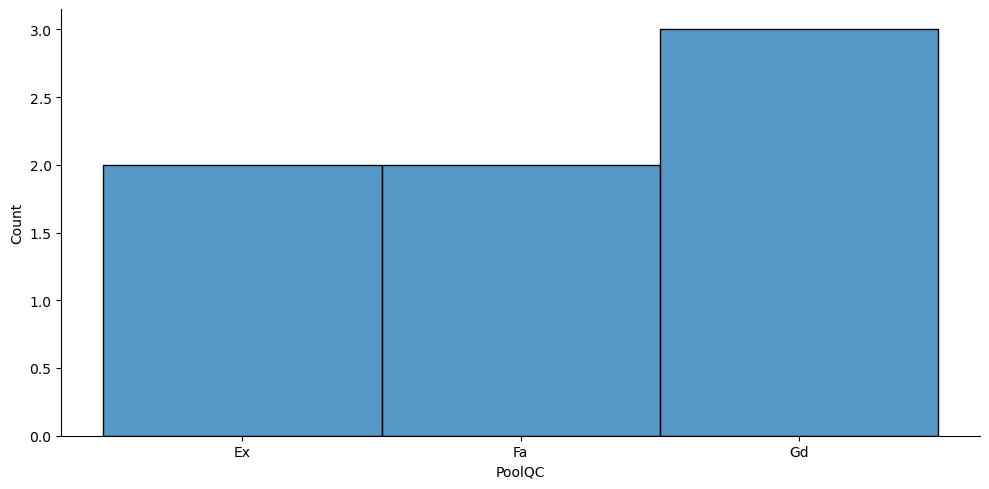

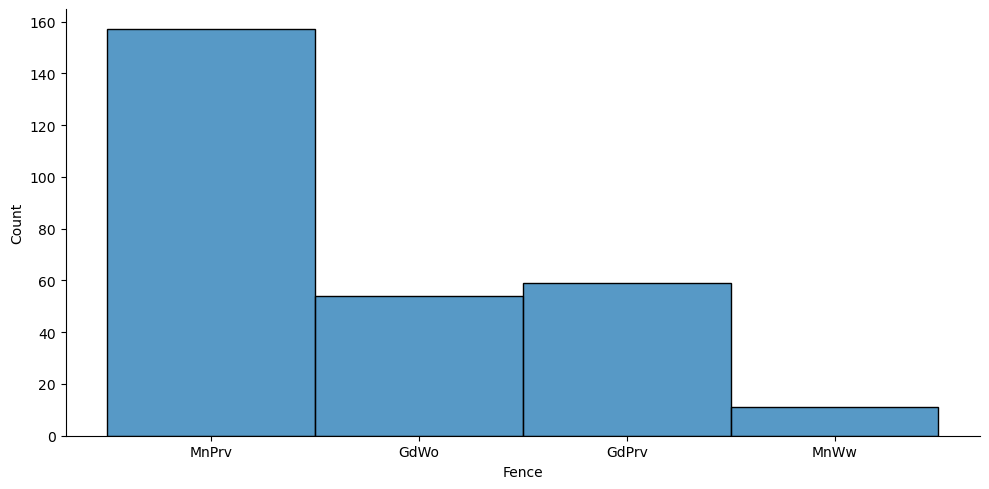

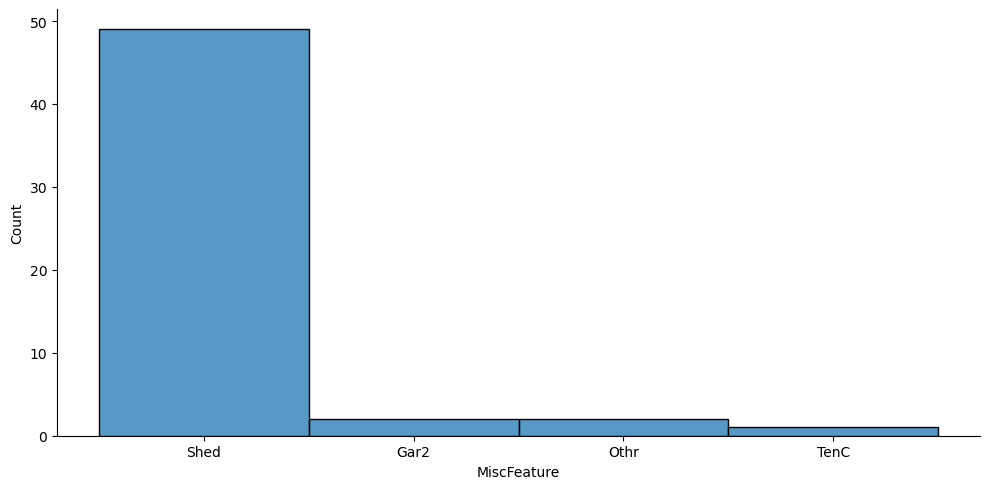

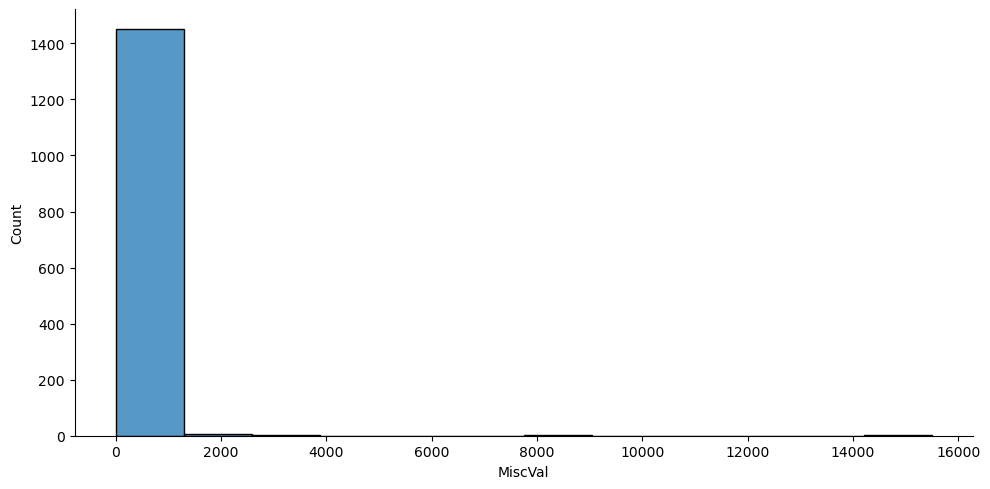

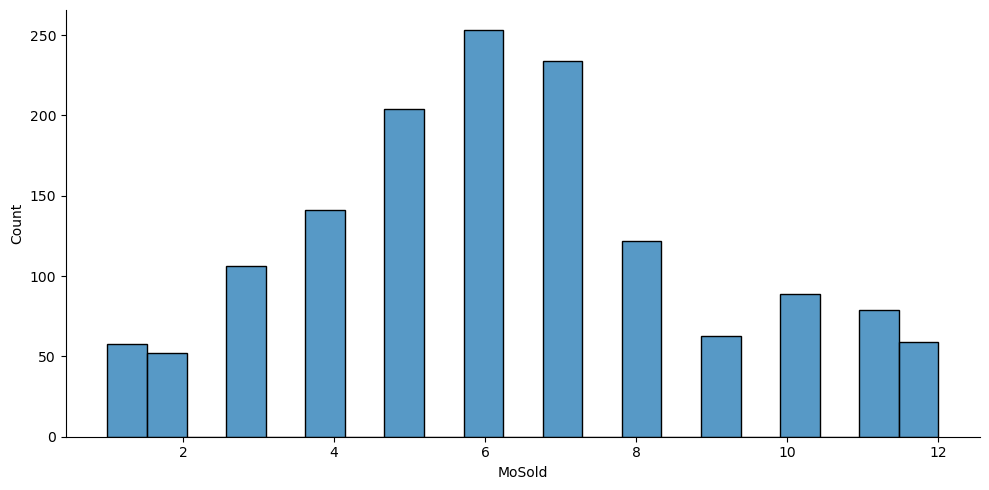

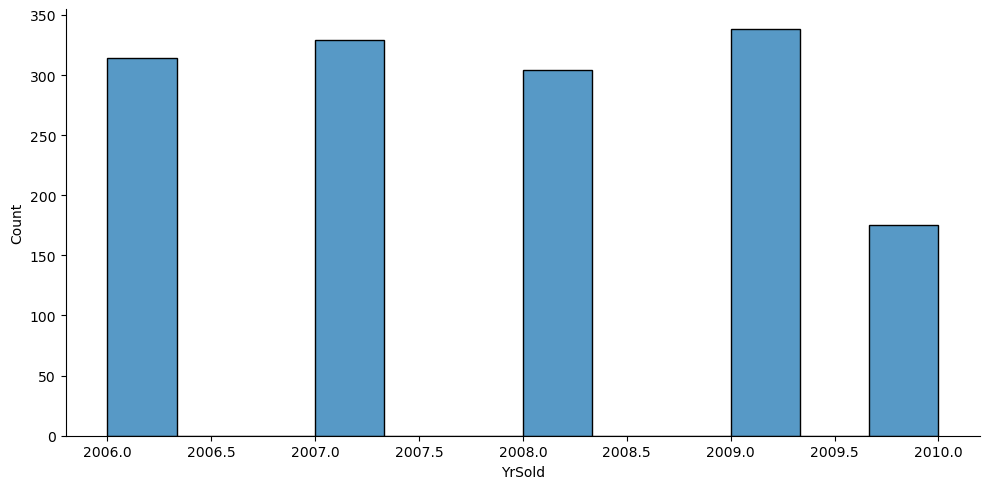

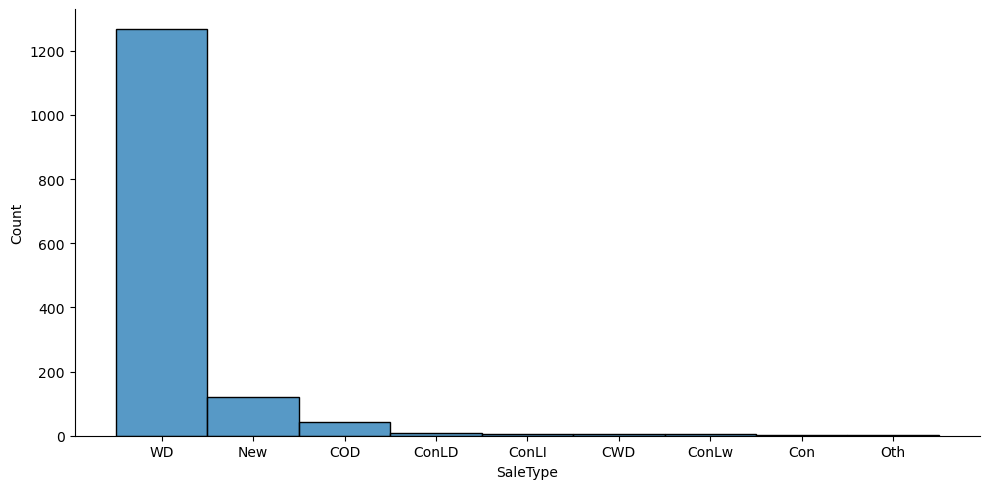

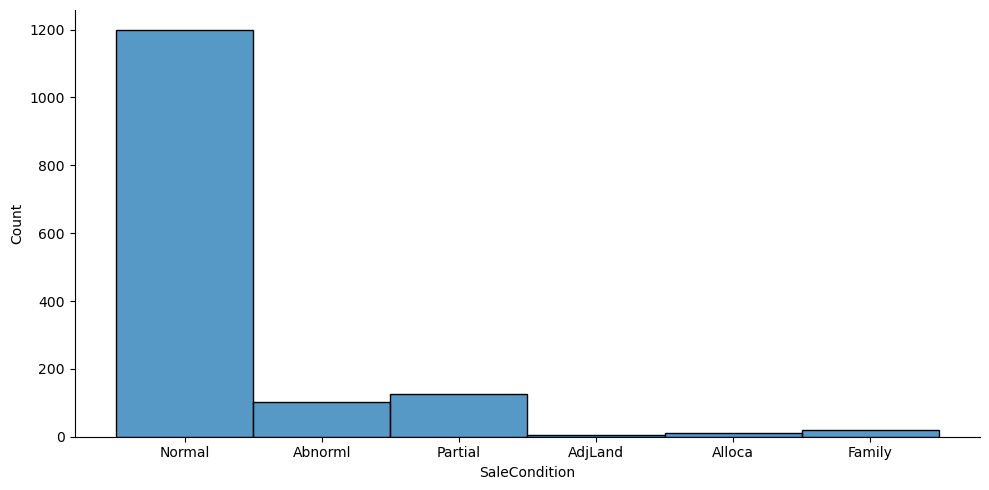

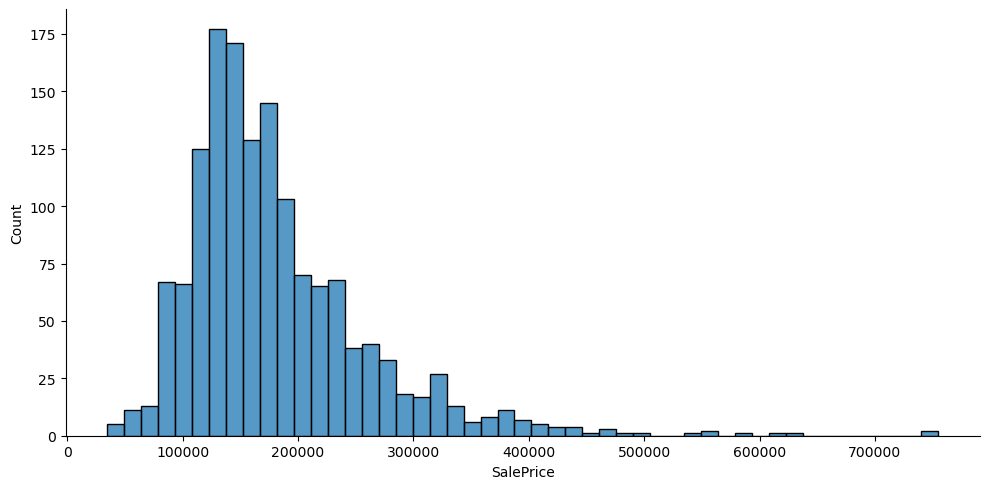

In [77]:
for column in train_data.columns:
    sns.displot(train_data[column], aspect=3)

In [87]:

possibly = ["LandContour", "LandSlope", "Condition1", "BldgType", "MasVnrArea", "Functional", "GarageQual", "GarageCond", "MiscFeature"]

We notice that there may be some outliers. We can next drop some columns from the dataset.


In [ ]:
# Dropping columns for both train and test dataset
#train_data = train_data.drop("Id", axis=1)
#test_data = test_data.drop("Id", axis=1)
train_data = train_data.drop(["Street", "Utilities", "OverallQual", "Id", "MSZoning", "Condition1", "BldgType", "RoofStyle", "LandContour", "ExterCond", "BsmtFinType2","BedroomAbvGr","GarageCars","GarageType", "FullBath", "SaleType", "Fence", "BsmtFinSF2", "BsmtCond", "Alley", "SaleCondition"], axis=1)
test_data = test_data.drop(["Street", "Utilities", "OverallQual", "Id", "MSZoning", "Condition1", "BldgType", "RoofStyle", "LandContour", "ExterCond", "BsmtFinType2","BedroomAbvGr","GarageCars","GarageType", "FullBath", "SaleType", "Fence", "BsmtFinSF2", "BsmtCond", "Alley", "SaleCondition"], axis=1)

print("a" if "SalePrice" in train_data.columns else "b")

Let's now plot GrLivArea and SalePrice

In [ ]:
"""neigh_lot_frontage = all_data.groupby('Neighborhood')['LotFrontage'].agg(["mean", "median"])
neigh_lot_frontage['avg_mean_median'] = (neigh_lot_frontage['mean'] + neigh_lot_frontage['median'] )/ 2
neigh_lot_frontage
print("a" if "SalePrice" in train_data.columns else "b")"""

Train data shape: (1460, 67)
Test data shape: (1459, 80)
a
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Alley            0
                ..
SaleType         0
SaleCondition    0
SalePrice        0
BuildAge         0
RemodAge         0
Length: 67, dtype: int64
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Alley            0
                ..
SaleType         0
SaleCondition    0
SalePrice        0
BuildAge         0
RemodAge         0
Length: 67, dtype: int64
a
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Alley            0
                ..
SaleType         0
SaleCondition    0
SalePrice        0
BuildAge         0
RemodAge         0
Length: 67, dtype: int64
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Alley            0
                ..
SaleType         0
SaleCondition    0
SalePrice        0
BuildAge         0
RemodAge         0
Length: 67, dtype: int64
   

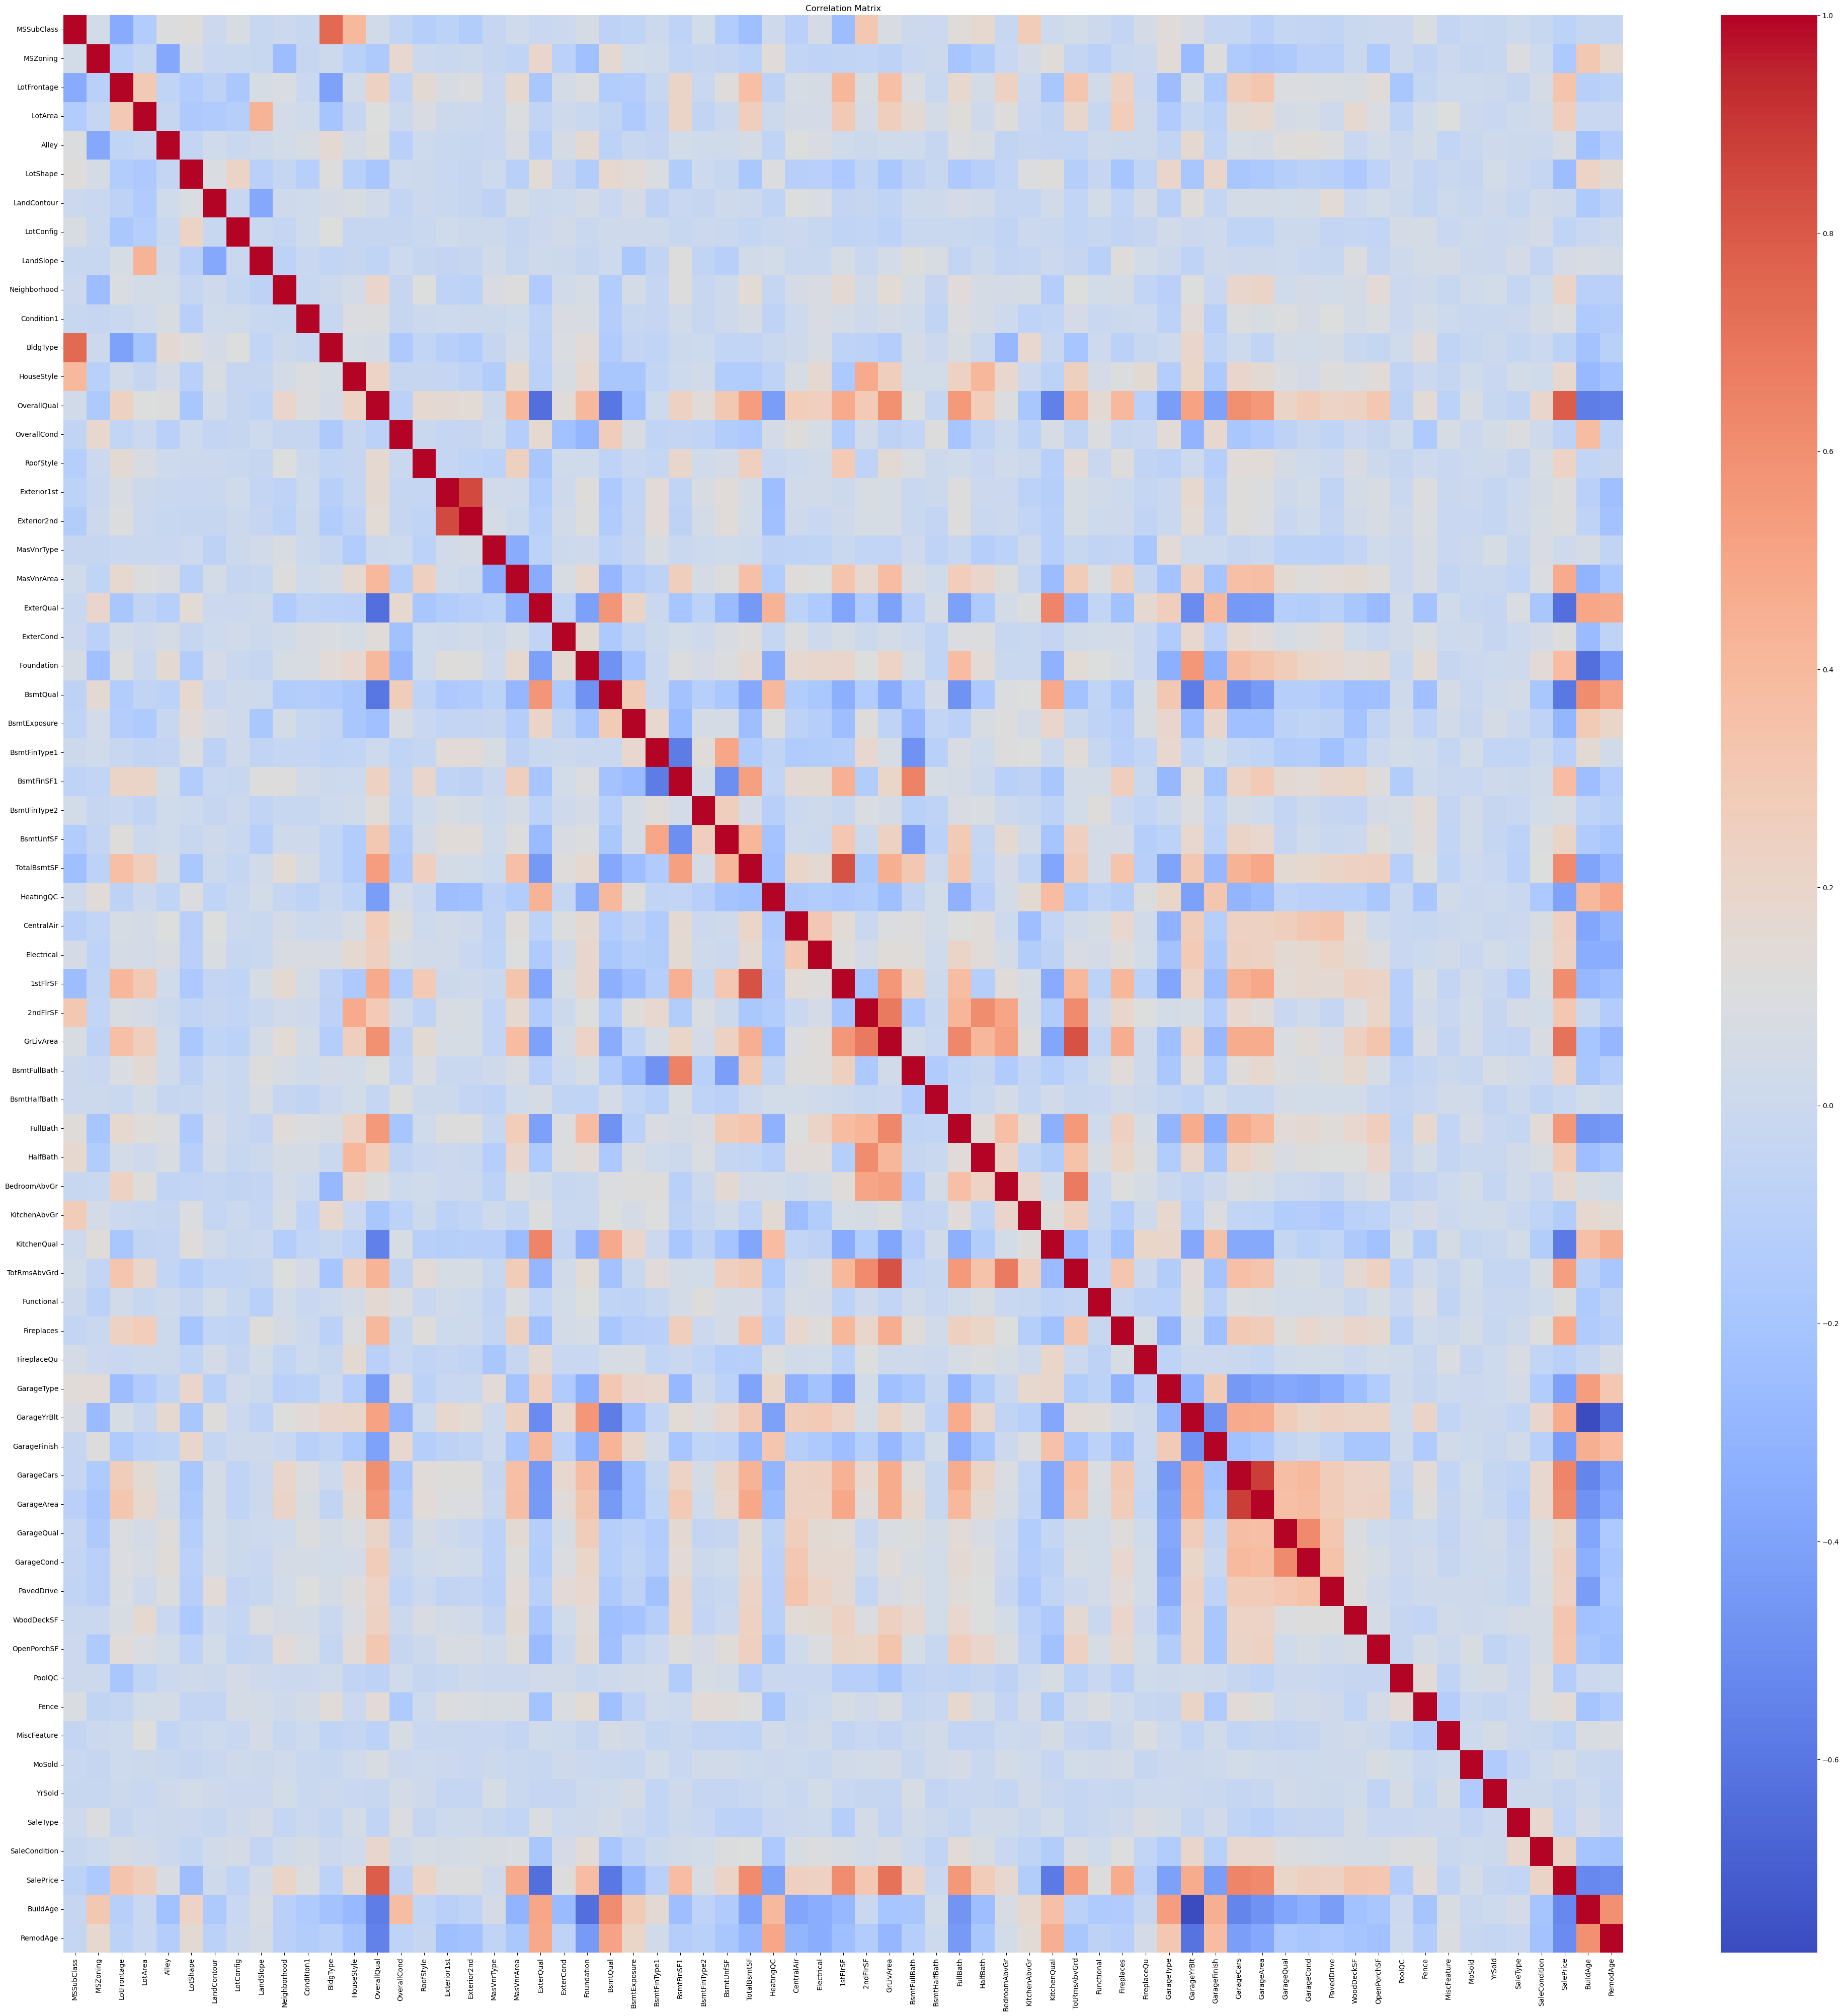

Column: MSSubClass, Rows removed: 0
Column: LotFrontage, Rows removed: 16
Column: LotArea, Rows removed: 30
Column: OverallQual, Rows removed: 0
Column: OverallCond, Rows removed: 1
Column: MasVnrArea, Rows removed: 25
Column: BsmtFinSF1, Rows removed: 0
Column: BsmtUnfSF, Rows removed: 0
Column: TotalBsmtSF, Rows removed: 3
Column: 1stFlrSF, Rows removed: 1
Column: 2ndFlrSF, Rows removed: 0
Column: GrLivArea, Rows removed: 1
Column: BsmtFullBath, Rows removed: 0
Column: BsmtHalfBath, Rows removed: 77
Column: FullBath, Rows removed: 0
Column: HalfBath, Rows removed: 0
Column: BedroomAbvGr, Rows removed: 1
Column: KitchenAbvGr, Rows removed: 61
Column: TotRmsAbvGrd, Rows removed: 0
Column: Fireplaces, Rows removed: 0
Column: GarageYrBlt, Rows removed: 0
Column: GarageCars, Rows removed: 0
Column: GarageArea, Rows removed: 1
Column: WoodDeckSF, Rows removed: 2
Column: OpenPorchSF, Rows removed: 13
Column: MoSold, Rows removed: 0
Column: YrSold, Rows removed: 0
Column: SalePrice, Rows rem

In [191]:
# Required imports
!pip install pandas numpy scikit-learn lazypredict
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
import lazypredict
"""
# Load the data
try:
    train_data = pd.read_csv(
        "/Users/thomas/Onedrive-SNHU/25SPDAY/CS411/house-prices-advanced-regression-techniques/train.csv"
    )
    test_data = pd.read_csv(
        "/Users/thomas/Onedrive-SNHU/25SPDAY/CS411/house-prices-advanced-regression-techniques/test.csv"
    )

except FileNotFoundError as e:
    print(f"Error loading data: {e}")
    raise
"""
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)
print("a" if "SalePrice" in train_data.columns else "b")
# Define outlier bounds - wrapped in a function with error handling
def remove_outliers(datagram, feature):
    if feature not in datagram.columns:
        print(f"Warning: '{feature}' column not found in the dataset")
        return datagram
    
    Q1 = datagram[feature].quantile(0.25)
    Q3 = datagram[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR

    return datagram[
        (datagram[feature] >= lower_bound) & (datagram[feature] <= upper_bound)
    ]
#define qualitative columns
qualitative_columns = train_data.select_dtypes(include=['object']).columns.tolist()

# Define numeric columns
numeric_cols = [col for col in train_data.columns if col not in qualitative_columns and col != 'Id']


# Fill NA values in numeric columns with their respective medians
for col in numeric_cols:
    if col in train_data.columns:
        if train_data[col].dtype in ['int64', 'float64']:
            train_data[col] = train_data[col].fillna(train_data[col].median())
            if col in test_data.columns:
                test_data[col] = test_data[col].fillna(train_data[col].median())

label_encoders = {}
# Fill missing values in categorical columns with "NA" before encoding
for col in qualitative_columns:
    if col in train_data.columns:
        train_data[col] = train_data[col].fillna("NA")
        if col in test_data.columns:
            test_data[col] = test_data[col].fillna("NA")

# Use OrdinalEncoder to handle unseen categories
encoder = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
train_data[qualitative_columns] = encoder.fit_transform(train_data[qualitative_columns])
test_data[qualitative_columns] = encoder.transform(test_data[qualitative_columns])

# Convert to int if necessary
train_data[qualitative_columns] = train_data[qualitative_columns].astype(int)
test_data[qualitative_columns] = test_data[qualitative_columns].astype(int)

# Fill any remaining NaN values with -1
train_data.fillna(-1, inplace=True)
test_data.fillna(-1, inplace=True)


# First, fill missing values in categorical columns
for col in qualitative_columns:
    if col in train_data.columns:
        # Fill missing values with mode (most frequent value)
        mode_val = train_data[col].mode()[0]
        train_data[col] = train_data[col].fillna(mode_val)
        if col in test_data.columns:
            test_data[col] = test_data[col].fillna(mode_val)

# Then apply LabelEncoder
for col in qualitative_columns:
    if col in train_data.columns and train_data[col].dtype == "object":
        try:
            le = LabelEncoder()
            train_data[col] = le.fit_transform(train_data[col].astype(str))
            if col in test_data.columns:
                test_data[col] = le.transform(test_data[col].astype(str))
            label_encoders[col] = le
        except Exception as e:
            print(f"Error processing column {col}: {e}")


train_data.replace([np.inf, -np.inf], np.nan, inplace=True)
test_data.replace([np.inf, -np.inf], np.nan, inplace=True)


train_data.fillna(-1, inplace=True)
test_data.fillna(-1, inplace=True)
print(train_data.isna().sum())  # Check for NaNs
print(np.isinf(train_data).sum())  # Check for infinite values




print("a" if "SalePrice" in train_data.columns else "b")
print(train_data.isna().sum())  # Check for NaNs
print(np.isinf(train_data).sum())  # Check for infinite values

print(test_data)
columns = train_data.columns

print("\nProcessing complete. Final train data shape:", train_data.shape)
scaler = MinMaxScaler()
train_data = pd.DataFrame(scaler.fit_transform(train_data), columns=columns)
corr_matrix = train_data.corr()
# Plot the heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

for col in numeric_cols:
    before = train_data.shape[0]
    train_data = remove_outliers(train_data, col)
    after = train_data.shape[0]
    print(f"Column: {col}, Rows removed: {before - after}")

#for column in train_data.columns:
#    sns.displot(train_data[column], aspect=2)

drop_based_on_correlation = ["Exterior1st" or "Exterior2nd", "GarageCars" or "GarageArea", "GarageYrBlt" or "GarageFinish"]

In [193]:
tmp = ["KitchenAbvGr", "BsmtHalfBath", "EnclosedPorch"]

def bin(col, bins):
    for i in range(1, len(bins)):
        bin_label = f"{col}{bins[i - 1]}_{bins[i]}"
        train_data[bin_label] = ((train_data[col] >= bins[i - 1]) & (train_data[col] < bins[i])).astype(int)
        #test_data[bin_label] = ((test_data[col] >= bins[i - 1]) & (test_data[col] < bins[i])).astype(int)
        #train_data.drop(col, axis=1)
bin("BuildAge", [0, 40, 80, 120, 140])
bin("TotalBsmtSF", [0, 1000, 2000, 3000, 4000, 5000, 6110])
bin("LotFrontage", [21, 79, 139, 197, 255, 313])
bin(
    "LotArea",
    [
        1300,
        15563,
        29826,
        44089,
        58352,
        72615,
        86878,
        101141,
        115404,
        129667,
        143930,
        158193,
        172456,
        186719,
        200982,
        215245,
    ],
)
bin("1stFlrSF", [334, 1251, 2168, 3085, 4002, 4692])
bin("2ndFlrSF", [0, 500, 1000, 1500, 2065])
bin("GrLivArea", [334, 1661, 2988, 4315, 5642])
bin(
    "WoodDeckSF",
    [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 857],
)
bin("OpenPorchSF", [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 547])

bin("GarageArea", [0, 200, 400, 600, 800, 1000, 1200, 1418])

#train_data["FrontagePerSF"] = train_data["LotFrontage"]/train_data["LotArea"]
#train_data["totalSQFT"] = train_data["GrLivArea"] + train_data["TotalBsmtSF"] 

#test_data["FrontagePerSF"] = test_data["LotFrontage"]/test_data["LotArea"]
#test_data["totalSQFT"] = test_data["GrLivArea"] + test_data["TotalBsmtSF"]


todrop = ["GarageArea", "LotFrontage", "LotArea", "BsmtFullBath", "HalfBath","GrLivArea","TotalBsmtSF", "GarageArea", "1stFlrSF", "BuildAge", "OpenPorchSF", "WoodDeckSF", "GrLivArea", "2ndFlrSF"]
#train_data.drop(todrop, axis=1)
#test_data.drop(todrop, axis=1)

train_data.fillna(-1, inplace=True)
test_data.fillna(-1, inplace=True)

print("a" if "SalePrice" in train_data.columns else "b")

#train_data.drop(["YearBuilt", "TotalBsmtSF", "LotFrontage", "LotArea", "1stFlrSF", "2ndFlrSF", "GrLivArea", "WoodDeckSF","OpenPorchSF", "YearBuilt"], axis=1)
#test_data.drop(["YearBuilt", "TotalBsmtSF", "LotFrontage", "LotArea", "1stFlrSF", "2ndFlrSF", "GrLivArea", "WoodDeckSF","OpenPorchSF","YearBuilt"], axis=1)

print("a" if "SalePrice" in train_data.columns else "b")

print(train_data["SalePrice"])


columns = train_data.columns

#fit_transform returns a numPy array by default, but this shouldn't matter as SalePrice is numeric  
#train data will now be all numeric columns scaled. 

print("a" if "SalePrice" in train_data.columns else "b")

Inputs = [col for col in train_data.columns if col != "SalePrice"]
Output = ["SalePrice"]

#train_data.fillna(-1, inplace=True)
#test_data.fillna(-1, inplace=True)

print("done")

print(train_data.isna().sum().sum())  # Check for NaNs
print(1 == np.isinf(train_data).sum())  # Check for infinite values

a
a
0      0.24
2      0.26
3      0.15
4      0.30
5      0.15
       ... 
1454   0.21
1455   0.19
1456   0.24
1457   0.32
1458   0.15
Name: SalePrice, Length: 1225, dtype: float64
a
done
0
MSSubClass             False
MSZoning               False
LotFrontage            False
LotArea                False
Alley                  False
                       ...  
GarageArea400_600      False
GarageArea600_800      False
GarageArea800_1000     False
GarageArea1000_1200    False
GarageArea1200_1418    False
Length: 144, dtype: bool


Updates as of 3/22/2025 
Model Selection


In [169]:
#train_X = train_data[Inputs]
#train_y = train_data[Output].values.ravel()

#test_X = test_data[Inputs]

X = train_data[Inputs]
y = train_data[Output].values.ravel()

X.fillna(-1, inplace=True)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=.2, random_state=38)

# Convert categorical columns to numeric
train_X = train_X.apply(pd.to_numeric, errors='coerce')
test_X = test_X.apply(pd.to_numeric, errors='coerce')
#X_scaled = scaler.fit_transform(train_X)

clf = LazyRegressor()
models, predictions = clf.fit(train_X, test_X, train_y, test_y)
print(models)

 98%|████████████████████████████████████████ | 41/42 [00:09<00:00,  5.28it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002569 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2869
[LightGBM] [Info] Number of data points in the train set: 980, number of used features: 63
[LightGBM] [Info] Start training from score 0.195647


100%|█████████████████████████████████████████| 42/42 [00:10<00:00,  4.13it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LGBMRegressor                                0.74       0.89  0.03        0.31
GradientBoostingRegressor                    0.73       0.89  0.03        0.40
HistGradientBoostingRegressor                0.73       0.89  0.03        0.70
TransformedTargetRegressor                   0.73       0.89  0.03        0.03
LinearRegression                             0.73       0.89  0.03        0.01
Ridge                                        0.73       0.89  0.03        0.02
SGDRegressor                                 0.73       0.89  0.03        0.02
RANSACRegressor                              0.72       0.89  0.03        1.02
RidgeCV                                      0.72       0.89  0.03        0.02
BayesianRidge                                0.72       0.89  0.03        0.03
ExtraTreesRegressor                          0.72   

We picked the Gradient Boosting Regressor

In [171]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=.2, random_state=38)
train_X = train_data[Inputs].apply(pd.to_numeric, errors='coerce')
train_y = train_data[Output].apply(pd.to_numeric, errors='coerce').values.ravel()
#test_X = test_X.drop(columns="Id", axis = 1, inplace=True)
print(test_X.head)
#print("Max: ", y.max)
#print("Min: ", y.min)

<bound method NDFrame.head of       MSSubClass  MSZoning  LotFrontage  LotArea  Alley  LotShape  \
333         0.59      1.00         0.13     0.03   0.50      1.00   
308         0.06      0.75         0.16     0.05   0.50      0.00   
1402        0.00      0.75         0.15     0.03   0.50      1.00   
621         0.24      0.75         0.24     0.04   0.50      1.00   
1366        0.24      0.75         0.16     0.04   0.50      0.00   
...          ...       ...          ...      ...    ...       ...   
317         0.24      0.25         0.18     0.04   0.50      1.00   
957         0.00      0.75         0.17     0.03   0.50      1.00   
261         0.24      0.75         0.16     0.04   0.50      0.00   
554         0.24      0.75         0.22     0.04   0.50      1.00   
448         0.18      1.00         0.10     0.03   0.50      1.00   

      LandContour  LotConfig  LandSlope  Neighborhood  ...  \
333          1.00       0.75       0.00          0.67  ...   
308          1.00

0
a
done fitting gbr
0.8827736127823548


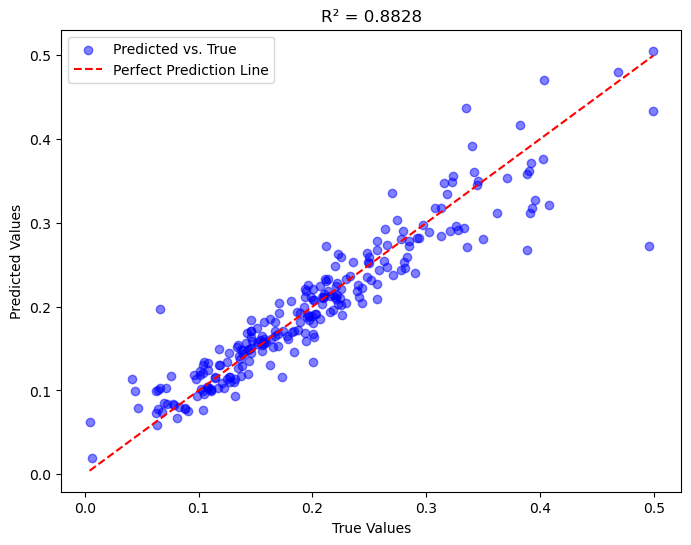

Mean Squared Error: 0.0010300687050396138
Max Error: 0.22356727569386547
Feature Importances: MSSubClass, 5.255028812396978e-05
Feature Importances: MSZoning, 0.004659835591243747
Feature Importances: LotFrontage, 0.005497415793746761
Feature Importances: LotArea, 0.01584031108697379
Feature Importances: Alley, 0.00019172923998841629
Feature Importances: LotShape, 0.000607701480238923
Feature Importances: LandContour, 0.000298325478275639
Feature Importances: LotConfig, 0.00036151218573663796
Feature Importances: LandSlope, 0.0008908355352586863
Feature Importances: Neighborhood, 0.006300582676015228
Feature Importances: Condition1, 0.0005715906235697078
Feature Importances: BldgType, 3.134894312562864e-05
Feature Importances: HouseStyle, 0.00172907865808609
Feature Importances: OverallQual, 0.4867489204304848
Feature Importances: OverallCond, 0.007528260221312245
Feature Importances: RoofStyle, 0.0005334447635031549
Feature Importances: Exterior1st, 0.0018147714219711227
Feature Impor

In [ ]:
#new imports 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, max_error, roc_curve, auc
print(train_data["SalePrice"].isna().sum())
#CREATE the model 
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=.2, random_state=38)

gbrModel = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.1, max_depth=4, random_state=42)
print("a")
#test_X = test_X.drop(columns="Id", axis = 1, inplace=True)
# Train the model on the training data
gbrModel.fit(train_X, train_y)

print("done fitting gbr")
#test_X = test_X.drop(columns="Id", axis = 1, inplace=True)
# Make predictions on the test data
y_pred = gbrModel.predict(test_X)

r2 = gbrModel.score(test_X, test_y)
print(r2)

plt.figure(figsize=(8, 6))
plt.scatter(test_y, y_pred, color='blue', alpha=0.5, label='Predicted vs. True')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'R² = {r2:.4f}')
plt.legend()
plt.show()


# Evaluate the model's performance using Mean Squared Error (MSE)
mse = mean_squared_error(test_y, y_pred)
print(f"Mean Squared Error: {mse}")

maxerror = max_error(test_y, y_pred)
print(f"Max Error: {maxerror}")
#The max_error function computes the maximum residual error, a metric that captures the worst case error between 
#the predicted value and the true value.


#-----------------------------------
feature_names = train_X.columns
to_Drop = []
#Print the feature importances (in case of multivariate data)
for i, feature_name in enumerate(feature_names):
    print(f"Feature Importances: {feature_name}, {gbrModel.feature_importances_[i]}")
    if gbrModel.feature_importances_[i] == 0:
        to_Drop.append(feature_name)
print(to_Drop)

Our second model is the XGBRegressor

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       ...
       'OpenPorchSF400_450', 'OpenPorchSF450_500', 'OpenPorchSF500_547',
       'GarageArea0_200', 'GarageArea200_400', 'GarageArea400_600',
       'GarageArea600_800', 'GarageArea800_1000', 'GarageArea1000_1200',
       'GarageArea1200_1418'],
      dtype='object', length=143)
Mean Squared Error (MSE): 0.0012
R-squared: 0.8664


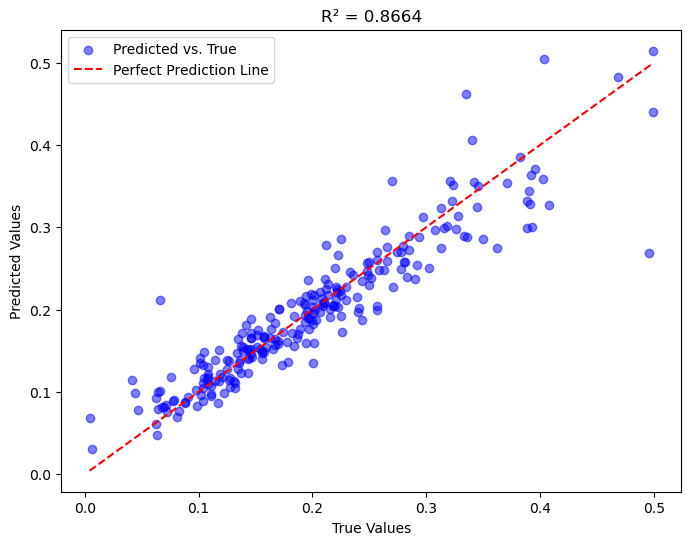

In [197]:
!pip install xgboost
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

print(train_X.columns)

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=.2, random_state=38)

XGBmodel = XGBRegressor(objective='reg:squarederror', eta = 0.1, random_state=42)



#scale data
scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.transform(test_X)


# 5. Make predictions on the test data
XGBmodel.fit(train_X, train_y)
y_pred = XGBmodel.predict(test_X)


# 6. Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(test_y, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# 7. Optionally, you can also calculate R-squared (R²) to evaluate the model fit
r2 = XGBmodel.score(test_X, test_y)
print(f"R-squared: {r2:.4f}")

# Step 6: Plot true values vs. predicted values (for R² visualization)
plt.figure(figsize=(8, 6))
plt.scatter(test_y, y_pred, color='blue', alpha=0.5, label='Predicted vs. True')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'R² = {r2:.4f}')
plt.legend()
plt.show()

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       ...
       'OpenPorchSF400_450', 'OpenPorchSF450_500', 'OpenPorchSF500_547',
       'GarageArea0_200', 'GarageArea200_400', 'GarageArea400_600',
       'GarageArea600_800', 'GarageArea800_1000', 'GarageArea1000_1200',
       'GarageArea1200_1418'],
      dtype='object', length=143)


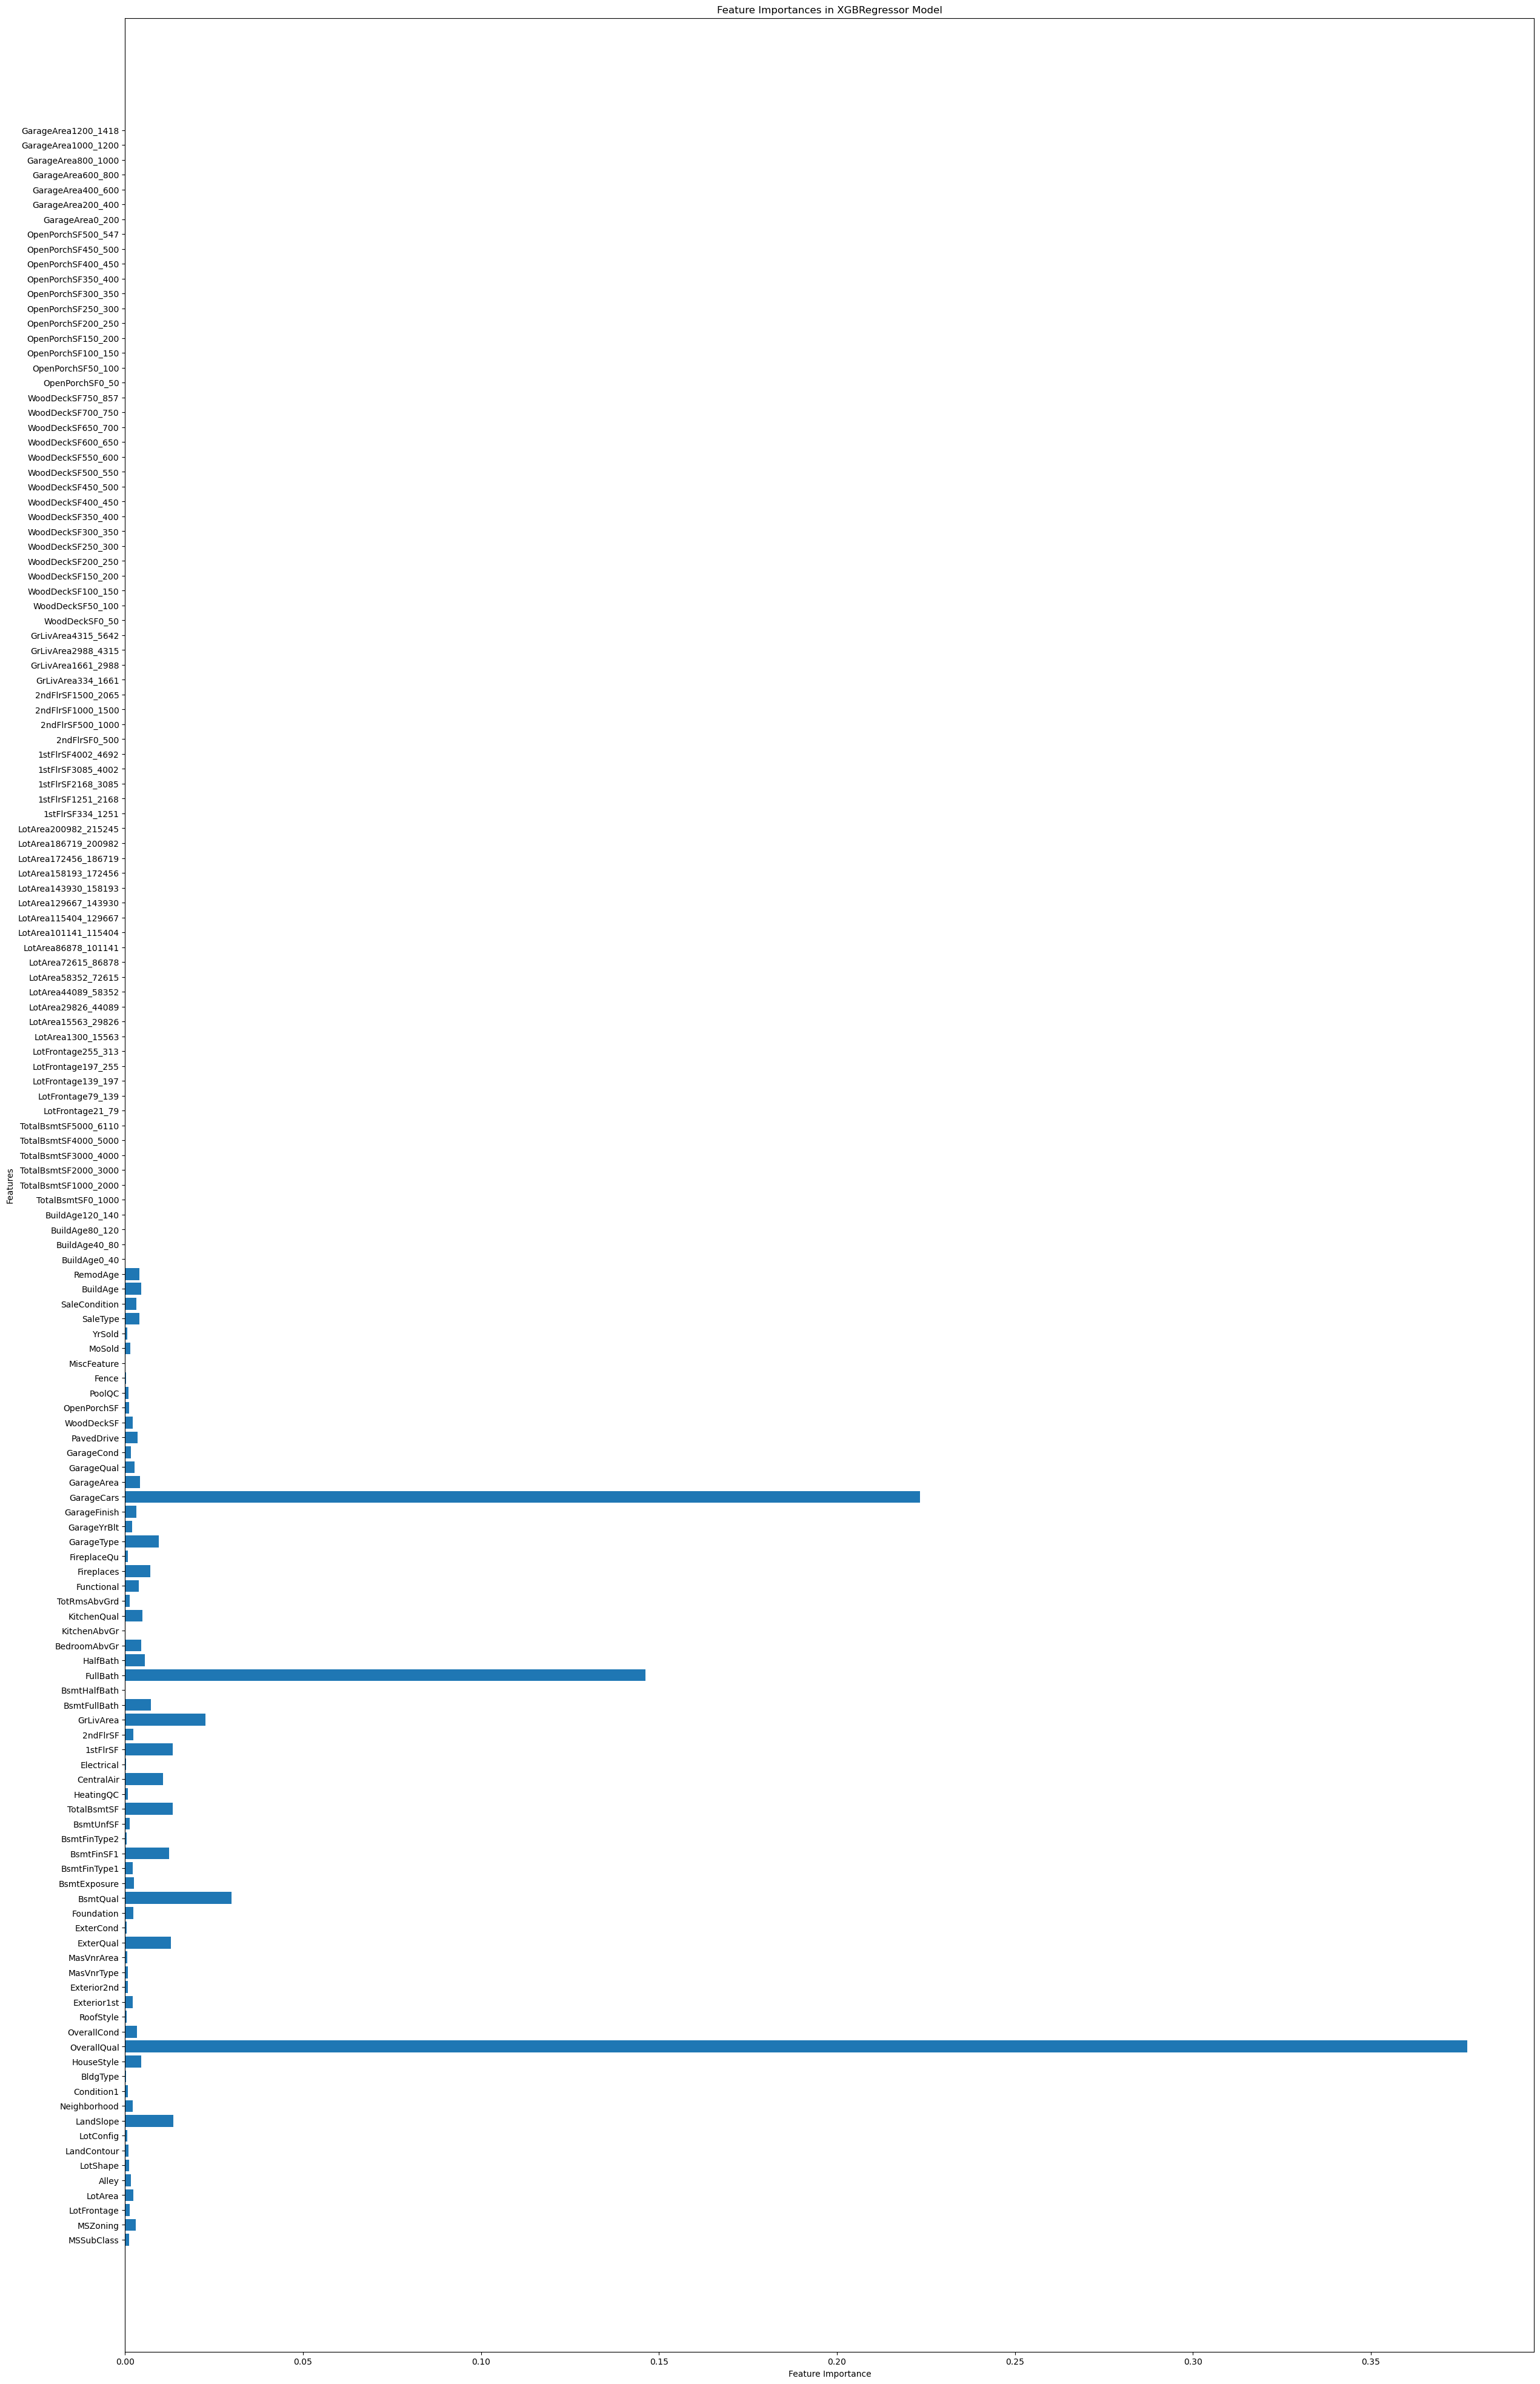

<Figure size 3000x10000 with 0 Axes>

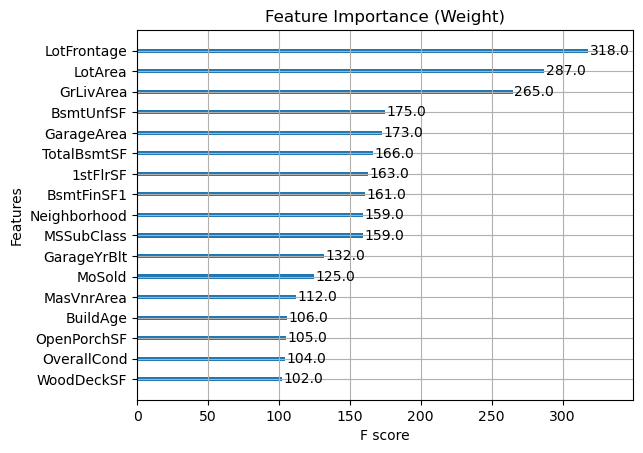

<Figure size 3000x10000 with 0 Axes>

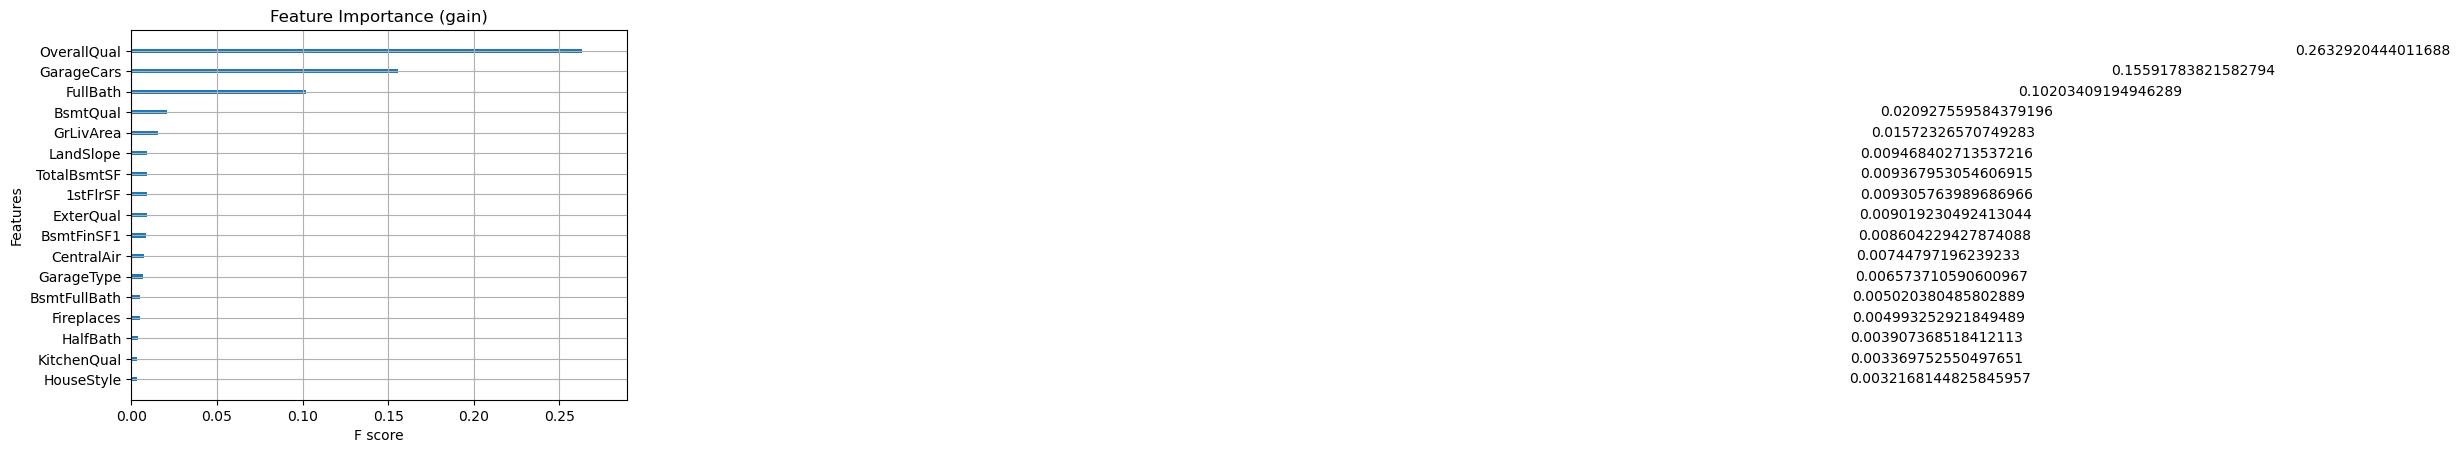

<Figure size 3000x10000 with 0 Axes>

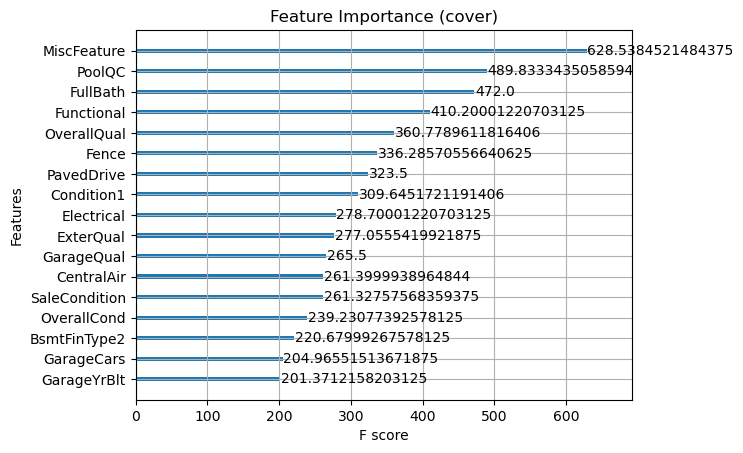

MSSubClass  importance (weight): 0.0011325045
MSZoning  importance (weight): 0.0029641504
LotFrontage  importance (weight): 0.0013611149
LotArea  importance (weight): 0.00225674
Alley  importance (weight): 0.0016505889
LotShape  importance (weight): 0.0011073168
LandContour  importance (weight): 0.00096694945
LotConfig  importance (weight): 0.00060854224
LandSlope  importance (weight): 0.013558707
Neighborhood  importance (weight): 0.0021903552
Condition1  importance (weight): 0.00076224055
BldgType  importance (weight): 0.0002094016
HouseStyle  importance (weight): 0.004606463
OverallQual  importance (weight): 0.37703297
OverallCond  importance (weight): 0.0032981911
RoofStyle  importance (weight): 0.0005104467
Exterior1st  importance (weight): 0.002182207
Exterior2nd  importance (weight): 0.000864963
MasVnrType  importance (weight): 0.0007628661
MasVnrArea  importance (weight): 0.00068966585
ExterQual  importance (weight): 0.012915495
ExterCond  importance (weight): 0.00043573187
Fou

In [199]:
feature_names = test_X.columns

# 8. Plot feature importances

# Get raw feature importances
raw_importances = XGBmodel.feature_importances_

print(train_X.columns)


# Normalize the importances (divide by the sum of all importances)
normalized_importances = raw_importances / raw_importances.sum()

plt.figure(figsize=(30, 50))
plt.barh(range(len(normalized_importances)), normalized_importances)
plt.yticks(range(len(normalized_importances)), train_X.columns)  # Set y-ticks to feature names
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances in XGBRegressor Model")
plt.show()
#This importance is based on the total amount of information each feature contributed to the model’s performance. 
#Specifically, it is calculated as the sum of the improvement brought by each feature to the splits in all trees.



#Plot feature importance using plot_importance, which is normalized data 
plt.figure(figsize=(30, 100))
plot_importance(XGBmodel, importance_type='weight', max_num_features=17, title="Feature Importance (Weight)")
plt.show()


#Plot feature importance using plot_importance, which is normalized data (GAIN)
plt.figure(figsize=(30, 100))
plot_importance(XGBmodel, importance_type='gain', max_num_features=17, title="Feature Importance (gain)")
plt.show()

#Plot feature importance using plot_importance, which is normalized data (GAIN)
plt.figure(figsize=(30, 100))
plot_importance(XGBmodel, importance_type='cover', max_num_features=17, title="Feature Importance (cover)")
plt.show()

#Extract the feature importances manually (for further analysis)
importances = XGBmodel.feature_importances_
count2 = 0
for features in feature_names:
    print(features, " importance (weight):", importances[count2])
    count2 += 1

Mean Squared Error (MSE): 0.0012
R-squared: 0.8664


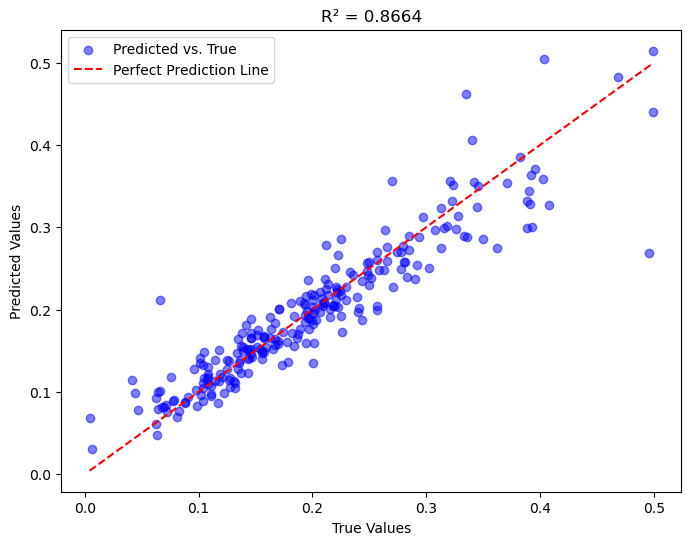

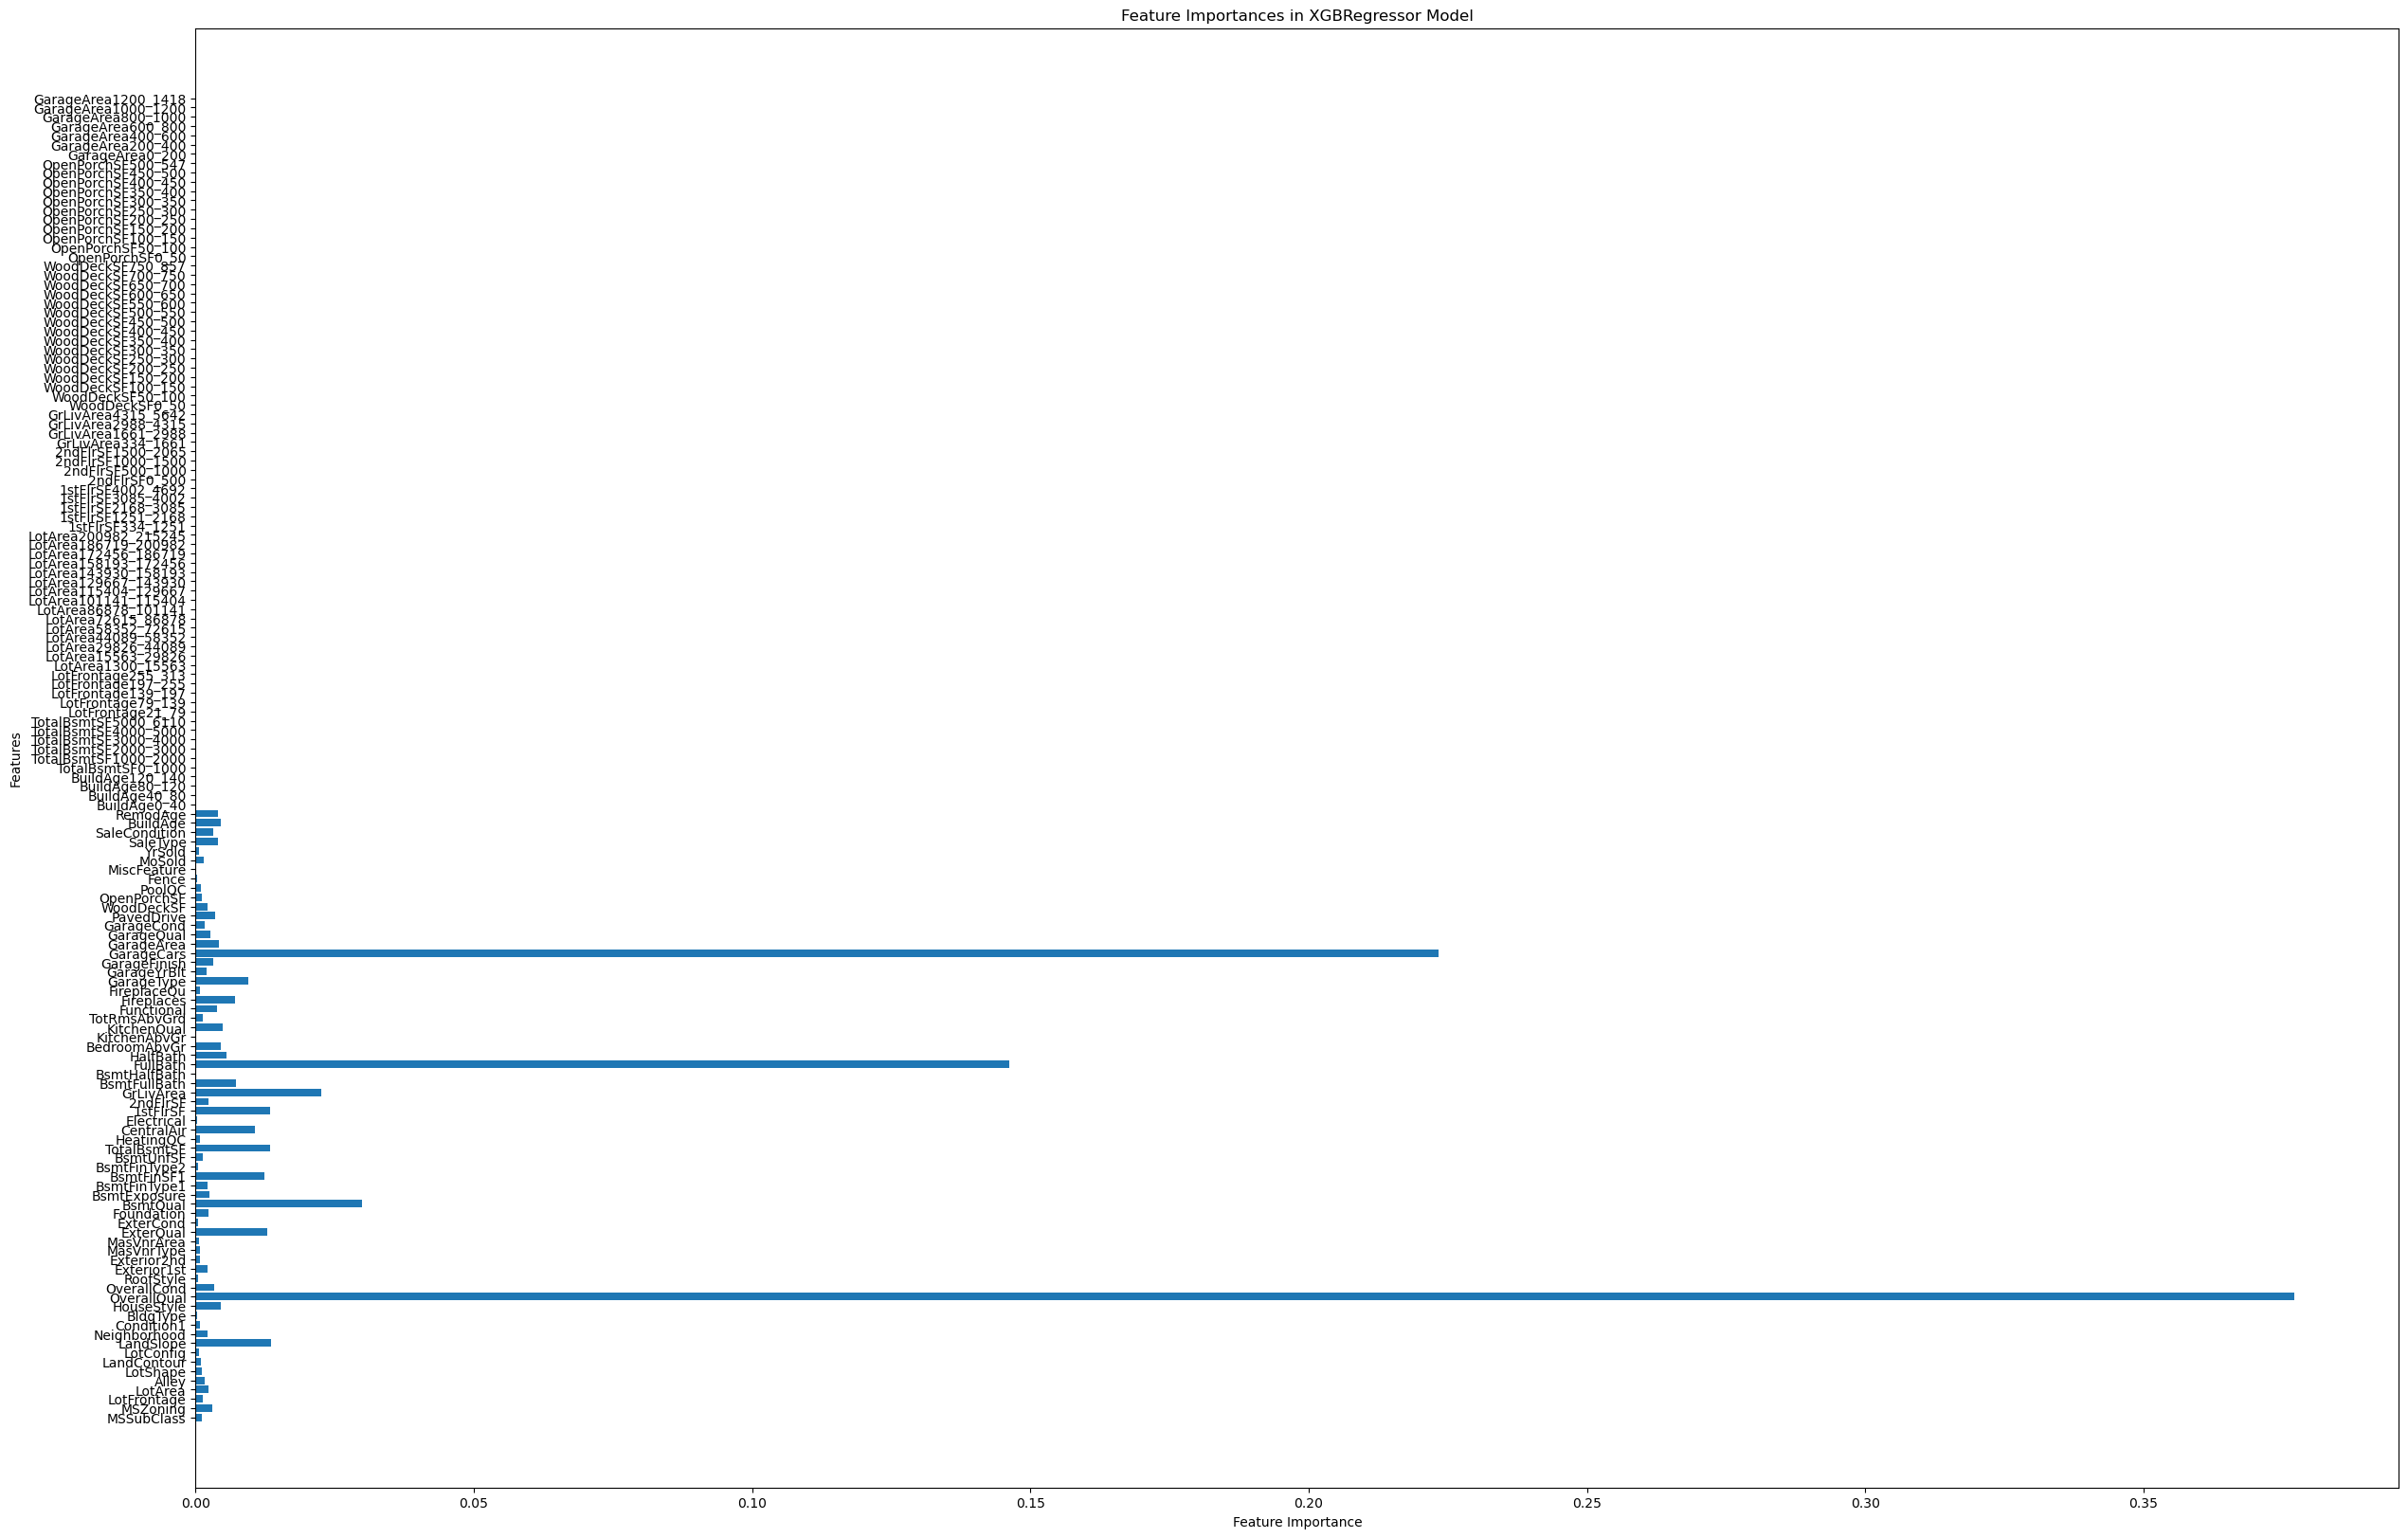

<Figure size 3000x10000 with 0 Axes>

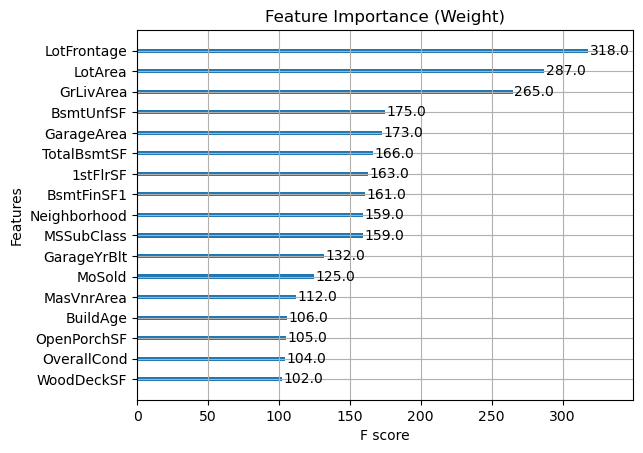

<Figure size 3000x10000 with 0 Axes>

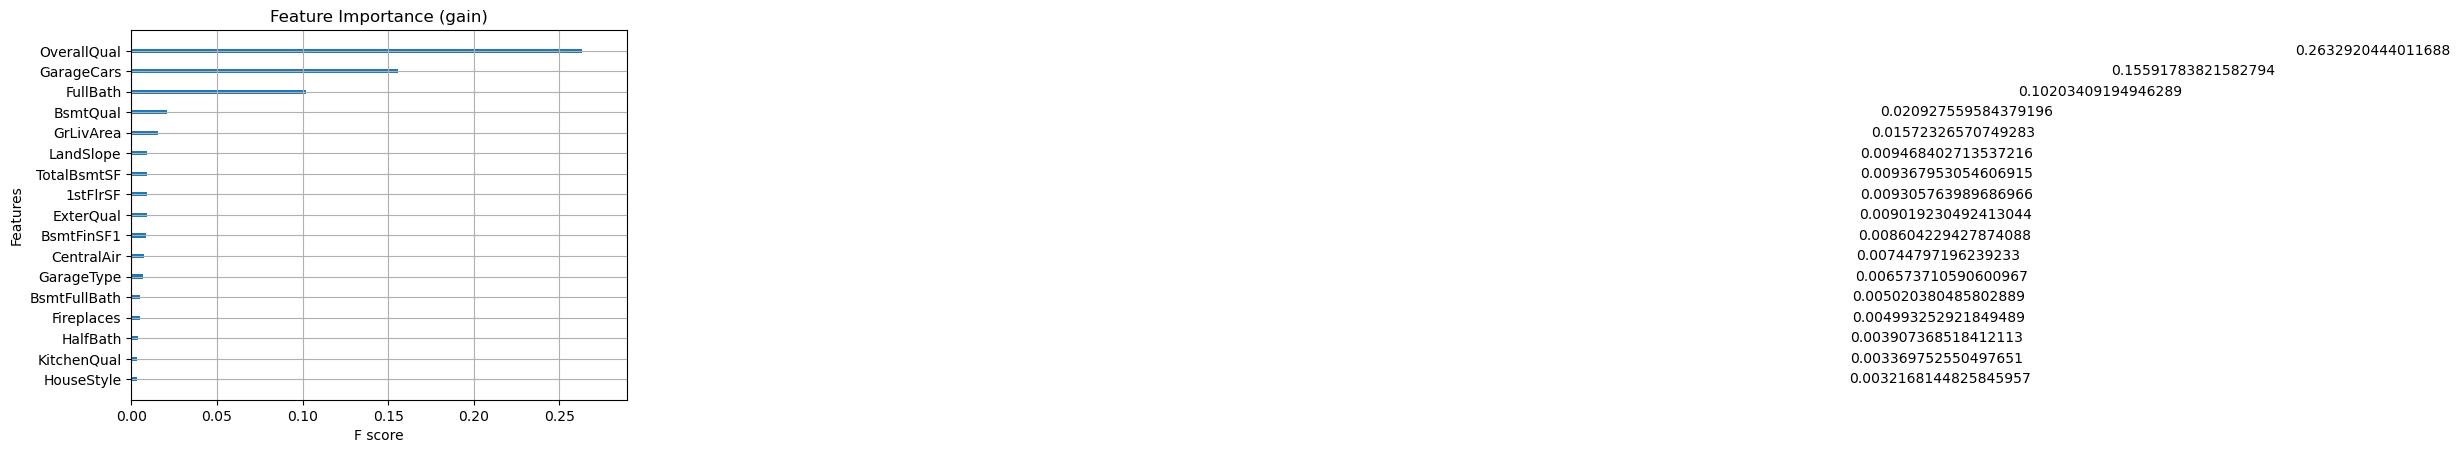

<Figure size 3000x10000 with 0 Axes>

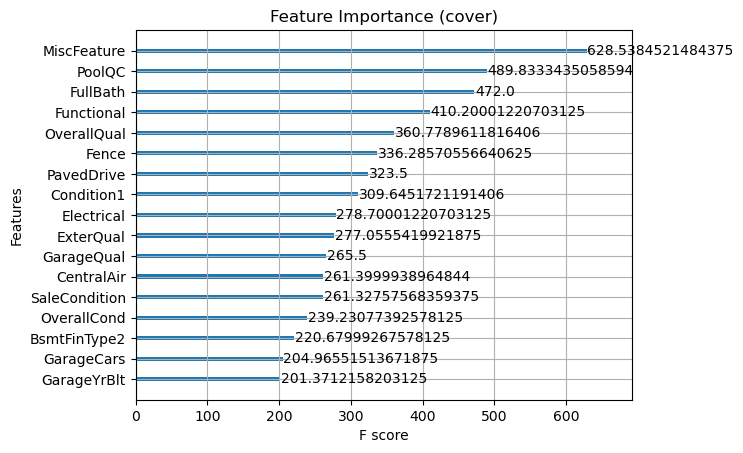

BsmtHalfBath  importance (weight): 0.0
KitchenAbvGr  importance (weight): 0.0
BuildAge0_40  importance (weight): 0.0
BuildAge40_80  importance (weight): 0.0
BuildAge80_120  importance (weight): 0.0
BuildAge120_140  importance (weight): 0.0
TotalBsmtSF0_1000  importance (weight): 0.0
TotalBsmtSF1000_2000  importance (weight): 0.0
TotalBsmtSF2000_3000  importance (weight): 0.0
TotalBsmtSF3000_4000  importance (weight): 0.0
TotalBsmtSF4000_5000  importance (weight): 0.0
TotalBsmtSF5000_6110  importance (weight): 0.0
LotFrontage21_79  importance (weight): 0.0
LotFrontage79_139  importance (weight): 0.0
LotFrontage139_197  importance (weight): 0.0
LotFrontage197_255  importance (weight): 0.0
LotFrontage255_313  importance (weight): 0.0
LotArea1300_15563  importance (weight): 0.0
LotArea15563_29826  importance (weight): 0.0
LotArea29826_44089  importance (weight): 0.0
LotArea44089_58352  importance (weight): 0.0
LotArea58352_72615  importance (weight): 0.0
LotArea72615_86878  importance (wei

In [201]:
!pip install xgboost
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#train_data.drop(['LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscFeature', 'MiscVal', 'YearBuilt1872_1908', 'YearBuilt1988_2010', 'TotalBsmtSF0_1000', 'TotalBsmtSF2000_3000', 'TotalBsmtSF3000_4000', 'TotalBsmtSF4000_5000', 'TotalBsmtSF5000_6110', 'LotFrontage21_79', 'LotFrontage79_139', 'LotFrontage139_197', 'LotFrontage197_255', 'LotFrontage255_313', 'LotArea1300_15563', 'LotArea15563_29826', 'LotArea44089_58352', 'LotArea58352_72615', 'LotArea72615_86878', 'LotArea86878_101141', 'LotArea101141_115404', 'LotArea115404_129667', 'LotArea129667_143930', 'LotArea143930_158193', 'LotArea158193_172456', 'LotArea172456_186719', 'LotArea186719_200982', 'LotArea200982_215245', '1stFlrSF334_1251', '1stFlrSF2168_3085', '1stFlrSF3085_4002', '1stFlrSF4002_4692', '2ndFlrSF0_500', '2ndFlrSF1500_2065', 'GrLivArea334_1661', 'GrLivArea1661_2988', 'GrLivArea2988_4315', 'GrLivArea4315_5642', 'WoodDeckSF0_50', 'WoodDeckSF300_350', 'WoodDeckSF400_450', 'WoodDeckSF450_500', 'WoodDeckSF500_550', 'WoodDeckSF550_600', 'WoodDeckSF600_650', 'WoodDeckSF650_700', 'WoodDeckSF700_750', 'WoodDeckSF750_857', 'OpenPorchSF0_50', 'OpenPorchSF150_200', 'OpenPorchSF250_300', 'OpenPorchSF300_350', 'OpenPorchSF350_400', 'OpenPorchSF400_450', 'OpenPorchSF450_500', 'OpenPorchSF500_547', 'GarageArea0_200', 'GarageArea200_400', 'GarageArea1000_1200', 'GarageArea1200_1418'], axis=1)
#test_data.drop(['LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscFeature', 'MiscVal', 'YearBuilt1872_1908', 'YearBuilt1988_2010', 'TotalBsmtSF0_1000', 'TotalBsmtSF2000_3000', 'TotalBsmtSF3000_4000', 'TotalBsmtSF4000_5000', 'TotalBsmtSF5000_6110', 'LotFrontage21_79', 'LotFrontage79_139', 'LotFrontage139_197', 'LotFrontage197_255', 'LotFrontage255_313', 'LotArea1300_15563', 'LotArea15563_29826', 'LotArea44089_58352', 'LotArea58352_72615', 'LotArea72615_86878', 'LotArea86878_101141', 'LotArea101141_115404', 'LotArea115404_129667', 'LotArea129667_143930', 'LotArea143930_158193', 'LotArea158193_172456', 'LotArea172456_186719', 'LotArea186719_200982', 'LotArea200982_215245', '1stFlrSF334_1251', '1stFlrSF2168_3085', '1stFlrSF3085_4002', '1stFlrSF4002_4692', '2ndFlrSF0_500', '2ndFlrSF1500_2065', 'GrLivArea334_1661', 'GrLivArea1661_2988', 'GrLivArea2988_4315', 'GrLivArea4315_5642', 'WoodDeckSF0_50', 'WoodDeckSF300_350', 'WoodDeckSF400_450', 'WoodDeckSF450_500', 'WoodDeckSF500_550', 'WoodDeckSF550_600', 'WoodDeckSF600_650', 'WoodDeckSF650_700', 'WoodDeckSF700_750', 'WoodDeckSF750_857', 'OpenPorchSF0_50', 'OpenPorchSF150_200', 'OpenPorchSF250_300', 'OpenPorchSF300_350', 'OpenPorchSF350_400', 'OpenPorchSF400_450', 'OpenPorchSF450_500', 'OpenPorchSF500_547', 'GarageArea0_200', 'GarageArea200_400', 'GarageArea1000_1200', 'GarageArea1200_1418'], axis=1)

X = train_data[Inputs]
y = train_data[Output].values.ravel()

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=.2, random_state=38)

XGBmodel = XGBRegressor(objective='reg:squarederror', eta = 0.1, random_state=42)


#scale data
scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(train_X)
X_test_scaled = scaler.transform(test_X)


# 5. Make predictions on the test data
XGBmodel.fit(train_X, train_y)
y_pred = XGBmodel.predict(test_X)


# 6. Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(test_y, y_pred)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# 7. Optionally, you can also calculate R-squared (R²) to evaluate the model fit
r2 = XGBmodel.score(test_X, test_y)
print(f"R-squared: {r2:.4f}")

# Step 6: Plot true values vs. predicted values (for R² visualization)
plt.figure(figsize=(8, 6))
plt.scatter(test_y, y_pred, color='blue', alpha=0.5, label='Predicted vs. True')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'R² = {r2:.4f}')
plt.legend()
plt.show()

feature_names = test_X.columns

# 8. Plot feature importances

# Get raw feature importances
raw_importances = XGBmodel.feature_importances_

# Normalize the importances (divide by the sum of all importances)
normalized_importances = raw_importances / raw_importances.sum()

plt.figure(figsize=(30, 20))
plt.barh(range(len(normalized_importances)), normalized_importances)
plt.yticks(range(len(normalized_importances)), train_X.columns)  # Set y-ticks to feature names
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances in XGBRegressor Model")
plt.show()
#This importance is based on the total amount of information each feature contributed to the model’s performance. 
#Specifically, it is calculated as the sum of the improvement brought by each feature to the splits in all trees.



#Plot feature importance using plot_importance, which is normalized data 
plt.figure(figsize=(30, 100))
plot_importance(XGBmodel, importance_type='weight', max_num_features=17, title="Feature Importance (Weight)")
plt.show()


#Plot feature importance using plot_importance, which is normalized data (GAIN)
plt.figure(figsize=(30, 100))
plot_importance(XGBmodel, importance_type='gain', max_num_features=17, title="Feature Importance (gain)")
plt.show()

#Plot feature importance using plot_importance, which is normalized data (GAIN)
plt.figure(figsize=(30, 100))
plot_importance(XGBmodel, importance_type='cover', max_num_features=17, title="Feature Importance (cover)")
plt.show()

#Extract the feature importances manually (for further analysis)
importances = XGBmodel.feature_importances_
toRemove = []
for i, features in enumerate(feature_names):
    if importances[i] == 0:
        print(features, " importance (weight):", importances[i])
        toRemove.append(features)

print(toRemove)


Feature Distribution (Per feature), Heatmap of feature v feature correlation, and Feature importance graph using built-in feature importance function


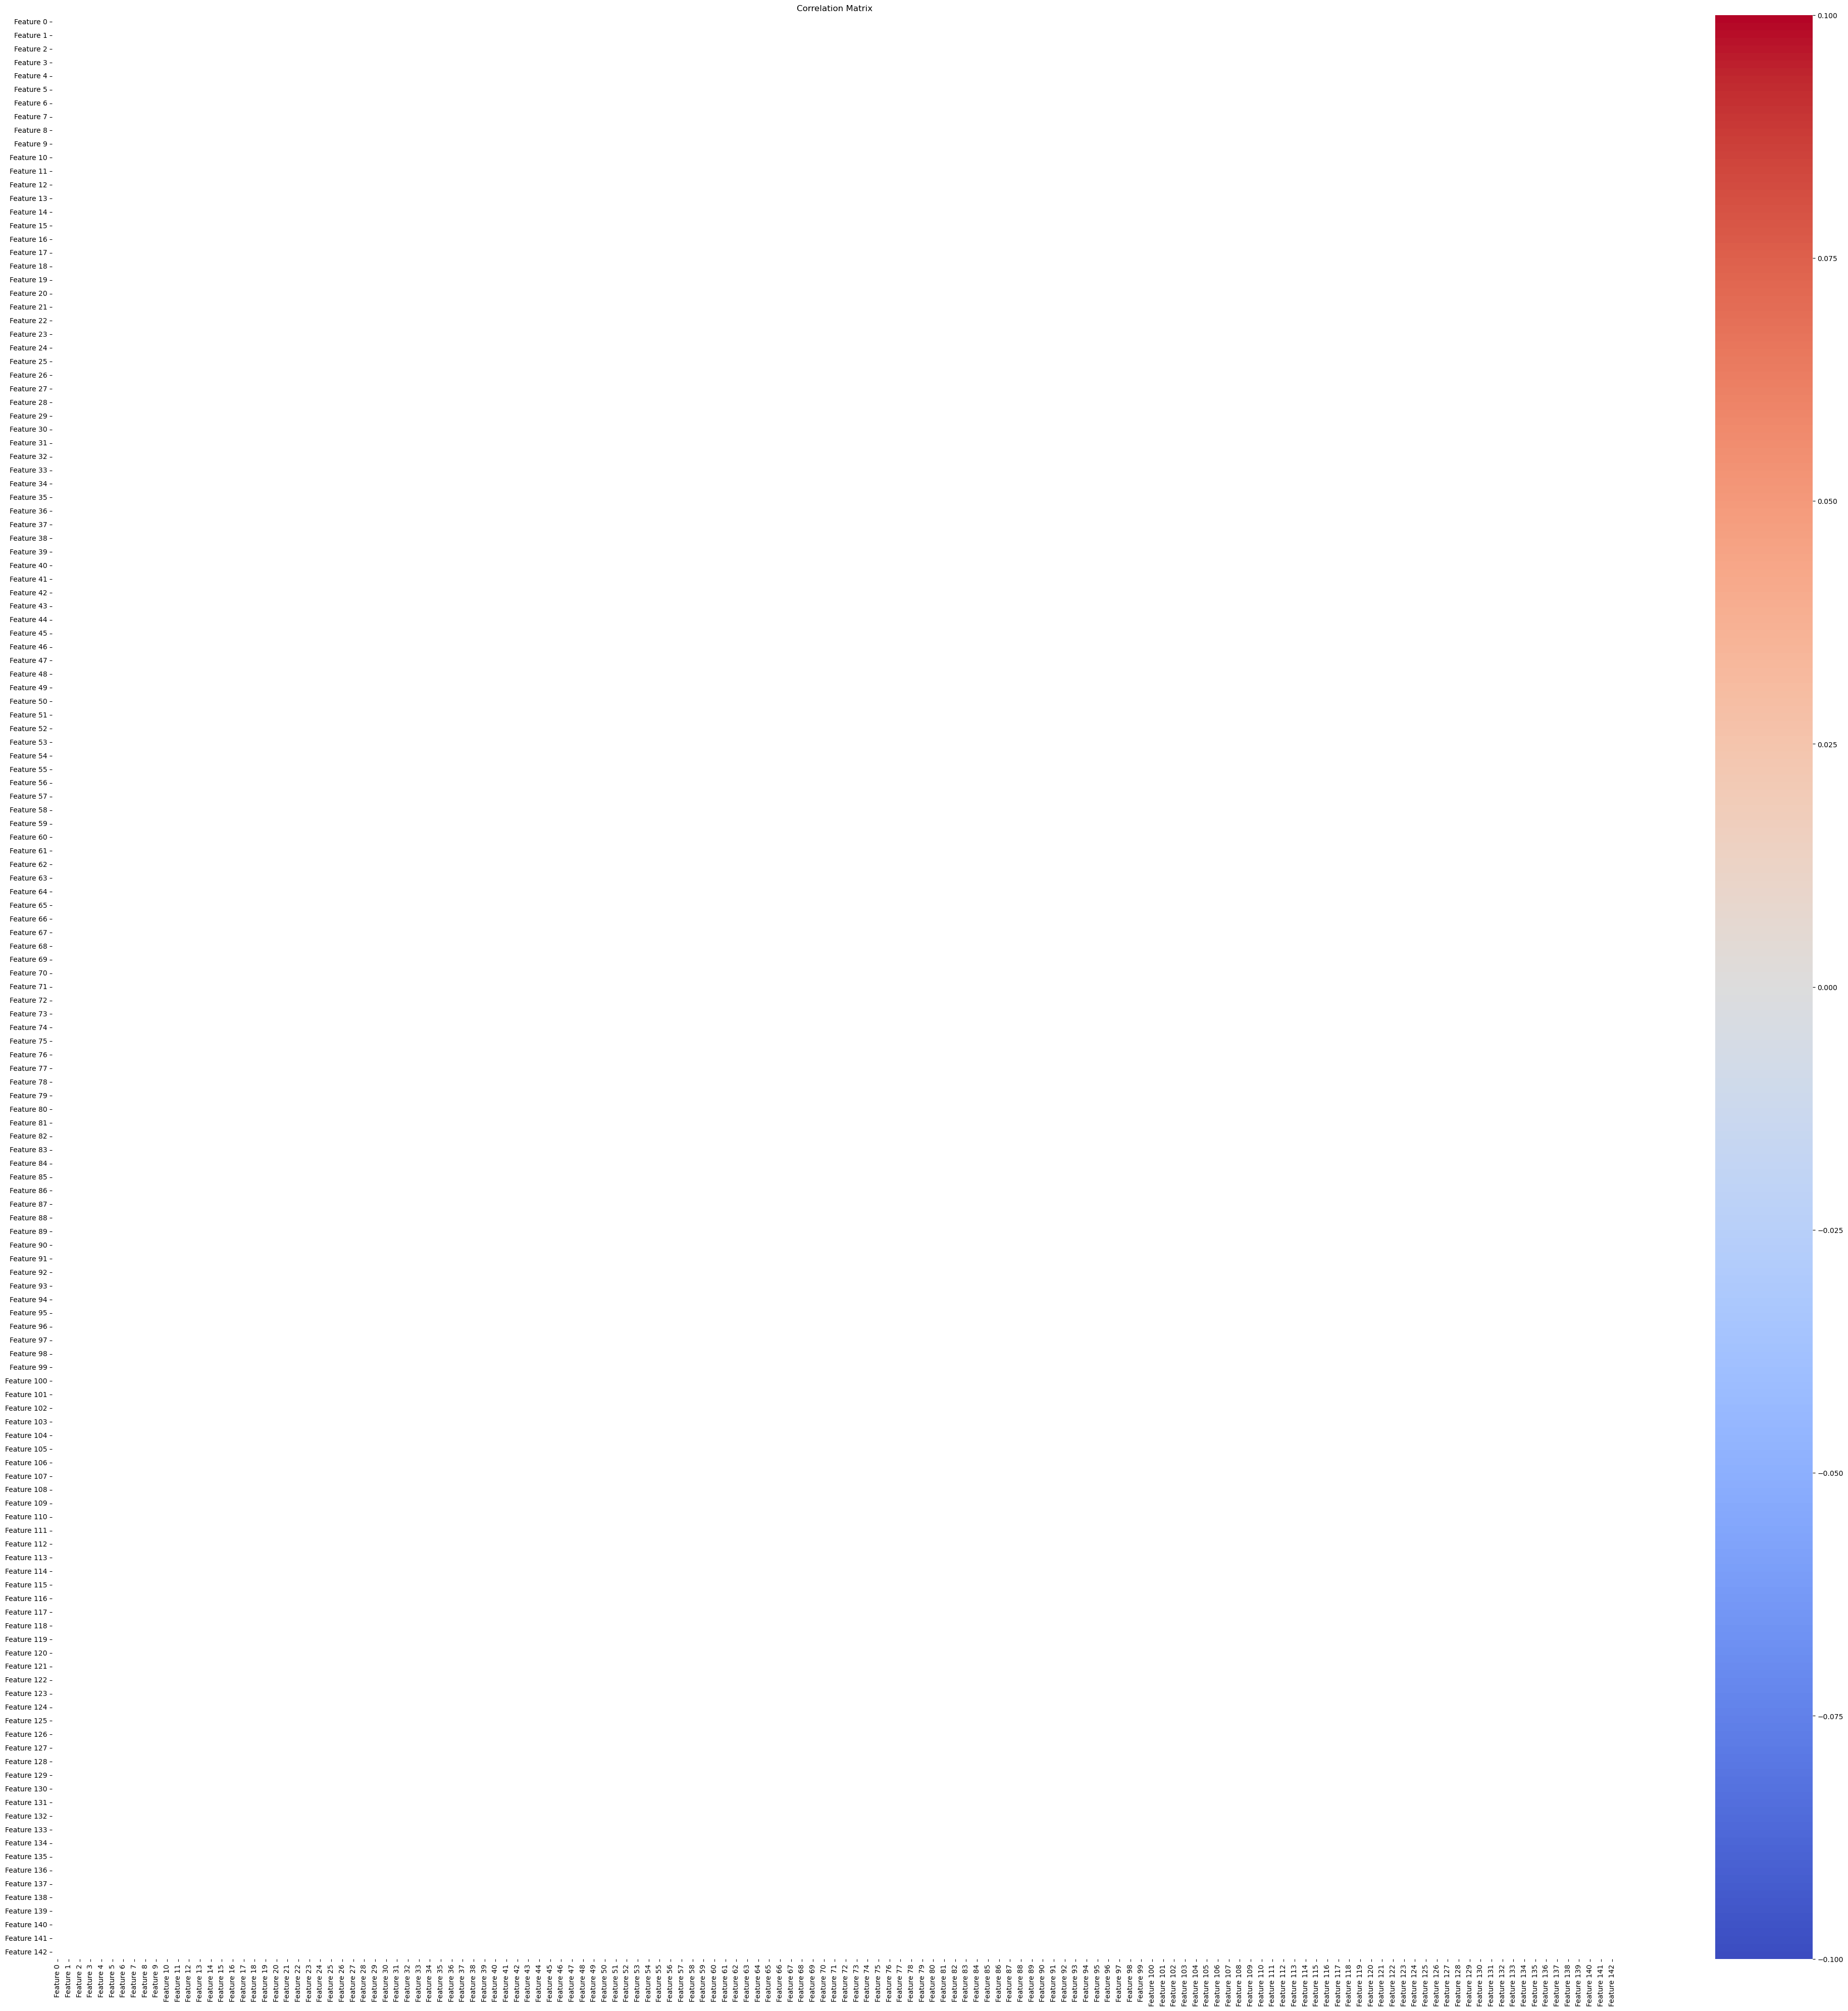

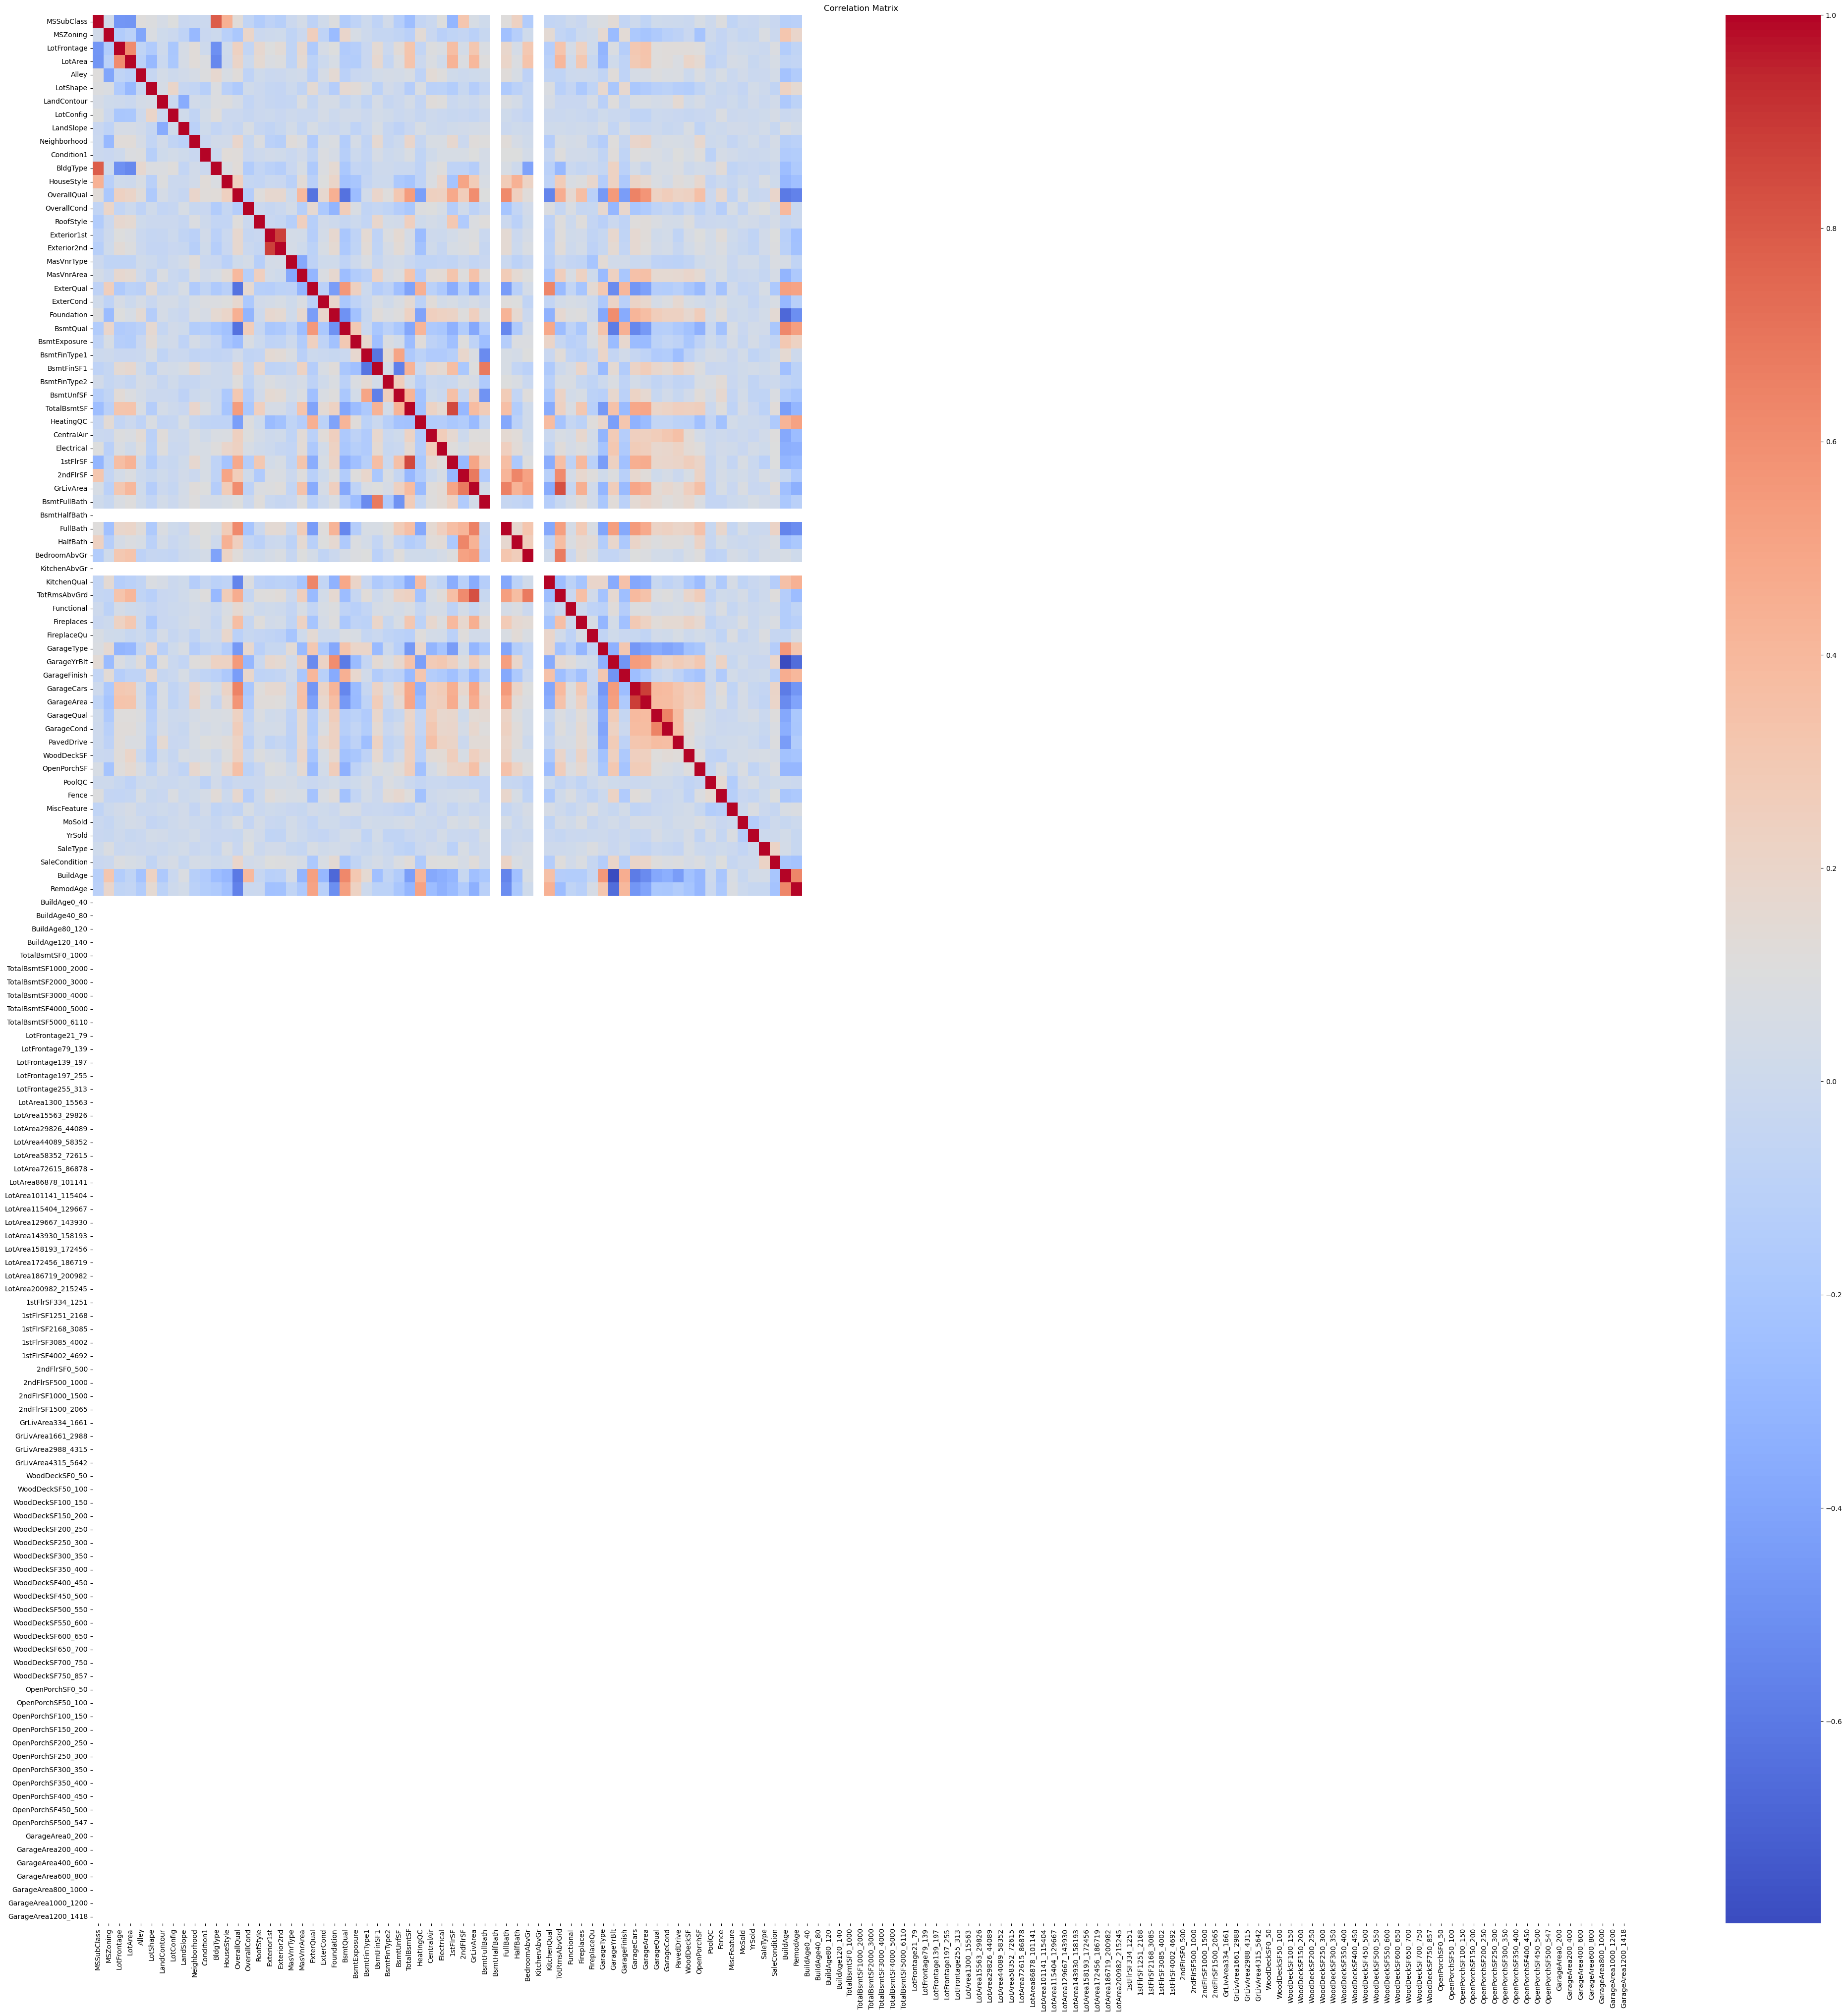

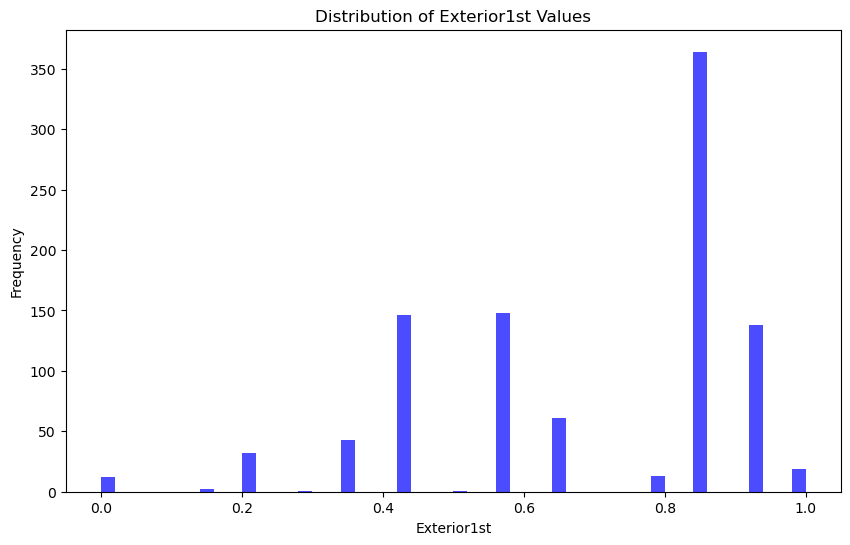

done


In [203]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Plot the correlation matrix
# Create a DataFrame with your features
df = pd.DataFrame(train_X, columns=[f"Feature {i}" for i in range(train_X.shape[1])])
corr_matrix = df.corr()
plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
#-----------------------------------------------------------------
#Better heatmap
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)

# Convert train_X_scaled (numpy array) into a DataFrame with proper column names
df = pd.DataFrame(train_X_scaled, columns=train_X.columns)

# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(50, 50))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
#-------------------------------------------------------------------
#feature distribution
feature_index = 16
feature_name = train_X.columns[feature_index]  # Get the column name

#feature_index = 16 is Overall Quality feature

# Plot the distribution of the feature

plt.figure(figsize=(10, 6))
plt.hist(train_X[feature_name], bins=50, color='blue', alpha=0.7)
plt.title(f"Distribution of {feature_name} Values")
plt.xlabel(f"{feature_name}")
plt.ylabel("Frequency")
plt.show()
print("done")

In [ ]:
"""
Things to do:
K-fold
scaling
Normalizing
"""